In [1]:
import numpy as np
import timeit
import viscid
import os
from scipy.special import iv

argsdict=viscid.argsdict
import importlib as imp
from scipy.linalg import eig
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import json
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

argsdict['dim']=2
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['k1x']=np.pi*0.1
argsdict['k1y']=0
argsdict['k2x']=-np.pi*0.05
argsdict['k2y']=3**0.5*0.05*np.pi
argsdict['h0']=1.0
argsdict['As']=0.8
num=50

kxs1=np.arange(1,num+1)/num*argsdict['k1x']/2
kys1=np.arange(1,num+1)/num*0
kxs2=argsdict['k1x']/2+np.arange(1,num+1)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3 - argsdict['k1x']/2)
kys2=argsdict['k1y']/2+np.arange(1,num+1)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3 - argsdict['k1y']/2)
kxs3=np.arange(1,num)/num*((2*argsdict['k1x'] + argsdict['k2x'])/3)
kys3=np.arange(1,num)/num*((2*argsdict['k1y'] + argsdict['k2y'])/3)
ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])


### Dispersion relations and band gap for the inviscid problem

In [2]:
argsdict['rho']=1.0
argsdict['sigma']=72

imp.reload(viscid)
start=timeit.default_timer()

argsdict['As']=0.0
evalssweep1=[]
revecssweep1=[]
levecssweep1=[]
for i in range(num):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep1=evalssweep1+[evals]
    revecssweep1=revecssweep1+[revecs]
    levecssweep1=levecssweep1+[levecs]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep2=[]
revecssweep2=[]
levecssweep2=[]
for i in range(num-1):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep2=evalssweep2+[evals]
    revecssweep2=revecssweep2+[revecs]
    levecssweep2=levecssweep2+[levecs]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep3=[]
revecssweep3=[]
levecssweep3=[]
for i in range(num-1):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep3=evalssweep3+[evals]
    revecssweep3=revecssweep3+[revecs]
    levecssweep3=levecssweep3+[levecs]

stop=timeit.default_timer()
print(stop-start)

vals1=np.sort(np.real((np.array(evalssweep1))**0.5/(2*np.pi)),axis=1)
vals2=np.sort(np.real((np.array(evalssweep2))**0.5/(2*np.pi)),axis=1)
vals3=np.flip(np.sort(np.real((np.array(evalssweep3))**0.5/(2*np.pi)),axis=1),axis=0)

argsdict['As']=0.8
evalssweep12=[]
revecssweep12=[]
levecssweep12=[]
for i in range(len(kxs1)):
    argsdict['kx']=kxs1[i]
    argsdict['ky']=kys1[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep12=evalssweep12+[evals]
    revecssweep12=revecssweep12+[revecs]
    levecssweep12=levecssweep12+[np.conjugate(levecs)]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep22=[]
revecssweep22=[]
levecssweep22=[]
for i in range(len(kxs2)):
    argsdict['kx']=kxs2[i]
    argsdict['ky']=kys2[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)    
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep22=evalssweep22+[evals]
    revecssweep22=revecssweep22+[revecs]
    levecssweep22=levecssweep22+[np.conjugate(levecs)]
    
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
evalssweep32=[]
revecssweep32=[]
levecssweep32=[]
for i in range(len(kxs3)):
    argsdict['kx']=kxs3[i]
    argsdict['ky']=kys3[i]
    F,G=viscid.inviscid_mat_undriven(argsdict)    
    evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
    evalssweep32=evalssweep32+[evals]
    revecssweep32=revecssweep32+[revecs]
    levecssweep32=levecssweep32+[np.conjugate(levecs)]

stop=timeit.default_timer()
print(stop-start)

vals12=np.sort(np.real((np.array(evalssweep12))**0.5/(2*np.pi)),axis=1)
vals22=np.sort(np.real((np.array(evalssweep22))**0.5/(2*np.pi)),axis=1)
vals32=np.flip(np.sort(np.real((np.array(evalssweep32))**0.5/(2*np.pi)),axis=1),axis=0)


0.09366675099590793
0.0906394190096762
0.08603563701035455
0.4533168899943121
0.354637435026234
0.3476943970017601


1.790898713446387 1.5602729307919136
[1.56027293 1.56027293]
1.582091321209743 1.6372261930927898
[1.32169416 1.63722619]


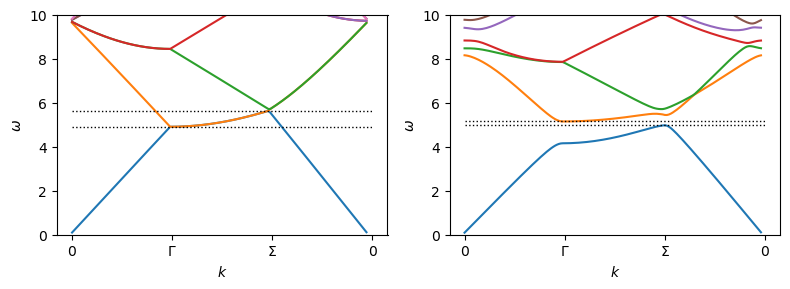

In [3]:
plt.subplots(1,2,figsize=(8,3))

plt.subplot(1,2,1)

plt.ylim(0,10)
plt.plot(np.concatenate([vals1,vals2,vals3])*2*np.pi)
plt.plot([0,150],[np.max(np.concatenate([vals1,vals2,vals3])[:,0]*2*np.pi),np.max(np.concatenate([vals1,vals2,vals3])[:,0]*2*np.pi)],ls=':',lw=1,c='black')
plt.plot([0,150],[np.min(np.concatenate([vals1,vals2,vals3])[:,1]*2*np.pi),np.min(np.concatenate([vals1,vals2,vals3])[:,1]*2*np.pi)],ls=':',lw=1,c='black')

print(2*np.max(np.concatenate([vals1,vals2,vals3])[:,0]),2*np.min(np.concatenate([vals1,vals2,vals3])[:,1]))
print(vals1[-1][:2]*2)
plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel('$\omega$')
# plt.title('$a_s/h_0=0$')

plt.subplot(1,2,2)
plt.ylim(0,10)
plt.plot(np.concatenate([vals12,vals22,vals32])*2*np.pi)
plt.plot([0,150],[np.max(np.concatenate([vals12,vals22,vals32])[:,0]*2*np.pi),np.max(np.concatenate([vals12,vals22,vals32])[:,0]*2*np.pi)],ls=':',lw=1,c='black')
plt.plot([0,150],[np.min(np.concatenate([vals12,vals22,vals32])[:,1]*2*np.pi),np.min(np.concatenate([vals12,vals22,vals32])[:,1]*2*np.pi)],ls=':',lw=1,c='black')

print(2*np.max(np.concatenate([vals12,vals22,vals32])[:,0]),2*np.min(np.concatenate([vals12,vals22,vals32])[:,1]))
print(vals12[-1][:2]*2)
plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel('$\omega$')
# plt.title('$a_s/h_0=0.8$')


plt.tight_layout()
plt.savefig('dispersion.pdf')
plt.show()

### Pseudoarclength continuation shows inviscid subharmonic wave mixing and resonance

In [4]:
imp.reload(viscid)
def mat(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+argsdict['ad']*D.reshape(shape)).reshape((n_flat,n_flat))
def mat2(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (-2*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat))
def mat3(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    return D

evalssweeps=[evalssweep12,evalssweep22,np.flip(evalssweep32,axis=0)]
revecssweeps=[revecssweep12,revecssweep22,np.flip(revecssweep32,axis=0)]
levecssweeps=[levecssweep12,levecssweep22,np.flip(levecssweep32,axis=0)]
kxss=[kxs1,kxs2,np.flip(kxs3)]
kyss=[kys1,kys2,np.flip(kys3)]


imp.reload(viscid)
kind=48
argsdict['kx']=np.concatenate(kxss)[kind]
argsdict['ky']=np.concatenate(kyss)[kind]
argsdict['ad']=0
argsdict['freq']=1.3
argsdict['verbose']=1
argsdict['epss']=0
argsdict['dsmin']=1E-12

order=np.argsort(np.concatenate(evalssweeps)[kind])

omega1=np.concatenate(evalssweeps)[kind][order[0]]**0.5+1j*1E-8
v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
v1[argsdict['Nt']]=np.concatenate(revecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
v1=v1.ravel()
w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
w1[argsdict['Nt']]=np.concatenate(levecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
w1=w1.ravel()

omegans1,vns1,wns1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict)
argsdict['par']='ad'
argsdict['pari']=0
argsdict['parf']=0.05
argsdict['dsmax']=1E-3
argsdict['ds']=1E-3
somegas,svs,sws,spars,sdirs,sdss=viscid.pseudocont(omegans1[-1],vns1[-1],wns1[-1],mat,argsdict,mat2=mat2,mat3=mat3)

n=0 dv=2.645019e-03 dw=2.646323e-03 dl=2.087494e-04
n=1 dv=6.295109e-17 dw=1.259643e-16 dl=2.087328e-04
n=2 dv=1.259022e-16 dw=1.180915e-16 dl=2.704177e-08
newdir=(0.000,-0.000,0.875)
step=0 ds=1.000000e-03 ad=0.000000 lambda=4.143888+i-0.000000 dir=(0.000, -0.000, 0.875)
pre dv=6.641e-03 dlambda=0.000e+00 dmu=8.737e-04 ad=0.000875 lr=4.143888 li=-0.000000 mstp=0.000e+00
n=0 dv=5.093e-05 dlambda=5.353e-06 dmu=4.624e-08 ad=0.000874 lr=4.143861 li=-0.000000 mstp=3.860e-04
deltadir=-3.849e-04 stp=(-0.028,-0.000,0.874) newdir=(-0.055, -0.000, 0.873)
ds=1.000e-03 ad=0.000874 lambda=4.143861+-0.000000i stp=(-0.028,-0.000,0.874) mstp=3.860e-04
step=1 ds=1.000000e-03 ad=0.000874 lambda=4.143861+i-0.000000 dir=(-0.055, -0.000, 0.873)
pre dv=6.633e-03 dlambda=1.069e-05 dmu=8.716e-04 ad=0.001748 lr=4.143806 li=-0.000000 mstp=1.110e-16
n=0 dv=5.058e-05 dlambda=5.313e-06 dmu=1.450e-06 ad=0.001746 lr=4.143778 li=-0.000000 mstp=3.814e-04
deltadir=-3.787e-04 stp=(-0.082,0.000,0.871) newdir=(-0.109, 0.

n=0 dv=4.869e-05 dlambda=1.716e-06 dmu=8.531e-06 ad=0.015006 lr=4.135142 li=0.000000 mstp=8.335e-05
deltadir=-8.068e-05 stp=(-0.720,0.000,0.584) newdir=(-0.728, 0.000, 0.576)
ds=1.000e-03 ad=0.015006 lambda=4.135142+0.000000i stp=(-0.720,0.000,0.584) mstp=8.335e-05
step=20 ds=1.000000e-03 ad=0.015006 lambda=4.135142+i0.000000 dir=(-0.728, 0.000, 0.576)
pre dv=4.985e-03 dlambda=1.419e-04 dmu=5.668e-04 ad=0.015582 lr=4.134414 li=0.000000 mstp=1.110e-16
n=0 dv=4.726e-05 dlambda=1.590e-06 dmu=8.332e-06 ad=0.015573 lr=4.134406 li=-0.000000 mstp=7.567e-05
deltadir=-7.330e-05 stp=(-0.736,-0.000,0.567) newdir=(-0.744, -0.000, 0.559)
ds=1.000e-03 ad=0.015573 lambda=4.134406+-0.000000i stp=(-0.737,-0.000,0.567) mstp=7.567e-05
step=21 ds=1.000000e-03 ad=0.015573 lambda=4.134406+i-0.000000 dir=(-0.744, -0.000, 0.559)
pre dv=4.897e-03 dlambda=1.450e-04 dmu=5.498e-04 ad=0.016132 lr=4.133661 li=-0.000000 mstp=1.110e-16
n=0 dv=4.581e-05 dlambda=1.474e-06 dmu=8.129e-06 ad=0.016124 lr=4.133654 li=-0.000

deltadir=-1.936e-05 stp=(-0.899,0.000,0.322) newdir=(-0.902, 0.000, 0.317)
ds=1.000e-03 ad=0.023292 lambda=4.119312+0.000000i stp=(-0.899,0.000,0.322) mstp=1.972e-05
step=39 ds=1.000000e-03 ad=0.023292 lambda=4.119312+i0.000000 dir=(-0.902, 0.000, 0.317)
pre dv=3.770e-03 dlambda=1.762e-04 dmu=3.096e-04 ad=0.023609 lr=4.118410 li=0.000000 mstp=-1.110e-16
n=0 dv=2.529e-05 dlambda=4.481e-07 dmu=5.228e-06 ad=0.023603 lr=4.118407 li=-0.000000 mstp=1.868e-05
deltadir=-1.836e-05 stp=(-0.904,-0.000,0.312) newdir=(-0.906, -0.000, 0.306)
ds=1.000e-03 ad=0.023603 lambda=4.118407+-0.000000i stp=(-0.904,-0.000,0.312) mstp=1.868e-05
step=40 ds=1.000000e-03 ad=0.023603 lambda=4.118407+i-0.000000 dir=(-0.906, -0.000, 0.306)
pre dv=3.726e-03 dlambda=1.771e-04 dmu=2.990e-04 ad=0.023909 lr=4.117501 li=-0.000000 mstp=0.000e+00
n=0 dv=2.454e-05 dlambda=4.225e-07 dmu=5.124e-06 ad=0.023904 lr=4.117499 li=0.000000 mstp=1.774e-05
deltadir=-1.744e-05 stp=(-0.908,0.000,0.301) newdir=(-0.911, 0.000, 0.296)
ds=1.0

deltadir=-9.656e-06 stp=(-0.953,0.000,0.153) newdir=(-0.953, 0.000, 0.149)
ds=1.000e-03 ad=0.027418 lambda=4.102535+0.000000i stp=(-0.953,0.000,0.153) mstp=9.737e-06
step=57 ds=1.000000e-03 ad=0.027418 lambda=4.102535+i0.000000 dir=(-0.953, 0.000, 0.149)
pre dv=3.176e-03 dlambda=1.869e-04 dmu=1.451e-04 ad=0.027568 lr=4.101582 li=0.000000 mstp=0.000e+00
n=0 dv=1.580e-05 dlambda=1.535e-07 dmu=4.006e-06 ad=0.027563 lr=4.101581 li=-0.000000 mstp=9.501e-06
deltadir=-9.426e-06 stp=(-0.954,-0.000,0.145) newdir=(-0.955, -0.000, 0.141)
ds=1.000e-03 ad=0.027563 lambda=4.101581+-0.000000i stp=(-0.954,-0.000,0.145) mstp=9.501e-06
step=58 ds=1.000000e-03 ad=0.027563 lambda=4.101581+i-0.000000 dir=(-0.955, -0.000, 0.141)
pre dv=3.151e-03 dlambda=1.872e-04 dmu=1.371e-04 ad=0.027704 lr=4.100626 li=-0.000000 mstp=-1.110e-16
n=0 dv=1.545e-05 dlambda=1.435e-07 dmu=3.969e-06 ad=0.027700 lr=4.100625 li=-0.000000 mstp=9.283e-06
deltadir=-9.215e-06 stp=(-0.956,-0.000,0.137) newdir=(-0.956, -0.000, 0.133)
ds=

pre dv=2.802e-03 dlambda=1.903e-04 dmu=1.291e-06 ad=0.028828 lr=4.083273 li=0.000000 mstp=-2.220e-16
n=0 dv=1.124e-05 dlambda=4.892e-10 dmu=3.666e-06 ad=0.028824 lr=4.083273 li=0.000000 mstp=7.623e-06
deltadir=-7.624e-06 stp=(-0.967,-0.000,-0.002) newdir=(-0.967, -0.000, -0.006)
ds=1.000e-03 ad=0.028824 lambda=4.083273+0.000000i stp=(-0.967,-0.000,-0.002) mstp=7.623e-06
step=77 ds=1.000000e-03 ad=0.028824 lambda=4.083273+i0.000000 dir=(-0.967, -0.000, -0.006)
pre dv=2.809e-03 dlambda=1.904e-04 dmu=6.040e-06 ad=0.028818 lr=4.082306 li=0.000000 mstp=-1.110e-16
n=0 dv=1.141e-05 dlambda=6.624e-09 dmu=3.667e-06 ad=0.028814 lr=4.082306 li=-0.000000 mstp=7.629e-06
deltadir=-7.633e-06 stp=(-0.967,-0.000,-0.010) newdir=(-0.967, 0.000, -0.014)
ds=1.000e-03 ad=0.028814 lambda=4.082306+-0.000000i stp=(-0.967,-0.000,-0.010) mstp=7.629e-06
step=78 ds=1.000000e-03 ad=0.028814 lambda=4.082306+i-0.000000 dir=(-0.967, 0.000, -0.014)
pre dv=2.824e-03 dlambda=1.904e-04 dmu=1.338e-05 ad=0.028800 lr=4.08133

deltadir=-9.422e-06 stp=(-0.955,-0.000,-0.142) newdir=(-0.954, 0.000, -0.146)
ds=1.000e-03 ad=0.027470 lambda=4.065942+-0.000000i stp=(-0.955,-0.000,-0.142) mstp=9.350e-06
step=95 ds=1.000000e-03 ad=0.027470 lambda=4.065942+i-0.000000 dir=(-0.954, 0.000, -0.146)
pre dv=3.152e-03 dlambda=1.883e-04 dmu=1.423e-04 ad=0.027324 lr=4.064988 li=-0.000000 mstp=-1.110e-16
n=0 dv=1.592e-05 dlambda=1.540e-07 dmu=4.022e-06 ad=0.027320 lr=4.064989 li=-0.000000 mstp=9.573e-06
deltadir=-9.652e-06 stp=(-0.953,-0.000,-0.150) newdir=(-0.952, 0.000, -0.154)
ds=1.000e-03 ad=0.027320 lambda=4.064989+-0.000000i stp=(-0.953,-0.000,-0.150) mstp=9.573e-06
step=96 ds=1.000000e-03 ad=0.027320 lambda=4.064989+i-0.000000 dir=(-0.952, 0.000, -0.154)
pre dv=3.177e-03 dlambda=1.880e-04 dmu=1.504e-04 ad=0.027166 lr=4.064036 li=-0.000000 mstp=-2.220e-16
n=0 dv=1.629e-05 dlambda=1.646e-07 dmu=4.063e-06 ad=0.027161 lr=4.064037 li=0.000000 mstp=9.816e-06
deltadir=-9.901e-06 stp=(-0.951,0.000,-0.159) newdir=(-0.951, -0.000,

n=0 dv=2.486e-05 dlambda=4.289e-07 dmu=5.171e-06 ad=0.023403 lr=4.049147 li=0.000000 mstp=1.803e-05
deltadir=-1.834e-05 stp=(-0.906,-0.000,-0.308) newdir=(-0.903, -0.000, -0.313)
ds=1.000e-03 ad=0.023403 lambda=4.049147+0.000000i stp=(-0.906,-0.000,-0.308) mstp=1.803e-05
step=113 ds=1.000000e-03 ad=0.023403 lambda=4.049147+i0.000000 dir=(-0.903, -0.000, -0.313)
pre dv=3.740e-03 dlambda=1.789e-04 dmu=3.060e-04 ad=0.023090 lr=4.048244 li=0.000000 mstp=0.000e+00
n=0 dv=2.563e-05 dlambda=4.551e-07 dmu=5.277e-06 ad=0.023084 lr=4.048246 li=0.000000 mstp=1.900e-05
deltadir=-1.934e-05 stp=(-0.901,0.000,-0.318) newdir=(-0.899, 0.000, -0.324)
ds=1.000e-03 ad=0.023084 lambda=4.048246+0.000000i stp=(-0.901,0.000,-0.318) mstp=1.900e-05
step=114 ds=1.000000e-03 ad=0.023084 lambda=4.048246+i0.000000 dir=(-0.899, 0.000, -0.324)
pre dv=3.784e-03 dlambda=1.781e-04 dmu=3.167e-04 ad=0.022760 lr=4.047347 li=0.000000 mstp=0.000e+00
n=0 dv=2.644e-05 dlambda=4.832e-07 dmu=5.388e-06 ad=0.022755 lr=4.047350 li=

n=0 dv=4.546e-05 dlambda=1.404e-06 dmu=8.077e-06 ad=0.015769 lr=4.033998 li=-0.000000 mstp=6.461e-05
deltadir=-6.662e-05 stp=(-0.757,-0.000,-0.545) newdir=(-0.750, 0.000, -0.553)
ds=1.000e-03 ad=0.015769 lambda=4.033998+-0.000000i stp=(-0.757,-0.000,-0.545) mstp=6.461e-05
step=131 ds=1.000000e-03 ad=0.015769 lambda=4.033998+i-0.000000 dir=(-0.750, 0.000, -0.553)
pre dv=4.853e-03 dlambda=1.490e-04 dmu=5.445e-04 ad=0.015216 lr=4.033249 li=-0.000000 mstp=0.000e+00
n=0 dv=4.701e-05 dlambda=1.514e-06 dmu=8.293e-06 ad=0.015208 lr=4.033256 li=0.000000 mstp=7.091e-05
deltadir=-7.317e-05 stp=(-0.742,0.000,-0.561) newdir=(-0.734, -0.000, -0.570)
ds=1.000e-03 ad=0.015208 lambda=4.033256+0.000000i stp=(-0.742,0.000,-0.561) mstp=7.091e-05
step=132 ds=1.000000e-03 ad=0.015208 lambda=4.033256+i0.000000 dir=(-0.734, -0.000, -0.570)
pre dv=4.939e-03 dlambda=1.459e-04 dmu=5.614e-04 ad=0.014638 lr=4.032522 li=0.000000 mstp=-1.110e-16
n=0 dv=4.856e-05 dlambda=1.634e-06 dmu=8.509e-06 ad=0.014630 lr=4.03253

n=0 dv=4.709e-05 dlambda=5.043e-06 dmu=5.607e-06 ad=0.002916 lr=4.024560 li=-0.000000 mstp=3.459e-04
deltadir=-3.517e-04 stp=(-0.207,-0.000,-0.854) newdir=(-0.181, 0.000, -0.859)
ds=1.000e-03 ad=0.002916 lambda=4.024560+-0.000000i stp=(-0.207,-0.000,-0.855) mstp=3.459e-04
step=149 ds=1.000000e-03 ad=0.002916 lambda=4.024560+i-0.000000 dir=(-0.181, 0.000, -0.859)
pre dv=6.548e-03 dlambda=3.608e-05 dmu=8.573e-04 ad=0.002057 lr=4.024378 li=-0.000000 mstp=2.220e-16
n=0 dv=4.866e-05 dlambda=5.222e-06 dmu=4.469e-06 ad=0.002052 lr=4.024405 li=-0.000000 mstp=3.626e-04
deltadir=-3.672e-04 stp=(-0.155,-0.000,-0.863) newdir=(-0.128, -0.000, -0.867)
ds=1.000e-03 ad=0.002052 lambda=4.024405+-0.000000i stp=(-0.155,-0.000,-0.864) mstp=3.626e-04
step=150 ds=1.000000e-03 ad=0.002052 lambda=4.024405+i-0.000000 dir=(-0.128, -0.000, -0.867)
pre dv=6.594e-03 dlambda=2.555e-05 dmu=8.658e-04 ad=0.001185 lr=4.024276 li=-0.000000 mstp=-2.220e-16
n=0 dv=4.986e-05 dlambda=5.359e-06 dmu=3.209e-06 ad=0.001182 lr=4

### Switch branches at the bifurcation point

In [5]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(somegas)),somegas,kind='cubic')
fv=interp1d(np.arange(len(somegas)),np.array(svs).T,kind='cubic')
fw=interp1d(np.arange(len(somegas)),np.array(sws).T,kind='cubic')
fpar=interp1d(np.arange(len(somegas)),spars,kind='cubic')
fdir=interp1d(np.arange(len(somegas)),np.array(sdirs).T,kind='cubic')


ind=np.where(np.diff(spars)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

argsdict['itmax']=5
argsdict['pari']=0.02
argsdict['parf']=0.05
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-10
somegas3,svs3,sws3,spars3,sdirs3,sdss3=viscid.pseudocont(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)
argsdict['ds']*=-1
argsdict[argsdict['par']]=spars3[-2]
somegas4,svs4,sws4,spars4,sdirs4,sdss4=viscid.pseudocont(somegas3[-2],svs3[-2],sws3[-2],mat,argsdict,mat2=mat2,mat3=mat3,dir=sdirs3[-1])


step=0 ds=1.000000e-03 ad=0.028826 lambda=4.084070+i0.000000 dir=(0.000, 0.967, -0.000)
pre dv=2.805e-03 dlambda=1.903e-04 dmu=3.004e-11 ad=0.028826 lr=4.084070 li=0.000967 mstp=-1.253e-10
n=0 dv=1.122e-05 dlambda=8.599e-10 dmu=3.665e-06 ad=0.028830 lr=4.084070 li=0.000967 mstp=7.622e-06
deltadir=-7.620e-06 stp=(0.000,0.967,0.004) newdir=(0.000, 0.967, 0.008)
ds=1.000e-03 ad=0.028830 lambda=4.084070+0.000967i stp=(0.000,0.967,0.004) mstp=7.622e-06
step=1 ds=1.000000e-03 ad=0.028830 lambda=4.084070+i0.000967 dir=(0.000, 0.967, 0.008)
pre dv=2.804e-03 dlambda=1.903e-04 dmu=7.330e-06 ad=0.028838 lr=4.084070 li=0.001935 mstp=0.000e+00
n=0 dv=1.125e-05 dlambda=1.403e-09 dmu=3.663e-06 ad=0.028841 lr=4.084070 li=0.001935 mstp=7.615e-06
deltadir=-7.610e-06 stp=(0.000,0.967,0.011) newdir=(0.000, 0.967, 0.015)
ds=1.000e-03 ad=0.028841 lambda=4.084070+0.001935i stp=(0.000,0.967,0.011) mstp=7.615e-06
step=2 ds=1.000000e-03 ad=0.028841 lambda=4.084070+i0.001935 dir=(0.000, 0.967, 0.015)
pre dv=2.80

n=0 dv=1.557e-05 dlambda=3.950e-08 dmu=3.081e-06 ad=0.030439 lr=4.084070 li=0.020284 mstp=6.046e-06
deltadir=-6.001e-06 stp=(0.000,0.963,0.146) newdir=(0.000, 0.963, 0.149)
ds=1.000e-03 ad=0.030439 lambda=4.084070+0.020284i stp=(0.000,0.963,0.146) mstp=6.046e-06
step=21 ds=1.000000e-03 ad=0.030439 lambda=4.084070+i0.020284 dir=(0.000, 0.963, 0.149)
pre dv=2.500e-03 dlambda=1.894e-04 dmu=1.446e-04 ad=0.030588 lr=4.084070 li=0.021247 mstp=-1.110e-16
n=0 dv=1.576e-05 dlambda=4.111e-08 dmu=3.030e-06 ad=0.030591 lr=4.084070 li=0.021246 mstp=5.909e-06
deltadir=-5.862e-06 stp=(0.000,0.963,0.152) newdir=(0.000, 0.962, 0.155)
ds=1.000e-03 ad=0.030591 lambda=4.084070+0.021246i stp=(0.000,0.963,0.152) mstp=5.909e-06
step=22 ds=1.000000e-03 ad=0.030591 lambda=4.084070+i0.021246 dir=(0.000, 0.962, 0.155)
pre dv=2.474e-03 dlambda=1.893e-04 dmu=1.506e-04 ad=0.030746 lr=4.084070 li=0.022209 mstp=0.000e+00
n=0 dv=1.593e-05 dlambda=4.265e-08 dmu=2.979e-06 ad=0.030749 lr=4.084070 li=0.022208 mstp=5.768e-

n=0 dv=1.595e-05 dlambda=5.799e-08 dmu=2.063e-06 ad=0.034279 lr=4.084070 li=0.038486 mstp=3.353e-06
deltadir=-3.311e-06 stp=(0.000,0.953,0.246) newdir=(0.000, 0.953, 0.248)
ds=1.000e-03 ad=0.034279 lambda=4.084070+0.038486i stp=(0.000,0.953,0.246) mstp=3.353e-06
step=40 ds=1.000000e-03 ad=0.034279 lambda=4.084070+i0.038486 dir=(0.000, 0.953, 0.248)
pre dv=1.944e-03 dlambda=1.874e-04 dmu=2.402e-04 ad=0.034527 lr=4.084070 li=0.039438 mstp=1.110e-16
n=0 dv=1.581e-05 dlambda=5.826e-08 dmu=2.012e-06 ad=0.034529 lr=4.084070 li=0.039438 mstp=3.227e-06
deltadir=-3.185e-06 stp=(0.000,0.952,0.251) newdir=(0.000, 0.952, 0.253)
ds=1.000e-03 ad=0.034529 lambda=4.084070+0.039438i stp=(0.000,0.952,0.251) mstp=3.227e-06
step=41 ds=1.000000e-03 ad=0.034529 lambda=4.084070+i0.039438 dir=(0.000, 0.952, 0.253)
pre dv=1.914e-03 dlambda=1.873e-04 dmu=2.441e-04 ad=0.034782 lr=4.084070 li=0.040390 mstp=1.110e-16
n=0 dv=1.567e-05 dlambda=5.846e-08 dmu=1.962e-06 ad=0.034784 lr=4.084070 li=0.040390 mstp=3.104e-0

pre dv=1.405e-03 dlambda=1.850e-04 dmu=3.020e-04 ad=0.040276 lr=4.084070 li=0.058360 mstp=-1.110e-16
n=0 dv=1.195e-05 dlambda=5.360e-08 dmu=1.191e-06 ad=0.040277 lr=4.084070 li=0.058360 mstp=1.385e-06
deltadir=-1.365e-06 stp=(0.000,0.941,0.315) newdir=(0.000, 0.940, 0.317)
ds=1.000e-03 ad=0.040277 lambda=4.084070+0.058360i stp=(0.000,0.941,0.315) mstp=1.385e-06
step=61 ds=1.000000e-03 ad=0.040277 lambda=4.084070+i0.058360 dir=(0.000, 0.940, 0.317)
pre dv=1.382e-03 dlambda=1.849e-04 dmu=3.043e-04 ad=0.040593 lr=4.084070 li=0.059300 mstp=0.000e+00
n=0 dv=1.174e-05 dlambda=5.305e-08 dmu=1.159e-06 ad=0.040595 lr=4.084070 li=0.059300 mstp=1.325e-06
deltadir=-1.305e-06 stp=(0.000,0.940,0.318) newdir=(0.000, 0.940, 0.319)
ds=1.000e-03 ad=0.040595 lambda=4.084070+0.059300i stp=(0.000,0.940,0.318) mstp=1.325e-06
step=62 ds=1.000000e-03 ad=0.040595 lambda=4.084070+i0.059300 dir=(0.000, 0.940, 0.319)
pre dv=1.359e-03 dlambda=1.848e-04 dmu=3.065e-04 ad=0.040914 lr=4.084070 li=0.060240 mstp=0.000e+

n=0 dv=8.345e-06 dlambda=4.184e-08 dmu=7.250e-07 ad=0.046667 lr=4.084070 li=0.076135 mstp=5.938e-07
deltadir=-5.851e-07 stp=(0.000,0.931,0.352) newdir=(0.000, 0.931, 0.353)
ds=1.000e-03 ad=0.046667 lambda=4.084070+0.076135i stp=(0.000,0.931,0.352) mstp=5.938e-07
step=80 ds=1.000000e-03 ad=0.046667 lambda=4.084070+i0.076135 dir=(0.000, 0.931, 0.353)
pre dv=1.012e-03 dlambda=1.831e-04 dmu=3.372e-04 ad=0.047020 lr=4.084070 li=0.077066 mstp=0.000e+00
n=0 dv=8.182e-06 dlambda=4.121e-08 dmu=7.070e-07 ad=0.047021 lr=4.084070 li=0.077066 mstp=5.682e-07
deltadir=-5.599e-07 stp=(0.000,0.931,0.354) newdir=(0.000, 0.931, 0.355)
ds=1.000e-03 ad=0.047021 lambda=4.084070+0.077066i stp=(0.000,0.931,0.354) mstp=5.682e-07
step=81 ds=1.000000e-03 ad=0.047021 lambda=4.084070+i0.077066 dir=(0.000, 0.931, 0.355)
pre dv=9.957e-04 dlambda=1.830e-04 dmu=3.385e-04 ad=0.047375 lr=4.084070 li=0.077997 mstp=-2.220e-16
n=0 dv=8.023e-06 dlambda=4.059e-08 dmu=6.894e-07 ad=0.047376 lr=4.084070 li=0.077996 mstp=5.438e-

n=0 dv=8.292e-06 dlambda=4.190e-08 dmu=7.188e-07 ad=0.046315 lr=4.084070 li=0.075204 mstp=5.851e-07
deltadir=-5.938e-07 stp=(0.000,0.931,0.352) newdir=(0.000, 0.932, 0.352)
ds=-1.000e-03 ad=0.046315 lambda=4.084070+0.075204i stp=(0.000,0.931,0.352) mstp=5.851e-07
step=10 ds=-1.000000e-03 ad=0.046315 lambda=4.084070+i0.075204 dir=(0.000, 0.932, 0.352)
pre dv=1.028e-03 dlambda=1.832e-04 dmu=3.361e-04 ad=0.045963 lr=4.084070 li=0.074272 mstp=1.110e-16
n=0 dv=8.456e-06 dlambda=4.254e-08 dmu=7.372e-07 ad=0.045964 lr=4.084070 li=0.074272 mstp=6.115e-07
deltadir=-6.206e-07 stp=(0.000,0.932,0.351) newdir=(0.000, 0.932, 0.350)
ds=-1.000e-03 ad=0.045964 lambda=4.084070+0.074272i stp=(0.000,0.932,0.351) mstp=6.115e-07
step=11 ds=-1.000000e-03 ad=0.045964 lambda=4.084070+i0.074272 dir=(0.000, 0.932, 0.350)
pre dv=1.045e-03 dlambda=1.833e-04 dmu=3.348e-04 ad=0.045614 lr=4.084070 li=0.073340 mstp=-1.110e-16
n=0 dv=8.624e-06 dlambda=4.319e-08 dmu=7.561e-07 ad=0.045615 lr=4.084070 li=0.073340 mstp=6.3

n=0 dv=1.231e-05 dlambda=5.517e-08 dmu=1.244e-06 ad=0.039338 lr=4.084070 li=0.055536 mstp=1.492e-06
deltadir=-1.514e-06 stp=(0.000,0.942,0.310) newdir=(0.000, 0.942, 0.309)
ds=-1.000e-03 ad=0.039338 lambda=4.084070+0.055536i stp=(0.000,0.942,0.310) mstp=1.492e-06
step=31 ds=-1.000000e-03 ad=0.039338 lambda=4.084070+i0.055536 dir=(0.000, 0.942, 0.309)
pre dv=1.453e-03 dlambda=1.853e-04 dmu=2.974e-04 ad=0.039029 lr=4.084070 li=0.054594 mstp=0.000e+00
n=0 dv=1.252e-05 dlambda=5.570e-08 dmu=1.278e-06 ad=0.039031 lr=4.084070 li=0.054594 mstp=1.559e-06
deltadir=-1.582e-06 stp=(0.000,0.942,0.308) newdir=(0.000, 0.943, 0.306)
ds=-1.000e-03 ad=0.039031 lambda=4.084070+0.054594i stp=(0.000,0.942,0.308) mstp=1.559e-06
step=32 ds=-1.000000e-03 ad=0.039031 lambda=4.084070+i0.054594 dir=(0.000, 0.943, 0.306)
pre dv=1.477e-03 dlambda=1.854e-04 dmu=2.949e-04 ad=0.038724 lr=4.084070 li=0.053651 mstp=0.000e+00
n=0 dv=1.273e-05 dlambda=5.621e-08 dmu=1.313e-06 ad=0.038726 lr=4.084070 li=0.053651 mstp=1.62

n=0 dv=1.616e-05 dlambda=5.898e-08 dmu=2.147e-06 ad=0.033553 lr=4.084070 li=0.035625 mstp=3.570e-06
deltadir=-3.614e-06 stp=(0.000,0.954,0.238) newdir=(0.000, 0.954, 0.235)
ds=-1.000e-03 ad=0.033553 lambda=4.084070+0.035625i stp=(0.000,0.954,0.238) mstp=3.570e-06
step=52 ds=-1.000000e-03 ad=0.033553 lambda=4.084070+i0.035625 dir=(0.000, 0.954, 0.235)
pre dv=2.034e-03 dlambda=1.877e-04 dmu=2.278e-04 ad=0.033317 lr=4.084070 li=0.034671 mstp=0.000e+00
n=0 dv=1.626e-05 dlambda=5.859e-08 dmu=2.200e-06 ad=0.033319 lr=4.084070 li=0.034670 mstp=3.703e-06
deltadir=-3.748e-06 stp=(0.000,0.955,0.233) newdir=(0.000, 0.955, 0.231)
ds=-1.000e-03 ad=0.033319 lambda=4.084070+0.034670i stp=(0.000,0.955,0.233) mstp=3.703e-06
step=53 ds=-1.000000e-03 ad=0.033319 lambda=4.084070+i0.034670 dir=(0.000, 0.955, 0.231)
pre dv=2.065e-03 dlambda=1.878e-04 dmu=2.235e-04 ad=0.033089 lr=4.084070 li=0.033715 mstp=0.000e+00
n=0 dv=1.636e-05 dlambda=5.814e-08 dmu=2.253e-06 ad=0.033091 lr=4.084070 li=0.033715 mstp=3.83

n=0 dv=1.477e-05 dlambda=3.587e-08 dmu=3.255e-06 ad=0.029774 lr=4.084070 li=0.015465 mstp=6.520e-06
deltadir=-6.560e-06 stp=(0.000,0.965,0.120) newdir=(0.000, 0.965, 0.116)
ds=-1.000e-03 ad=0.029774 lambda=4.084070+0.015465i stp=(0.000,0.965,0.120) mstp=6.520e-06
step=73 ds=-1.000000e-03 ad=0.029774 lambda=4.084070+i0.015465 dir=(0.000, 0.965, 0.116)
pre dv=2.619e-03 dlambda=1.897e-04 dmu=1.130e-04 ad=0.029658 lr=4.084070 li=0.014500 mstp=0.000e+00
n=0 dv=1.451e-05 dlambda=3.405e-08 dmu=3.299e-06 ad=0.029661 lr=4.084070 li=0.014500 mstp=6.639e-06
deltadir=-6.678e-06 stp=(0.000,0.965,0.113) newdir=(0.000, 0.965, 0.110)
ds=-1.000e-03 ad=0.029661 lambda=4.084070+0.014500i stp=(0.000,0.965,0.113) mstp=6.639e-06
step=74 ds=-1.000000e-03 ad=0.029661 lambda=4.084070+i0.014500 dir=(0.000, 0.965, 0.110)
pre dv=2.640e-03 dlambda=1.898e-04 dmu=1.064e-04 ad=0.029552 lr=4.084070 li=0.013535 mstp=0.000e+00
n=0 dv=1.424e-05 dlambda=3.219e-08 dmu=3.341e-06 ad=0.029555 lr=4.084070 li=0.013535 mstp=6.75

n=0 dv=1.143e-05 dlambda=5.763e-09 dmu=3.648e-06 ad=0.028887 lr=4.084070 li=-0.003867 mstp=7.575e-06
deltadir=-7.565e-06 stp=(-0.000,0.967,-0.026) newdir=(-0.000, 0.967, -0.030)
ds=-1.000e-03 ad=0.028887 lambda=4.084070+-0.003867i stp=(-0.000,0.967,-0.026) mstp=7.575e-06
step=93 ds=-1.000000e-03 ad=0.028887 lambda=4.084070+i-0.003867 dir=(-0.000, 0.967, -0.030)
pre dv=2.792e-03 dlambda=1.903e-04 dmu=2.923e-05 ad=0.028917 lr=4.084070 li=-0.004834 mstp=0.000e+00
n=0 dv=1.158e-05 dlambda=7.941e-09 dmu=3.635e-06 ad=0.028920 lr=4.084070 li=-0.004834 mstp=7.542e-06
deltadir=-7.529e-06 stp=(-0.000,0.967,-0.034) newdir=(-0.000, 0.967, -0.038)
ds=-1.000e-03 ad=0.028920 lambda=4.084070+-0.004834i stp=(-0.000,0.967,-0.034) mstp=7.542e-06
step=94 ds=-1.000000e-03 ad=0.028920 lambda=4.084070+i-0.004834 dir=(-0.000, 0.967, -0.038)
pre dv=2.785e-03 dlambda=1.902e-04 dmu=3.650e-05 ad=0.028958 lr=4.084070 li=-0.005801 mstp=2.220e-16
n=0 dv=1.176e-05 dlambda=1.011e-08 dmu=3.620e-06 ad=0.028962 lr=4.0840

n=0 dv=1.607e-05 dlambda=4.412e-08 dmu=2.926e-06 ad=0.030913 lr=4.084070 li=-0.023167 mstp=5.626e-06
deltadir=-5.578e-06 stp=(-0.000,0.962,-0.164) newdir=(-0.000, 0.961, -0.167)
ds=-1.000e-03 ad=0.030913 lambda=4.084070+-0.023167i stp=(-0.000,0.962,-0.164) mstp=5.626e-06
step=113 ds=-1.000000e-03 ad=0.030913 lambda=4.084070+i-0.023167 dir=(-0.000, 0.961, -0.167)
pre dv=2.419e-03 dlambda=1.891e-04 dmu=1.623e-04 ad=0.031081 lr=4.084070 li=-0.024129 mstp=0.000e+00
n=0 dv=1.620e-05 dlambda=4.553e-08 dmu=2.873e-06 ad=0.031084 lr=4.084070 li=-0.024129 mstp=5.482e-06
deltadir=-5.433e-06 stp=(-0.000,0.961,-0.170) newdir=(-0.000, 0.961, -0.173)
ds=-1.000e-03 ad=0.031084 lambda=4.084070+-0.024129i stp=(-0.000,0.961,-0.170) mstp=5.482e-06
step=114 ds=-1.000000e-03 ad=0.031084 lambda=4.084070+i-0.024129 dir=(-0.000, 0.961, -0.173)
pre dv=2.392e-03 dlambda=1.890e-04 dmu=1.680e-04 ad=0.031257 lr=4.084070 li=-0.025090 mstp=0.000e+00
n=0 dv=1.631e-05 dlambda=4.686e-08 dmu=2.819e-06 ad=0.031260 lr=4.08

n=0 dv=1.535e-05 dlambda=5.869e-08 dmu=1.865e-06 ad=0.035304 lr=4.084070 li=-0.042289 mstp=2.868e-06
deltadir=-2.830e-06 stp=(-0.000,0.951,-0.263) newdir=(-0.000, 0.950, -0.264)
ds=-1.000e-03 ad=0.035304 lambda=4.084070+-0.042289i stp=(-0.000,0.951,-0.263) mstp=2.868e-06
step=133 ds=-1.000000e-03 ad=0.035304 lambda=4.084070+i-0.042289 dir=(-0.000, 0.950, -0.264)
pre dv=1.826e-03 dlambda=1.869e-04 dmu=2.554e-04 ad=0.035569 lr=4.084070 li=-0.043239 mstp=2.220e-16
n=0 dv=1.518e-05 dlambda=5.872e-08 dmu=1.818e-06 ad=0.035571 lr=4.084070 li=-0.043239 mstp=2.754e-06
deltadir=-2.717e-06 stp=(-0.000,0.950,-0.266) newdir=(-0.000, 0.950, -0.268)
ds=-1.000e-03 ad=0.035571 lambda=4.084070+-0.043239i stp=(-0.000,0.950,-0.266) mstp=2.754e-06
step=134 ds=-1.000000e-03 ad=0.035571 lambda=4.084070+i-0.043239 dir=(-0.000, 0.950, -0.268)
pre dv=1.798e-03 dlambda=1.868e-04 dmu=2.589e-04 ad=0.035839 lr=4.084070 li=-0.044188 mstp=0.000e+00
n=0 dv=1.501e-05 dlambda=5.870e-08 dmu=1.772e-06 ad=0.035841 lr=4.08

n=0 dv=1.174e-05 dlambda=5.305e-08 dmu=1.160e-06 ad=0.040594 lr=4.084070 li=-0.059297 mstp=1.325e-06
deltadir=-1.306e-06 stp=(-0.000,0.940,-0.318) newdir=(-0.000, 0.940, -0.319)
ds=-1.000e-03 ad=0.040594 lambda=4.084070+-0.059297i stp=(-0.000,0.940,-0.318) mstp=1.325e-06
step=151 ds=-1.000000e-03 ad=0.040594 lambda=4.084070+i-0.059297 dir=(-0.000, 0.940, -0.319)
pre dv=1.359e-03 dlambda=1.848e-04 dmu=3.065e-04 ad=0.040913 lr=4.084070 li=-0.060237 mstp=0.000e+00
n=0 dv=1.153e-05 dlambda=5.248e-08 dmu=1.129e-06 ad=0.040914 lr=4.084070 li=-0.060237 mstp=1.267e-06
deltadir=-1.249e-06 stp=(-0.000,0.940,-0.320) newdir=(-0.000, 0.939, -0.321)
ds=-1.000e-03 ad=0.040914 lambda=4.084070+-0.060237i stp=(-0.000,0.940,-0.320) mstp=1.267e-06
step=152 ds=-1.000000e-03 ad=0.040914 lambda=4.084070+i-0.060237 dir=(-0.000, 0.939, -0.321)
pre dv=1.337e-03 dlambda=1.847e-04 dmu=3.086e-04 ad=0.041235 lr=4.084070 li=-0.061176 mstp=0.000e+00
n=0 dv=1.133e-05 dlambda=5.190e-08 dmu=1.099e-06 ad=0.041236 lr=4.08

n=0 dv=8.345e-06 dlambda=4.184e-08 dmu=7.251e-07 ad=0.046666 lr=4.084070 li=-0.076132 mstp=5.938e-07
deltadir=-5.852e-07 stp=(-0.000,0.931,-0.352) newdir=(-0.000, 0.931, -0.353)
ds=-1.000e-03 ad=0.046666 lambda=4.084070+-0.076132i stp=(-0.000,0.931,-0.352) mstp=5.938e-07
step=169 ds=-1.000000e-03 ad=0.046666 lambda=4.084070+i-0.076132 dir=(-0.000, 0.931, -0.353)
pre dv=1.012e-03 dlambda=1.831e-04 dmu=3.372e-04 ad=0.047019 lr=4.084070 li=-0.077063 mstp=0.000e+00
n=0 dv=8.183e-06 dlambda=4.121e-08 dmu=7.070e-07 ad=0.047020 lr=4.084070 li=-0.077063 mstp=5.683e-07
deltadir=-5.600e-07 stp=(-0.000,0.931,-0.354) newdir=(-0.000, 0.931, -0.355)
ds=-1.000e-03 ad=0.047020 lambda=4.084070+-0.077063i stp=(-0.000,0.931,-0.354) mstp=5.683e-07
step=170 ds=-1.000000e-03 ad=0.047020 lambda=4.084070+i-0.077063 dir=(-0.000, 0.931, -0.355)
pre dv=9.958e-04 dlambda=1.830e-04 dmu=3.385e-04 ad=0.047374 lr=4.084070 li=-0.077994 mstp=0.000e+00
n=0 dv=8.023e-06 dlambda=4.059e-08 dmu=6.895e-07 ad=0.047375 lr=4.08

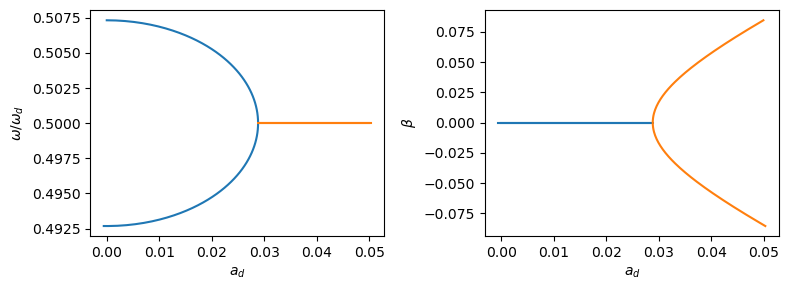

In [6]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(spars,np.real(somegas)/(2*np.pi*argsdict['freq']))
plt.plot(spars4,np.real(somegas4)/(2*np.pi*argsdict['freq']))
plt.xlabel('$a_d$')
plt.ylabel(r'$\omega/\omega_d$')
plt.subplot(1,2,2)
plt.ylabel(r'$\beta$')
plt.plot(spars,np.imag(somegas))
plt.plot(spars4,np.imag(somegas4))
plt.xlabel('$a_d$')
plt.tight_layout()
plt.savefig('subharmonic.pdf')
plt.show()

### Inviscid coresonance predicted by degenerate perturbations matrix elements

In [7]:
omegas=[]
gs=[]

for m in range(3):
    for n in range(len(kxss[m])):
        print(m,n,end='\r')
        argsdict['kx']=kxss[m][n]
        argsdict['ky']=kyss[m][n]

        E2,F2=viscid.inviscid_mat_undriven(argsdict)
        evals,evecs=eig(E2,F2)
        U=evecs.reshape((7,7,7,7))
        Uinv=np.linalg.inv(evecs).reshape(7,7,7,7)

        E,F,D=viscid.inviscid_mat(argsdict)
        Eshaped=E.reshape((7,7,7,7,7,7))
        Fshaped=F.reshape((7,7,7,7,7,7))
        Dshaped=D.reshape((7,7,7,7,7,7))
        Finvshaped=np.linalg.inv(F2).reshape((7,7,7,7))
        E2shaped=E2.reshape((7,7,7,7))
        test=np.tensordot(Uinv,np.tensordot(np.tensordot(Finvshaped,E2shaped,axes=((2,3),(0,1))),U,axes=((2,3),(0,1))),axes=((2,3),(0,1)))
        order=np.argsort(np.diag(test.reshape((49,49))))

        test2=np.tensordot(Uinv,np.tensordot(np.tensordot(Finvshaped,Eshaped,axes=((2,3),(1,2))),U,axes=((4,5),(0,1))),axes=((2,3),(0,1)))
        test3=np.tensordot(Uinv,np.tensordot(np.tensordot(Finvshaped,Dshaped,axes=((2,3),(1,2))),U,axes=((4,5),(0,1))),axes=((2,3),(0,1)))
        mat=np.zeros((len(order),len(order)))
        mat[tuple(np.array([np.arange(len(order)),order]))]=1
        newtest2=np.abs(test2.transpose(2,0,1,3,4,5)[3,:,:,3,:,:].reshape(49,49))
        newtest3=test3.transpose(2,0,1,3,4,5)[3,:,:,4,:,:].reshape(49,49)*test3.transpose(2,0,1,3,4,5)[3,:,:,4,:,:].reshape(49,49).T
        omegas=omegas+[(np.diag(mat.dot(newtest2).dot(mat.T)))**0.5]
        gs=gs+[mat.dot(newtest3).dot(mat.T)]


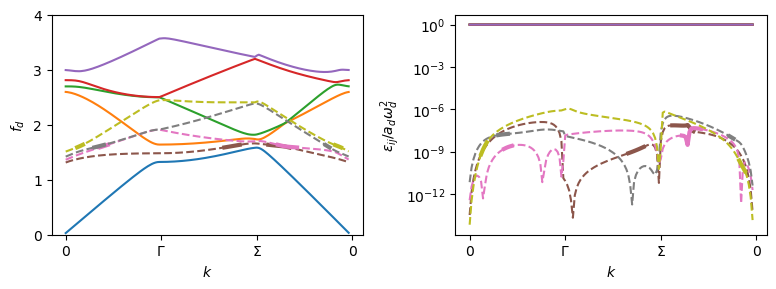

In [8]:
plt.subplots(1,2,figsize=(8,3))

plt.subplot(1,2,1)

plt.subplot(1,2,1)
for i in range(5):
    plt.plot(np.array(omegas)[:,i]*2/(2*np.pi))
ind=5
for i in range(5):
    for j in range(i+1,5):
        if ind<9:
            plt.plot((np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j]))/(2*np.pi),ls='--',color=colors[np.mod(ind,len(colors))])
            fmin=np.max(np.array(omegas)[:,0]*2)
            fmax=np.min(np.array(omegas)[:,1]*2)
            inds=np.intersect1d(np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])>fmin)[0],np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])<fmax)[0])
            ends=np.concatenate([[0],np.where(np.diff(inds)>1)[0]+1,[len(inds)]])
            for endi in range(len(ends)-1):
                plt.plot(inds[ends[endi]:ends[endi+1]],(np.abs(np.array(omegas)[inds[ends[endi]:ends[endi+1]],i]+np.array(omegas)[inds[ends[endi]:ends[endi+1]],j]))/(2*np.pi),lw=3,color=colors[np.mod(ind,len(colors))])
            ind=ind+1
        
plt.ylim(0,4)
plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel('$f_d$')


plt.subplot(1,2,2)
for i in range(5):
    plt.plot(np.real(np.array(gs)[:,i,i]*np.array(gs)[:,i,i])**0.5/((np.array(omegas)[:,i]+np.array(omegas)[:,i])**6/2**6*np.array(omegas)[:,i]*np.array(omegas)[:,i])**0.5)
ind=5
for i in range(5):
    for j in range(i+1,5):
        if ind<9:
            plt.plot(np.real(np.array(gs)[:,i,j]*np.array(gs)[:,j,i])**0.5/((np.array(omegas)[:,i]+np.array(omegas)[:,j])**6/2**6*np.array(omegas)[:,i]*np.array(omegas)[:,j])**0.5,ls='--',color=colors[np.mod(ind,len(colors))])
            fmin=np.max(np.array(omegas)[:,0])
            fmax=np.min(np.array(omegas)[:,1])
            inds=np.intersect1d(np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])/2>fmin)[0],np.where(np.abs(np.array(omegas)[:,i]+np.array(omegas)[:,j])/2<fmax)[0])
            ends=np.concatenate([[0],np.where(np.diff(inds)>1)[0]+1,[len(inds)]])
            for endi in range(len(ends)-1):
                plt.plot(inds[ends[endi]:ends[endi+1]],np.real(np.array(gs)[inds[ends[endi]:ends[endi+1]],i,j]*np.array(gs)[inds[ends[endi]:ends[endi+1]],j,i])**0.5/((np.array(omegas)[inds[ends[endi]:ends[endi+1]],i]+np.array(omegas)[inds[ends[endi]:ends[endi+1]],j])**6/2**6*np.array(omegas)[inds[ends[endi]:ends[endi+1]],i]*np.array(omegas)[inds[ends[endi]:ends[endi+1]],j])**0.5,lw=3,color=colors[np.mod(ind,len(colors))])
            ind=ind+1
plt.yscale('log')

plt.xticks([0,50,100,150],['0','$\Gamma$','$\Sigma$','0'])
plt.xlabel('$k$')
plt.ylabel(r'$\varepsilon_{ij}/a_d\omega_d^2$')
plt.tight_layout()
plt.savefig('degenerate.pdf')

plt.show()


### Pseudoarclength continuation confirms weak wave mixing and coresonance

In [10]:
imp.reload(viscid)

def mat(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+argsdict['ad']*D.reshape(shape)).reshape((n_flat,n_flat))
def mat2(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    return (-2*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat))
def mat3(omega,argsdict):
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    E,F,D=viscid.inviscid_mat(argsdict)
    return D


kind=115
argsdict['kx']=np.concatenate(kxss)[kind]
argsdict['ky']=np.concatenate(kyss)[kind]
argsdict['ad']=0
argsdict['freq']=1.599
# argsdict['freq']=1.6
argsdict['verbose']=1
argsdict['epss']=0

order=np.argsort(np.concatenate(evalssweeps)[kind])

omega1=np.concatenate(evalssweeps)[kind][order[0]]**0.5+1j*1E-8
v1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
v1[argsdict['Nt']]=np.concatenate(revecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
v1=v1.ravel()
w1=np.zeros((2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),np.complex128)
w1[argsdict['Nt']]=np.concatenate(levecssweeps)[kind][:,order[0]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
w1=w1.ravel()

omegans1,vns1,wns1=viscid.rayleigh_mat(omega1,v1,w1,mat,argsdict)
argsdict['par']='ad'
argsdict['pari']=0
argsdict['parf']=0.05
argsdict['dsmax']=1E-3
argsdict['ds']=1E-3
argsdict['dsmin']=1E-10
argsdict['itmax']=5
argsdict['Nsteps']=200
omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omegans1[-1],vns1[-1],wns1[-1],mat,argsdict,mat2=mat2,mat3=mat3)

n=0 dv=2.486216e-03 dw=2.487061e-03 dl=1.415736e-04
n=1 dv=5.582870e-17 dw=3.490481e-17 dl=1.415663e-04
n=2 dv=5.582870e-17 dw=5.584769e-17 dl=1.274669e-08
newdir=(0.000,-0.000,1.000)
step=0 ds=1.000000e-03 ad=0.000000 lambda=3.675649+i-0.000000 dir=(0.000, -0.000, 1.000)
pre dv=2.350e-04 dlambda=0.000e+00 dmu=9.988e-04 ad=0.001000 lr=3.675649 li=-0.000000 mstp=1.110e-16
n=0 dv=1.682e-07 dlambda=2.258e-07 dmu=4.484e-11 ad=0.001000 lr=3.675650 li=0.000000 mstp=5.575e-07
deltadir=-5.576e-07 stp=(0.001,0.000,1.000) newdir=(0.002, -0.000, 1.000)
ds=1.000e-03 ad=0.001000 lambda=3.675650+0.000000i stp=(0.001,0.000,1.000) mstp=5.575e-07
step=1 ds=1.000000e-03 ad=0.001000 lambda=3.675650+i0.000000 dir=(0.002, -0.000, 1.000)
pre dv=2.350e-04 dlambda=4.516e-07 dmu=9.978e-04 ad=0.002000 lr=3.675652 li=0.000000 mstp=0.000e+00
n=0 dv=3.728e-07 dlambda=2.258e-07 dmu=2.405e-09 ad=0.002000 lr=3.675653 li=-0.000000 mstp=5.578e-07
deltadir=-5.580e-07 stp=(0.003,-0.000,1.000) newdir=(0.004, 0.000, 1.000)

n=0 dv=2.020e-05 dlambda=2.247e-07 dmu=6.906e-08 ad=0.019990 lr=3.676071 li=-0.000000 mstp=1.513e-06
deltadir=-1.665e-06 stp=(0.041,0.000,0.999) newdir=(0.042, 0.000, 0.999)
ds=1.000e-03 ad=0.019990 lambda=3.676071+-0.000000i stp=(0.041,0.000,0.999) mstp=1.513e-06
step=20 ds=1.000000e-03 ad=0.019990 lambda=3.676071+i-0.000000 dir=(0.042, 0.000, 0.999)
pre dv=3.739e-04 dlambda=9.019e-06 dmu=9.782e-04 ad=0.020989 lr=3.676113 li=-0.000000 mstp=0.000e+00
n=0 dv=2.530e-05 dlambda=2.245e-07 dmu=8.301e-08 ad=0.020989 lr=3.676114 li=-0.000000 mstp=2.059e-06
deltadir=-2.315e-06 stp=(0.043,-0.000,0.999) newdir=(0.044, 0.000, 0.999)
ds=1.000e-03 ad=0.020989 lambda=3.676114+-0.000000i stp=(0.043,-0.000,0.999) mstp=2.059e-06
step=21 ds=1.000000e-03 ad=0.020989 lambda=3.676114+i-0.000000 dir=(0.044, 0.000, 0.999)
pre dv=4.266e-04 dlambda=9.468e-06 dmu=9.770e-04 ad=0.021987 lr=3.676158 li=-0.000000 mstp=1.110e-16
n=0 dv=3.222e-05 dlambda=2.241e-07 dmu=1.037e-07 ad=0.021987 lr=3.676159 li=-0.000000 ms

n=0 dv=2.479e-04 dlambda=2.144e-07 dmu=1.409e-05 ad=0.032837 lr=3.676784 li=-0.000000 mstp=2.297e-04
deltadir=-2.027e-04 stp=(0.006,-0.000,0.089) newdir=(0.005, 0.000, 0.077)
ds=1.000e-03 ad=0.032837 lambda=3.676784+-0.000000i stp=(0.006,-0.000,0.089) mstp=2.297e-04
step=37 ds=1.000000e-03 ad=0.032837 lambda=3.676784+i-0.000000 dir=(0.005, 0.000, 0.077)
pre dv=1.438e-02 dlambda=1.030e-06 dmu=7.409e-05 ad=0.032913 lr=3.676789 li=-0.000000 mstp=-2.220e-16
n=0 dv=2.459e-04 dlambda=1.412e-07 dmu=9.224e-06 ad=0.032904 lr=3.676789 li=0.000000 mstp=1.693e-04
deltadir=-1.591e-04 stp=(0.004,0.000,0.067) newdir=(0.004, 0.000, 0.059)
ds=1.000e-03 ad=0.032904 lambda=3.676789+0.000000i stp=(0.004,0.000,0.067) mstp=1.693e-04
step=38 ds=1.000000e-03 ad=0.032904 lambda=3.676789+i0.000000 dir=(0.004, 0.000, 0.059)
pre dv=1.435e-02 dlambda=7.648e-07 dmu=5.680e-05 ad=0.032963 lr=3.676792 li=0.000000 mstp=3.331e-16
n=0 dv=2.443e-04 dlambda=9.792e-08 dmu=6.354e-06 ad=0.032956 lr=3.676792 li=0.000000 mstp=1

deltadir=-1.250e-04 stp=(-0.001,0.000,0.002) newdir=(-0.001, -0.000, 0.002)
ds=1.000e-03 ad=0.033207 lambda=3.676797+-0.000000i stp=(-0.001,0.000,0.002) mstp=1.249e-04
step=57 ds=1.000000e-03 ad=0.033207 lambda=3.676797+i-0.000000 dir=(-0.001, -0.000, 0.002)
pre dv=1.372e-02 dlambda=2.093e-07 dmu=1.587e-06 ad=0.033209 lr=3.676796 li=-0.000000 mstp=0.000e+00
n=0 dv=2.078e-04 dlambda=1.452e-08 dmu=3.695e-07 ad=0.033208 lr=3.676795 li=-0.000000 mstp=1.249e-04
deltadir=-1.250e-04 stp=(-0.001,-0.000,0.001) newdir=(-0.001, -0.000, 0.001)
ds=1.000e-03 ad=0.033208 lambda=3.676795+-0.000000i stp=(-0.001,-0.000,0.001) mstp=1.249e-04
step=58 ds=1.000000e-03 ad=0.033208 lambda=3.676795+i-0.000000 dir=(-0.001, -0.000, 0.001)
pre dv=1.394e-02 dlambda=2.389e-07 dmu=8.467e-07 ad=0.033209 lr=3.676794 li=-0.000000 mstp=0.000e+00
n=0 dv=2.106e-04 dlambda=1.601e-08 dmu=3.792e-07 ad=0.033209 lr=3.676794 li=0.000000 mstp=1.250e-04
deltadir=-1.250e-04 stp=(-0.001,0.000,0.000) newdir=(-0.001, 0.000, 0.000)
ds

n=0 dv=2.418e-04 dlambda=3.297e-06 dmu=5.524e-05 ad=0.032552 lr=3.676596 li=-0.000000 mstp=1.912e-03
deltadir=-3.211e-03 stp=(-0.060,-0.000,-0.218) newdir=(-0.080, 0.000, -0.291)
ds=1.000e-03 ad=0.032552 lambda=3.676596+-0.000000i stp=(-0.060,-0.000,-0.218) mstp=1.912e-03
step=77 ds=1.000000e-03 ad=0.032552 lambda=3.676596+i-0.000000 dir=(-0.060, -0.000, -0.218)
pre dv=1.582e-02 dlambda=1.290e-05 dmu=2.112e-04 ad=0.032334 lr=3.676536 li=-0.000000 mstp=0.000e+00
n=0 dv=6.800e-04 dlambda=1.230e-05 dmu=2.084e-04 ad=0.032119 lr=3.676478 li=-0.000000 mstp=2.579e-02
n=1 dv=8.203e-05 dlambda=2.054e-07 dmu=3.450e-06 ad=0.032123 lr=3.676479 li=0.000000 mstp=2.538e-02
deltadir=-1.677e-02 stp=(-0.114,0.000,-0.419) newdir=(-0.154, -0.000, -0.570)
ds=1.000e-03 ad=0.032123 lambda=3.676479+0.000000i stp=(-0.117,0.000,-0.430) mstp=2.538e-02
step=78 ds=1.000000e-03 ad=0.032123 lambda=3.676479+i0.000000 dir=(-0.114, 0.000, -0.419)
pre dv=1.468e-02 dlambda=2.438e-05 dmu=4.060e-04 ad=0.031704 lr=3.676365 

deltadir=-8.347e-06 stp=(-0.125,-0.000,-0.991) newdir=(-0.121, 0.000, -0.991)
ds=1.000e-03 ad=0.014645 lambda=3.673064+0.000000i stp=(-0.125,-0.000,-0.991) mstp=8.338e-06
step=96 ds=1.000000e-03 ad=0.014645 lambda=3.673064+i0.000000 dir=(-0.121, 0.000, -0.991)
pre dv=6.926e-04 dlambda=2.593e-05 dmu=9.781e-04 ad=0.013654 lr=3.672943 li=0.000000 mstp=-2.220e-16
n=0 dv=4.802e-06 dlambda=8.666e-07 dmu=4.894e-07 ad=0.013653 lr=3.672947 li=-0.000000 mstp=8.367e-06
deltadir=-8.377e-06 stp=(-0.117,-0.000,-0.992) newdir=(-0.113, 0.000, -0.992)
ds=1.000e-03 ad=0.013653 lambda=3.672947+-0.000000i stp=(-0.117,-0.000,-0.992) mstp=8.367e-06
step=97 ds=1.000000e-03 ad=0.013653 lambda=3.672947+i-0.000000 dir=(-0.113, 0.000, -0.992)
pre dv=6.945e-04 dlambda=2.420e-05 dmu=9.800e-04 ad=0.012661 lr=3.672834 li=-0.000000 mstp=0.000e+00
n=0 dv=4.060e-06 dlambda=8.697e-07 dmu=4.580e-07 ad=0.012660 lr=3.672838 li=0.000000 mstp=8.399e-06
deltadir=-8.409e-06 stp=(-0.109,0.000,-0.993) newdir=(-0.105, -0.000, -0.

### Switch branches at the bifurcation points

In [11]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')


ind=np.where(np.diff(pars)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

argsdict['itmax']=5
argsdict['par']='ad'
argsdict['pari']=0.02
argsdict['parf']=0.041
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-14
argsdict['Nsteps']=100
omegas3,vs3,ws3,pars3,dirs3,dss3=viscid.pseudocont(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)


step=0 ds=1.000000e-03 ad=0.033209 lambda=3.676794+i0.000000 dir=(0.000, 0.001, -0.000)
pre dv=1.432e-02 dlambda=2.754e-07 dmu=2.610e-10 ad=0.033209 lr=3.676794 li=0.000001 mstp=-9.319e-10
n=0 dv=2.979e-04 dlambda=1.511e-08 dmu=3.922e-07 ad=0.033209 lr=3.676794 li=0.000001 mstp=1.626e-04
deltadir=-1.656e-04 stp=(0.000,0.001,0.000) newdir=(0.000, 0.001, 0.001)
ds=1.000e-03 ad=0.033209 lambda=3.676794+0.000001i stp=(0.000,0.001,0.000) mstp=1.626e-04
step=1 ds=1.000000e-03 ad=0.033209 lambda=3.676794+i0.000001 dir=(0.000, 0.001, 0.001)
pre dv=1.432e-02 dlambda=2.765e-07 dmu=7.839e-07 ad=0.033210 lr=3.676794 li=0.000003 mstp=0.000e+00
n=0 dv=3.003e-04 dlambda=1.503e-08 dmu=3.904e-07 ad=0.033211 lr=3.676794 li=0.000003 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.000,0.001,0.001) newdir=(0.000, 0.001, 0.002)
ds=1.000e-03 ad=0.033211 lambda=3.676794+0.000003i stp=(0.000,0.001,0.001) mstp=1.640e-04
step=2 ds=1.000000e-03 ad=0.033211 lambda=3.676794+i0.000003 dir=(0.000, 0.001, 0.002)
pre dv=1.43

n=0 dv=3.000e-04 dlambda=9.511e-09 dmu=9.080e-08 ad=0.033361 lr=3.676821 li=0.000019 mstp=1.639e-04
deltadir=-1.640e-04 stp=(0.002,0.000,0.012) newdir=(0.002, 0.000, 0.012)
ds=1.000e-03 ad=0.033361 lambda=3.676821+0.000019i stp=(0.002,0.000,0.012) mstp=1.639e-04
step=21 ds=1.000000e-03 ad=0.033361 lambda=3.676821+i0.000019 dir=(0.002, 0.000, 0.012)
pre dv=1.438e-02 dlambda=4.581e-07 dmu=1.178e-05 ad=0.033374 lr=3.676823 li=0.000020 mstp=1.110e-16
n=0 dv=2.999e-04 dlambda=9.311e-09 dmu=6.553e-08 ad=0.033374 lr=3.676823 li=0.000020 mstp=1.639e-04
deltadir=-1.640e-04 stp=(0.002,0.000,0.012) newdir=(0.002, 0.000, 0.012)
ds=1.000e-03 ad=0.033374 lambda=3.676823+0.000020i stp=(0.002,0.000,0.012) mstp=1.639e-04
step=22 ds=1.000000e-03 ad=0.033374 lambda=3.676823+i0.000020 dir=(0.002, 0.000, 0.012)
pre dv=1.438e-02 dlambda=4.614e-07 dmu=1.191e-05 ad=0.033386 lr=3.676825 li=0.000020 mstp=0.000e+00
n=0 dv=2.999e-04 dlambda=9.172e-09 dmu=3.994e-08 ad=0.033386 lr=3.676825 li=0.000020 mstp=1.639e-0

deltadir=-1.641e-04 stp=(0.001,-0.001,0.007) newdir=(0.001, -0.001, 0.007)
ds=1.000e-03 ad=0.033556 lambda=3.676855+0.000011i stp=(0.001,-0.001,0.007) mstp=1.640e-04
step=39 ds=1.000000e-03 ad=0.033556 lambda=3.676855+i0.000011 dir=(0.001, -0.001, 0.007)
pre dv=1.445e-02 dlambda=3.466e-07 dmu=6.625e-06 ad=0.033563 lr=3.676856 li=0.000010 mstp=0.000e+00
n=0 dv=2.995e-04 dlambda=1.393e-08 dmu=3.369e-07 ad=0.033562 lr=3.676856 li=0.000010 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.001,-0.001,0.007) newdir=(0.001, -0.001, 0.006)
ds=1.000e-03 ad=0.033562 lambda=3.676856+0.000010i stp=(0.001,-0.001,0.006) mstp=1.640e-04
step=40 ds=1.000000e-03 ad=0.033562 lambda=3.676856+i0.000010 dir=(0.001, -0.001, 0.006)
pre dv=1.445e-02 dlambda=3.345e-07 dmu=5.951e-06 ad=0.033569 lr=3.676857 li=0.000009 mstp=0.000e+00
n=0 dv=2.994e-04 dlambda=1.425e-08 dmu=3.500e-07 ad=0.033568 lr=3.676857 li=0.000009 mstp=1.640e-04
deltadir=-1.641e-04 stp=(0.001,-0.001,0.006) newdir=(0.001, -0.001, 0.005)
ds=1.000e-03 ad

n=0 dv=2.995e-04 dlambda=1.386e-08 dmu=3.338e-07 ad=0.033554 lr=3.676854 li=-0.000011 mstp=1.640e-04
deltadir=-1.641e-04 stp=(-0.001,-0.001,-0.007) newdir=(-0.001, -0.001, -0.007)
ds=1.000e-03 ad=0.033554 lambda=3.676854+-0.000011i stp=(-0.001,-0.001,-0.007) mstp=1.640e-04
step=57 ds=1.000000e-03 ad=0.033554 lambda=3.676854+i-0.000011 dir=(-0.001, -0.001, -0.007)
pre dv=1.445e-02 dlambda=3.502e-07 dmu=6.820e-06 ad=0.033547 lr=3.676853 li=-0.000012 mstp=0.000e+00
n=0 dv=2.995e-04 dlambda=1.351e-08 dmu=3.190e-07 ad=0.033546 lr=3.676853 li=-0.000012 mstp=1.640e-04
deltadir=-1.640e-04 stp=(-0.001,-0.001,-0.007) newdir=(-0.001, -0.001, -0.008)
ds=1.000e-03 ad=0.033546 lambda=3.676853+-0.000012i stp=(-0.001,-0.001,-0.007) mstp=1.640e-04
step=58 ds=1.000000e-03 ad=0.033546 lambda=3.676853+i-0.000012 dir=(-0.001, -0.001, -0.008)
pre dv=1.445e-02 dlambda=3.625e-07 dmu=7.457e-06 ad=0.033539 lr=3.676852 li=-0.000013 mstp=0.000e+00
n=0 dv=2.995e-04 dlambda=1.314e-08 dmu=3.027e-07 ad=0.033538 lr=3.

n=0 dv=2.999e-04 dlambda=9.354e-09 dmu=7.123e-08 ad=0.033358 lr=3.676820 li=-0.000019 mstp=1.639e-04
deltadir=-1.640e-04 stp=(-0.002,0.000,-0.012) newdir=(-0.002, 0.000, -0.012)
ds=1.000e-03 ad=0.033358 lambda=3.676820+-0.000019i stp=(-0.002,0.000,-0.012) mstp=1.639e-04
step=75 ds=1.000000e-03 ad=0.033358 lambda=3.676820+i-0.000019 dir=(-0.002, 0.000, -0.012)
pre dv=1.438e-02 dlambda=4.568e-07 dmu=1.173e-05 ad=0.033346 lr=3.676818 li=-0.000019 mstp=-2.220e-16
n=0 dv=3.000e-04 dlambda=9.567e-09 dmu=9.642e-08 ad=0.033346 lr=3.676818 li=-0.000019 mstp=1.639e-04
deltadir=-1.640e-04 stp=(-0.002,0.000,-0.012) newdir=(-0.002, 0.000, -0.012)
ds=1.000e-03 ad=0.033346 lambda=3.676818+-0.000019i stp=(-0.002,0.000,-0.012) mstp=1.639e-04
step=76 ds=1.000000e-03 ad=0.033346 lambda=3.676818+i-0.000019 dir=(-0.002, 0.000, -0.012)
pre dv=1.437e-02 dlambda=4.519e-07 dmu=1.154e-05 ad=0.033334 lr=3.676816 li=-0.000019 mstp=0.000e+00
n=0 dv=3.000e-04 dlambda=9.831e-09 dmu=1.212e-07 ad=0.033334 lr=3.676816 

n=0 dv=3.003e-04 dlambda=1.486e-08 dmu=3.835e-07 ad=0.033212 lr=3.676795 li=-0.000003 mstp=1.640e-04
deltadir=-1.641e-04 stp=(-0.000,0.001,-0.003) newdir=(-0.000, 0.001, -0.002)
ds=1.000e-03 ad=0.033212 lambda=3.676795+-0.000003i stp=(-0.000,0.001,-0.003) mstp=1.640e-04
step=93 ds=1.000000e-03 ad=0.033212 lambda=3.676795+i-0.000003 dir=(-0.000, 0.001, -0.002)
pre dv=1.432e-02 dlambda=2.830e-07 dmu=2.110e-06 ad=0.033210 lr=3.676794 li=-0.000002 mstp=0.000e+00
n=0 dv=3.003e-04 dlambda=1.497e-08 dmu=3.880e-07 ad=0.033210 lr=3.676794 li=-0.000002 mstp=1.640e-04
deltadir=-1.641e-04 stp=(-0.000,0.001,-0.002) newdir=(-0.000, 0.001, -0.001)
ds=1.000e-03 ad=0.033210 lambda=3.676794+-0.000002i stp=(-0.000,0.001,-0.002) mstp=1.640e-04
step=94 ds=1.000000e-03 ad=0.033210 lambda=3.676794+i-0.000002 dir=(-0.000, 0.001, -0.001)
pre dv=1.432e-02 dlambda=2.785e-07 dmu=1.334e-06 ad=0.033209 lr=3.676794 li=-0.000001 mstp=1.110e-16
n=0 dv=3.003e-04 dlambda=1.504e-08 dmu=3.909e-07 ad=0.033209 lr=3.676794 l

In [12]:
imp.reload(viscid)

fomega=interp1d(np.arange(len(omegas3)),omegas3,kind='cubic')
fv=interp1d(np.arange(len(omegas3)),np.array(vs3).T,kind='cubic')
fw=interp1d(np.arange(len(omegas3)),np.array(ws3).T,kind='cubic')
fpar=interp1d(np.arange(len(omegas3)),pars3,kind='cubic')
fdir=interp1d(np.arange(len(omegas3)),np.array(dirs3).T,kind='cubic')

ind=np.where(np.diff(pars3)<0)[0][0]
find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-2,ind)).x

omega0=complex(fomega(find))
v0=fv(find)
w0=fw(find)
dir0=fdir(find)
argsdict[argsdict['par']]=float(fpar(find))

s=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
newdir=np.zeros(dir0.shape)
newdir[:s]=dir0[s:2*s]
newdir[s:2*s]=-dir0[:s]
newdir[2*s]=dir0[2*s+1]
newdir[2*s+1]=-dir0[2*s]
newdir[2*s+2]=2*dir0[2*s+2]
dir0=newdir

imp.reload(viscid)
argsdict['itmax']=5
argsdict['par']='ad'
argsdict['pari']=0.02
argsdict['parf']=0.05
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
argsdict['ds']=1E-3
argsdict['dsmax']=1E-3
argsdict['dsmin']=1E-12
omegas4,vs4,ws4,pars4,dirs4,dss4=viscid.pseudocont(omega0,v0,w0,mat,argsdict,mat2=mat2,mat3=mat3,dir=dir0)
argsdict['ds']=-1E-3
argsdict['dsmax']=1E-3
argsdict['Nsteps']=500
argsdict[argsdict['par']]=pars4[-2]
argsdict['parf']=pars4[-1]
omegas5,vs5,ws5,pars5,dirs5,dss5=viscid.pseudocont(omegas4[-2],vs4[-2],ws4[-2],mat,argsdict,mat2=mat2,mat3=mat3)

step=0 ds=1.000000e-03 ad=0.033587 lambda=3.676860+i0.000000 dir=(-0.001, -0.000, 0.000)
pre dv=1.461e-02 dlambda=2.785e-07 dmu=1.676e-10 ad=0.033587 lr=3.676859 li=0.000000 mstp=-2.713e-08
n=0 dv=2.077e-04 dlambda=1.731e-08 dmu=3.900e-07 ad=0.033587 lr=3.676859 li=-0.000000 mstp=1.249e-04
n=1 dv=7.085e-06 dlambda=1.215e-10 dmu=3.851e-10 ad=0.033587 lr=3.676859 li=0.000000 mstp=1.251e-04
n=2 dv=1.750e-09 dlambda=3.068e-14 dmu=9.657e-14 ad=0.033587 lr=3.676859 li=0.000000 mstp=1.251e-04
deltadir=-1.251e-04 stp=(-0.001,-0.000,0.000) newdir=(-0.001, -0.000, 0.001)
ds=1.000e-03 ad=0.033587 lambda=3.676859+0.000000i stp=(-0.001,-0.000,0.000) mstp=1.251e-04
step=1 ds=1.000000e-03 ad=0.033587 lambda=3.676859+i0.000000 dir=(-0.001, -0.000, 0.001)
pre dv=1.442e-02 dlambda=2.447e-07 dmu=7.754e-07 ad=0.033588 lr=3.676858 li=0.000000 mstp=-2.220e-16
n=0 dv=2.045e-04 dlambda=1.560e-08 dmu=3.762e-07 ad=0.033589 lr=3.676858 li=-0.000000 mstp=1.249e-04
n=1 dv=7.003e-06 dlambda=1.067e-10 dmu=7.608e-10 

deltadir=-1.254e-04 stp=(0.000,-0.000,0.013) newdir=(0.000, 0.000, 0.014)
ds=1.000e-03 ad=0.033661 lambda=3.676854+-0.000000i stp=(0.000,-0.000,0.013) mstp=1.254e-04
step=13 ds=1.000000e-03 ad=0.033661 lambda=3.676854+i-0.000000 dir=(0.000, 0.000, 0.014)
pre dv=1.350e-02 dlambda=7.400e-08 dmu=1.318e-05 ad=0.033675 lr=3.676855 li=-0.000000 mstp=0.000e+00
n=0 dv=2.333e-04 dlambda=1.835e-08 dmu=1.015e-06 ad=0.033676 lr=3.676855 li=-0.000000 mstp=1.254e-04
n=1 dv=6.863e-06 dlambda=5.581e-11 dmu=7.636e-09 ad=0.033676 lr=3.676855 li=-0.000000 mstp=1.256e-04
n=2 dv=2.574e-10 dlambda=2.168e-15 dmu=2.853e-13 ad=0.033676 lr=3.676855 li=0.000000 mstp=1.256e-04
deltadir=-1.256e-04 stp=(0.000,0.000,0.015) newdir=(0.001, -0.000, 0.016)
ds=1.000e-03 ad=0.033676 lambda=3.676855+0.000000i stp=(0.000,0.000,0.015) mstp=1.256e-04
step=14 ds=1.000000e-03 ad=0.033676 lambda=3.676855+i0.000000 dir=(0.001, -0.000, 0.016)
pre dv=1.363e-02 dlambda=1.117e-07 dmu=1.528e-05 ad=0.033692 lr=3.676855 li=0.000000 mstp

n=0 dv=5.106e-04 dlambda=1.699e-06 dmu=1.039e-04 ad=0.034648 lr=3.676919 li=-0.000000 mstp=6.431e-03
n=1 dv=2.430e-06 dlambda=1.013e-09 dmu=6.355e-08 ad=0.034648 lr=3.676919 li=-0.000000 mstp=6.428e-03
n=2 dv=1.197e-10 dlambda=4.992e-14 dmu=3.135e-12 ad=0.034648 lr=3.676919 li=-0.000000 mstp=6.428e-03
deltadir=-3.498e-03 stp=(0.021,-0.000,0.289) newdir=(0.026, 0.000, 0.366)
ds=1.000e-03 ad=0.034648 lambda=3.676919+-0.000000i stp=(0.021,-0.000,0.290) mstp=6.428e-03
step=26 ds=1.000000e-03 ad=0.034648 lambda=3.676919+i-0.000000 dir=(0.021, -0.000, 0.289)
pre dv=1.388e-02 dlambda=4.403e-06 dmu=2.789e-04 ad=0.034937 lr=3.676939 li=-0.000000 mstp=-2.220e-16
n=0 dv=7.754e-04 dlambda=3.331e-06 dmu=2.005e-04 ad=0.035144 lr=3.676955 li=-0.000000 mstp=2.323e-02
n=1 dv=6.971e-05 dlambda=5.791e-08 dmu=3.551e-06 ad=0.035140 lr=3.676954 li=-0.000000 mstp=2.290e-02
n=2 dv=1.196e-07 dlambda=9.908e-11 dmu=6.077e-09 ad=0.035140 lr=3.676954 li=0.000000 mstp=2.290e-02
deltadir=-1.162e-02 stp=(0.035,0.000,

n=0 dv=2.188e-05 dlambda=2.229e-07 dmu=6.602e-08 ad=0.047799 lr=3.678064 li=0.000000 mstp=1.695e-06
n=1 dv=3.286e-12 dlambda=2.179e-13 dmu=9.620e-12 ad=0.047799 lr=3.678064 li=0.000000 mstp=1.695e-06
deltadir=-1.542e-06 stp=(0.100,-0.000,0.995) newdir=(0.101, -0.000, 0.995)
ds=1.000e-03 ad=0.047799 lambda=3.678064+0.000000i stp=(0.100,-0.000,0.995) mstp=1.695e-06
step=40 ds=1.000000e-03 ad=0.047799 lambda=3.678064+i0.000000 dir=(0.101, -0.000, 0.995)
pre dv=3.242e-04 dlambda=2.149e-05 dmu=9.483e-04 ad=0.048794 lr=3.678164 li=0.000000 mstp=-1.110e-16
n=0 dv=1.769e-05 dlambda=2.226e-07 dmu=7.748e-08 ad=0.048793 lr=3.678165 li=-0.000000 mstp=1.302e-06
n=1 dv=1.931e-12 dlambda=1.456e-13 dmu=6.292e-12 ad=0.048793 lr=3.678165 li=-0.000000 mstp=1.302e-06
deltadir=-1.208e-06 stp=(0.102,-0.000,0.995) newdir=(0.103, 0.000, 0.994)
ds=1.000e-03 ad=0.048793 lambda=3.678165+-0.000000i stp=(0.102,-0.000,0.995) mstp=1.302e-06
step=41 ds=1.000000e-03 ad=0.048793 lambda=3.678165+i-0.000000 dir=(0.103, 0

n=1 dv=2.137e-09 dlambda=1.250e-11 dmu=7.043e-10 ad=0.037868 lr=3.677164 li=-0.000000 mstp=4.062e-04
deltadir=-5.921e-04 stp=(0.080,-0.000,0.984) newdir=(0.078, -0.000, 0.978)
ds=-1.000e-03 ad=0.037868 lambda=3.677164+-0.000000i stp=(0.080,-0.000,0.984) mstp=4.062e-04
step=12 ds=-1.000000e-03 ad=0.037868 lambda=3.677164+i-0.000000 dir=(0.078, -0.000, 0.978)
pre dv=2.858e-03 dlambda=1.672e-05 dmu=9.430e-04 ad=0.036891 lr=3.677086 li=-0.000000 mstp=-1.110e-16
n=0 dv=7.400e-04 dlambda=3.873e-07 dmu=9.580e-06 ad=0.036900 lr=3.677088 li=-0.000000 mstp=1.343e-03
n=1 dv=6.838e-08 dlambda=2.406e-10 dmu=1.394e-08 ad=0.036900 lr=3.677088 li=0.000000 mstp=1.343e-03
deltadir=-2.059e-03 stp=(0.076,-0.000,0.967) newdir=(0.074, -0.000, 0.949)
ds=-1.000e-03 ad=0.036900 lambda=3.677088+0.000000i stp=(0.076,-0.000,0.968) mstp=1.343e-03
step=13 ds=-1.000000e-03 ad=0.036900 lambda=3.677088+i0.000000 dir=(0.076, -0.000, 0.967)
pre dv=3.594e-03 dlambda=1.631e-05 dmu=9.331e-04 ad=0.035934 lr=3.677012 li=0.00

n=1 dv=7.002e-06 dlambda=1.364e-10 dmu=1.238e-08 ad=0.033736 lr=3.676857 li=0.000000 mstp=1.284e-04
n=2 dv=3.041e-10 dlambda=5.990e-15 dmu=5.382e-13 ad=0.033736 lr=3.676857 li=-0.000000 mstp=1.284e-04
deltadir=-1.279e-04 stp=(0.001,-0.000,0.028) newdir=(0.001, 0.000, 0.026)
ds=-1.000e-03 ad=0.033736 lambda=3.676857+-0.000000i stp=(0.001,-0.000,0.028) mstp=1.284e-04
step=25 ds=-1.000000e-03 ad=0.033736 lambda=3.676857+i-0.000000 dir=(0.001, 0.000, 0.026)
pre dv=1.413e-02 dlambda=2.736e-07 dmu=2.484e-05 ad=0.033711 lr=3.676856 li=-0.000000 mstp=-1.110e-16
n=0 dv=2.373e-04 dlambda=3.365e-08 dmu=2.029e-06 ad=0.033713 lr=3.676856 li=0.000000 mstp=1.269e-04
n=1 dv=6.960e-06 dlambda=1.042e-10 dmu=1.045e-08 ad=0.033713 lr=3.676856 li=0.000000 mstp=1.271e-04
n=2 dv=2.849e-10 dlambda=4.272e-15 dmu=4.275e-13 ad=0.033713 lr=3.676856 li=0.000000 mstp=1.271e-04
deltadir=-1.268e-04 stp=(0.001,-0.000,0.024) newdir=(0.001, -0.000, 0.022)
ds=-1.000e-03 ad=0.033713 lambda=3.676856+0.000000i stp=(0.001,-0

n=2 dv=4.277e-10 dlambda=5.095e-15 dmu=9.907e-14 ad=0.033593 lr=3.676856 li=-0.000000 mstp=1.251e-04
deltadir=-1.251e-04 stp=(-0.001,-0.000,0.004) newdir=(-0.001, 0.000, 0.003)
ds=-1.000e-03 ad=0.033593 lambda=3.676856+-0.000000i stp=(-0.001,-0.000,0.004) mstp=1.251e-04
step=38 ds=-1.000000e-03 ad=0.033593 lambda=3.676856+i-0.000000 dir=(-0.001, 0.000, 0.003)
pre dv=1.341e-02 dlambda=1.599e-07 dmu=3.019e-06 ad=0.033590 lr=3.676857 li=-0.000000 mstp=2.220e-16
n=0 dv=2.010e-04 dlambda=1.285e-08 dmu=3.763e-07 ad=0.033591 lr=3.676857 li=0.000000 mstp=1.249e-04
n=1 dv=6.916e-06 dlambda=9.308e-11 dmu=1.136e-09 ad=0.033591 lr=3.676857 li=-0.000000 mstp=1.251e-04
n=2 dv=5.597e-10 dlambda=7.415e-15 dmu=9.040e-14 ad=0.033591 lr=3.676857 li=-0.000000 mstp=1.251e-04
deltadir=-1.251e-04 stp=(-0.001,-0.000,0.003) newdir=(-0.001, 0.000, 0.002)
ds=-1.000e-03 ad=0.033591 lambda=3.676857+-0.000000i stp=(-0.001,-0.000,0.003) mstp=1.251e-04
step=39 ds=-1.000000e-03 ad=0.033591 lambda=3.676857+i-0.000000 d

pre dv=1.569e-02 dlambda=1.009e-06 dmu=1.299e-05 ad=0.033647 lr=3.676888 li=0.000000 mstp=-2.220e-16
n=0 dv=2.320e-04 dlambda=9.888e-08 dmu=1.627e-06 ad=0.033649 lr=3.676888 li=-0.000000 mstp=1.263e-04
n=1 dv=7.869e-06 dlambda=6.037e-10 dmu=8.135e-09 ad=0.033649 lr=3.676888 li=0.000000 mstp=1.265e-04
n=2 dv=4.662e-10 dlambda=3.577e-14 dmu=4.778e-13 ad=0.033649 lr=3.676888 li=-0.000000 mstp=1.265e-04
deltadir=-1.268e-04 stp=(-0.005,0.000,-0.015) newdir=(-0.006, -0.000, -0.017)
ds=-1.000e-03 ad=0.033649 lambda=3.676888+-0.000000i stp=(-0.005,0.000,-0.015) mstp=1.265e-04
step=52 ds=-1.000000e-03 ad=0.033649 lambda=3.676888+i-0.000000 dir=(-0.006, -0.000, -0.017)
pre dv=1.579e-02 dlambda=1.217e-06 dmu=1.640e-05 ad=0.033666 lr=3.676894 li=-0.000000 mstp=1.110e-16
n=0 dv=2.334e-04 dlambda=1.309e-07 dmu=2.135e-06 ad=0.033668 lr=3.676895 li=-0.000000 mstp=1.274e-04
n=1 dv=7.886e-06 dlambda=7.387e-10 dmu=1.034e-08 ad=0.033668 lr=3.676895 li=-0.000000 mstp=1.276e-04
n=2 dv=4.892e-10 dlambda=4.58

n=1 dv=1.272e-06 dlambda=3.862e-08 dmu=5.537e-07 ad=0.037574 lr=3.678066 li=0.000000 mstp=8.565e-03
n=2 dv=5.452e-12 dlambda=1.655e-13 dmu=2.370e-12 ad=0.037574 lr=3.678066 li=0.000000 mstp=8.565e-03
deltadir=-6.557e-04 stp=(-0.292,-0.000,-0.942) newdir=(-0.297, -0.000, -0.946)
ds=-1.000e-03 ad=0.037574 lambda=3.678066+0.000000i stp=(-0.295,-0.000,-0.950) mstp=8.565e-03
step=64 ds=-1.000000e-03 ad=0.037574 lambda=3.678066+i0.000000 dir=(-0.297, -0.000, -0.946)
pre dv=2.094e-03 dlambda=6.357e-05 dmu=9.106e-04 ad=0.038520 lr=3.678364 li=0.000000 mstp=0.000e+00
n=0 dv=3.688e-04 dlambda=9.123e-07 dmu=1.559e-06 ad=0.038521 lr=3.678368 li=0.000000 mstp=2.661e-04
n=1 dv=1.425e-08 dlambda=6.544e-10 dmu=9.143e-09 ad=0.038521 lr=3.678368 li=-0.000000 mstp=2.661e-04
deltadir=-1.799e-04 stp=(-0.302,0.000,-0.947) newdir=(-0.306, -0.000, -0.948)
ds=-1.000e-03 ad=0.038521 lambda=3.678368+-0.000000i stp=(-0.302,0.000,-0.947) mstp=2.661e-04
step=65 ds=-1.000000e-03 ad=0.038521 lambda=3.678368+i-0.00000

n=0 dv=6.072e-06 dlambda=6.470e-07 dmu=1.219e-06 ad=0.051596 lr=3.683304 li=-0.000000 mstp=5.482e-06
n=1 dv=1.755e-12 dlambda=2.322e-13 dmu=2.390e-12 ad=0.051596 lr=3.683304 li=-0.000000 mstp=5.482e-06
deltadir=-5.447e-06 stp=(-0.394,0.000,-0.918) newdir=(-0.397, -0.000, -0.917)
ds=-1.000e-03 ad=0.051596 lambda=3.683304+-0.000000i stp=(-0.394,0.000,-0.918) mstp=5.482e-06


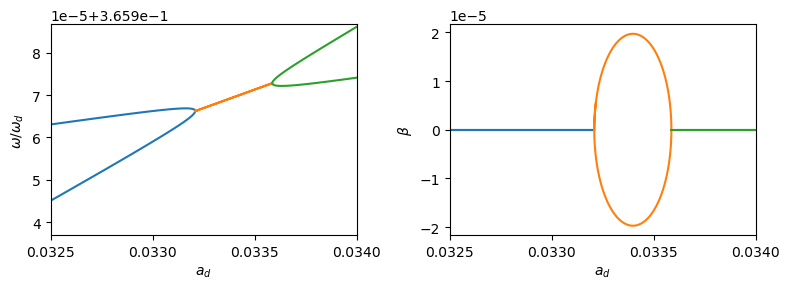

In [13]:
plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)

plt.plot(pars,np.real(omegas)/(2*np.pi*argsdict['freq']))
plt.plot(pars3,np.real(omegas3)/(2*np.pi*argsdict['freq']))
plt.plot(pars5,np.real(omegas5)/(2*np.pi*argsdict['freq']))

plt.xlabel('$a_d$')
plt.ylabel(r'$\omega/\omega_d$')
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1])
plt.ylim(3.6765/(2*np.pi*argsdict['freq']),3.677/(2*np.pi*argsdict['freq']))

plt.subplot(1,2,2)
plt.ylabel(r'$\beta$')
plt.plot(pars,np.imag(omegas))
plt.plot(pars3,np.imag(omegas3))
plt.plot(pars5,np.imag(omegas5))
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1])


plt.xlabel('$a_d$')
plt.tight_layout()
plt.savefig('anharmonic.pdf')

plt.show()

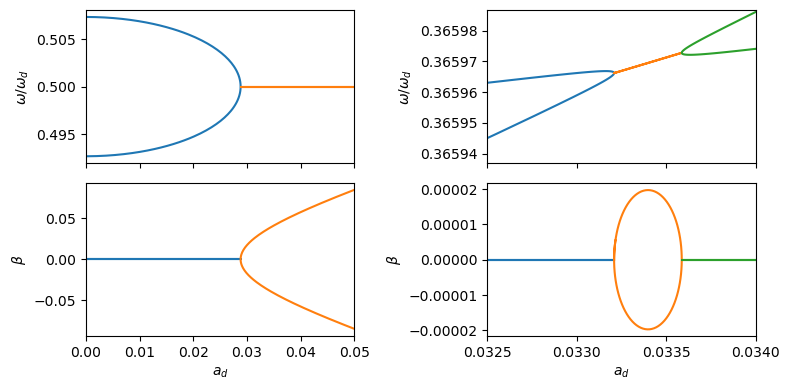

In [14]:
plt.subplots(2,2,figsize=(8,4))

plt.subplot(2,2,1)
plt.plot(spars,np.real(somegas)/(2*np.pi*1.3))
plt.plot(spars4,np.real(somegas4)/(2*np.pi*1.3))
# plt.xlabel('$a_d$')
plt.xlim(0,0.05)
plt.gca().set_xticks(plt.gca().get_xticks()[::1],labels=len(plt.gca().get_xticks()[::1])*[''])
plt.ylabel(r'$\omega/\omega_d$')

plt.subplot(2,2,2)

plt.plot(pars,np.real(omegas)/(2*np.pi*argsdict['freq']))
plt.plot(pars3,np.real(omegas3)/(2*np.pi*argsdict['freq']))
plt.plot(pars5,np.real(omegas5)/(2*np.pi*argsdict['freq']))

plt.ylabel(r'$\omega/\omega_d$')
plt.xlim(0.0325,0.034)
plt.gca().set_xticks(plt.gca().get_xticks()[::1],labels=len(plt.gca().get_xticks()[::1])*[''])
plt.ylim(3.6765/(2*np.pi*argsdict['freq']),3.677/(2*np.pi*argsdict['freq']))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


plt.subplot(2,2,3)
plt.ylabel(r'$\beta$')
plt.plot(spars,np.imag(somegas))
plt.plot(spars4,np.imag(somegas4))
plt.xlabel('$a_d$')
plt.xlim(0,0.05)

plt.subplot(2,2,4)
plt.ylabel(r'$\beta$')
plt.plot(pars,np.imag(omegas))
plt.plot(pars3,np.imag(omegas3))
plt.plot(pars5,np.imag(omegas5))
plt.xlim(0.0325,0.034)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.gca().set_xticks(plt.gca().get_xticks()[::1])


plt.xlabel('$a_d$')



plt.tight_layout()

plt.savefig('continuations.pdf')


## Continuation of subharmonic critical driving

### Inviscid instability boundary

In [15]:
imp.reload(viscid)
k0=kxs1[-4]
argsdict['ad']=0
argsdict['h0']=1.0
argsdict['As']=0.8
argsdict['kx']=k0
argsdict['ky']=0
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['dim']=2
argsdict['verbose']=1
argsdict['dsmin']=1E-12
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
eta=1E-2
lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)

def mat(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    return ((1+1j*eta*omega)*E.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F.reshape(shape))+ad*D.reshape(shape)).reshape((n_flat,n_flat)).T
def mat2(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    return D.T
def mat3(ad,argsdict):
    E,F,D=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    return 1j*eta*2*np.pi/2*E.reshape(shape).reshape((n_flat,n_flat)).T+(-2*(2*np.pi/2+ls*2*np.pi)*(omega+ls*argsdict['freq']*2*np.pi)*(F.reshape(shape))).reshape((n_flat,n_flat)).T


[1.29934426 1.65912792]


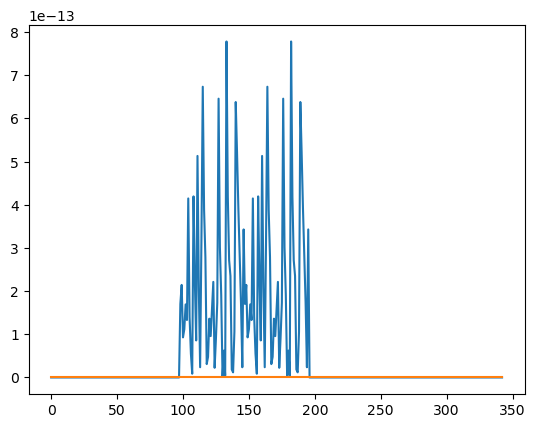

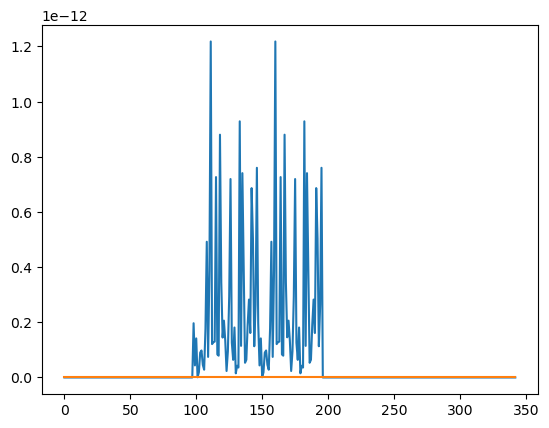

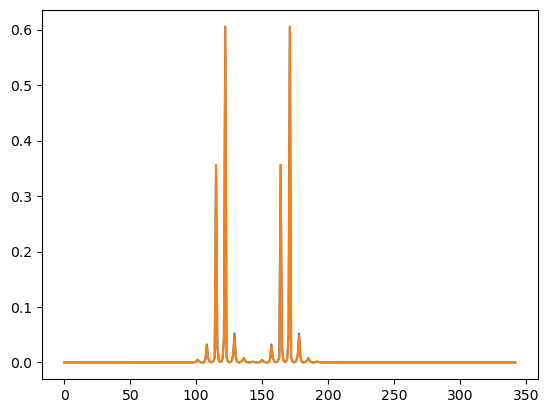

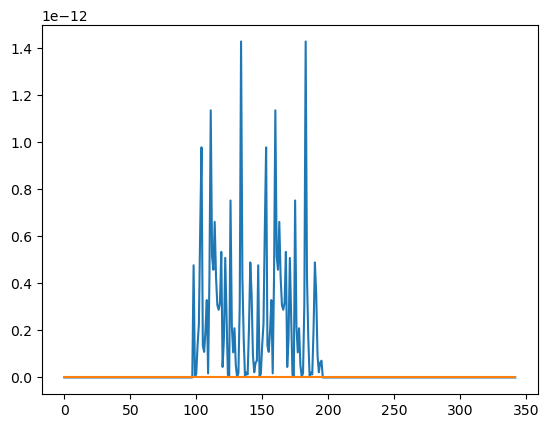

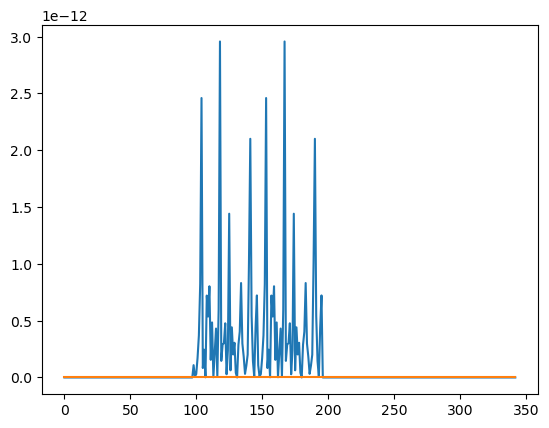

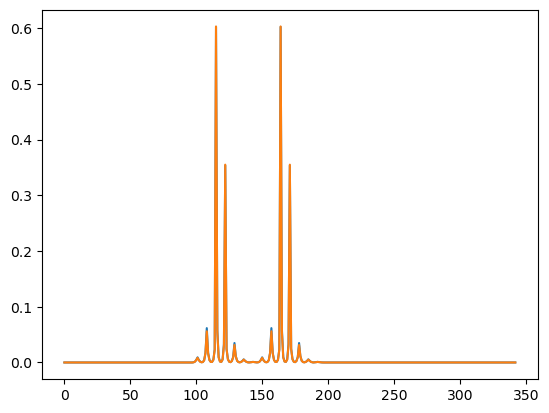

In [16]:
F,G=viscid.inviscid_mat_undriven(argsdict)
evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
order=np.argsort(np.real(evals))
freq0s=np.real(evals[order[:2]]**0.5/(2*np.pi/2))
print(freq0s)

ad0s=[]
vn0s=[]
wn0s=[]
for j in range(2):
    freq0=freq0s[j]
    argsdict['freq']=freq0
    v0=np.zeros((1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),dtype=np.complex128)
    w0=np.zeros((1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1),dtype=np.complex128)
    v0[0,argsdict['Nt']]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    v0[0,argsdict['Nt']-1]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    w0[0,argsdict['Nt']]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    w0[0,argsdict['Nt']-1]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))/2**0.5
    v0=v0.ravel()
    w0=w0.ravel()
    ad0=0
    E1,F1,D1=viscid.inviscid_mat(argsdict)
    shape=(1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,1,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1)
    n_flat=(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    omega=argsdict['freq']*2*np.pi/2
    E=(E1.reshape(shape)-(omega+ls*argsdict['freq']*2*np.pi)**2*(F1.reshape(shape))).reshape((n_flat,n_flat))
    F=(D1.reshape(shape)).reshape((n_flat,n_flat))

    ad0s=ad0s+[0]
    vn0s=vn0s+[v0]
    wn0s=wn0s+[w0]

    plt.plot(np.abs(E.T.dot(vn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.T.dot(vn0s[j])))
    plt.show()
    plt.plot(np.abs(E.dot(wn0s[j])))
    plt.plot(np.abs(ad0s[j]*F.dot(wn0s[j])))
    plt.show()
    plt.plot(np.abs(vn0s[j]))
    plt.plot(np.abs(wn0s[j]))
    plt.show()

[[0.14765485 0.        ]
 [0.15079645 0.        ]
 [0.15393804 0.        ]
 [0.15707963 0.        ]
 [0.15707963 0.0018138 ]
 [0.15707963 0.009069  ]
 [0.15707963 0.01632419]
 [0.15707963 0.02357939]
 [0.15707963 0.03083459]
 [0.15707963 0.03808979]
 [0.15707963 0.04534498]
 [0.15707963 0.05260018]
 [0.15707963 0.05985538]
 [0.15707963 0.06711058]
 [0.15707963 0.07436577]
 [0.15707963 0.08162097]
 [0.15707963 0.08887617]]
17


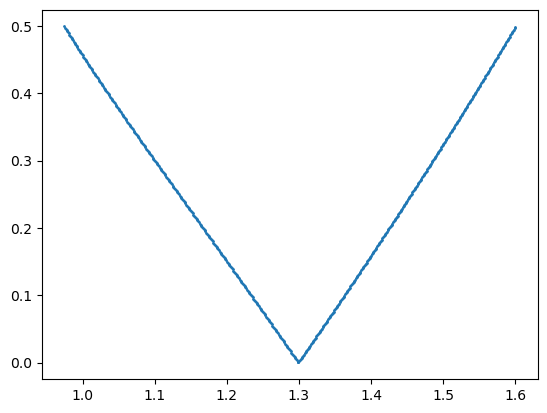

0.22314530701260082


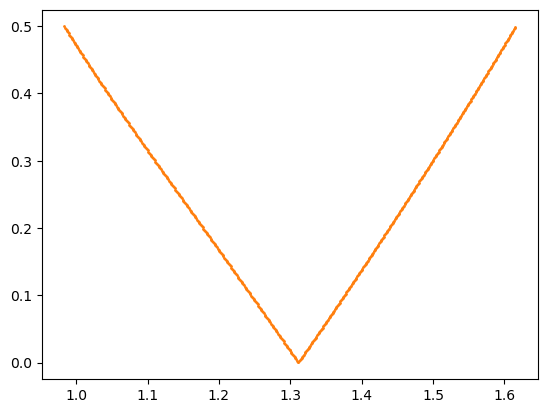

0.43774532299721614


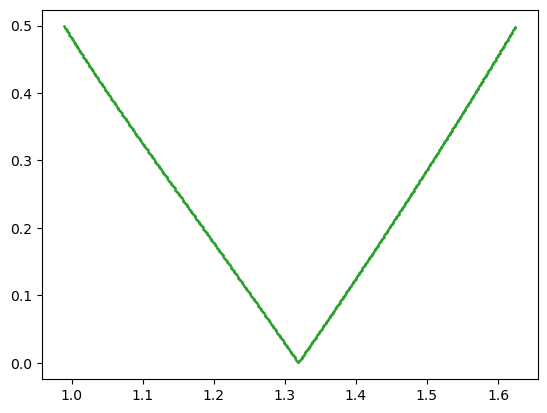

0.565189545013709


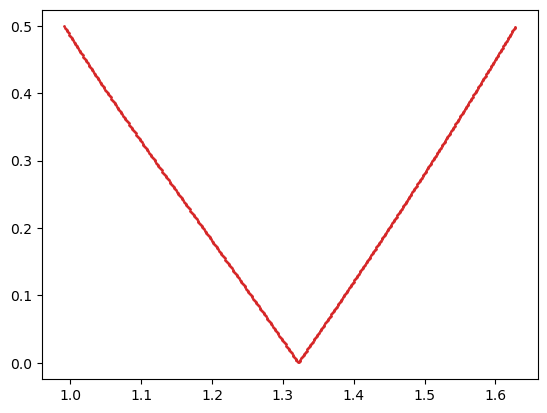

0.7023571460158564


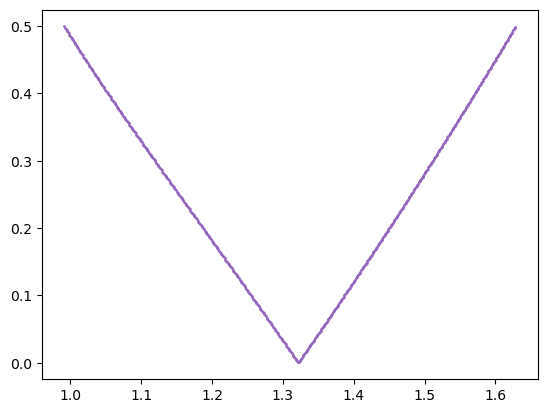

0.841120327997487


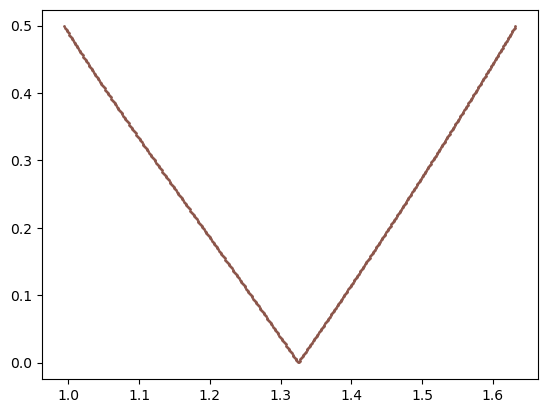

0.973258739017183


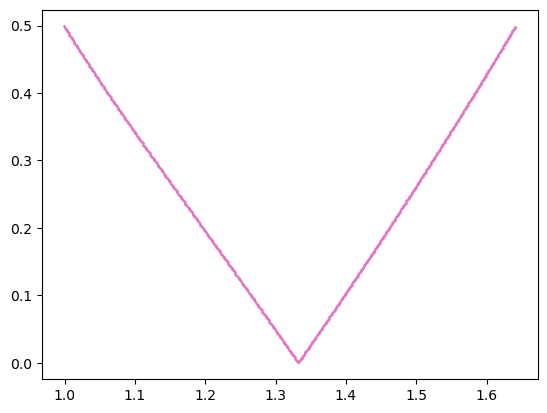

1.1025467370054685


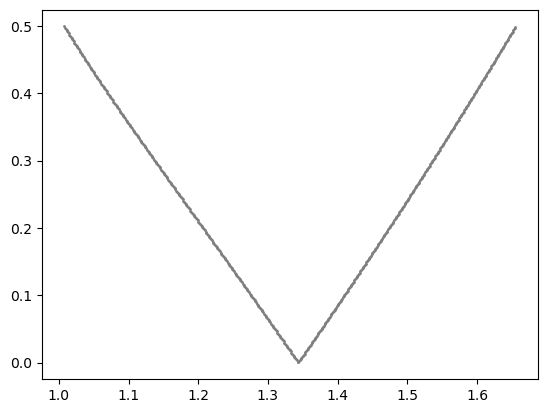

1.2333395669993479


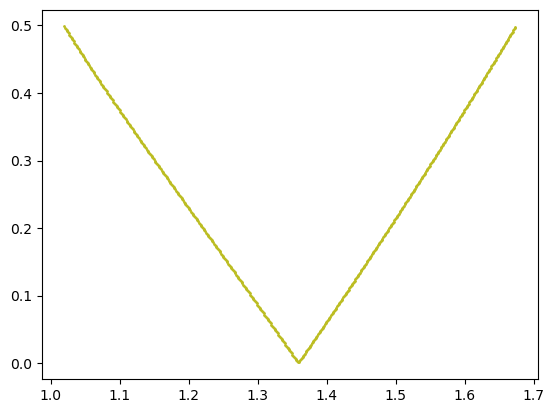

1.3674584380059969


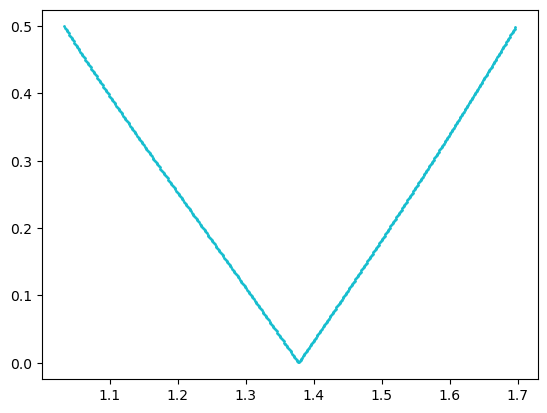

1.5028872800176032


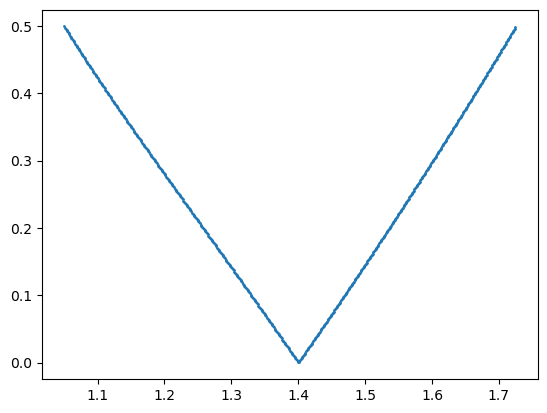

1.6504935270058922


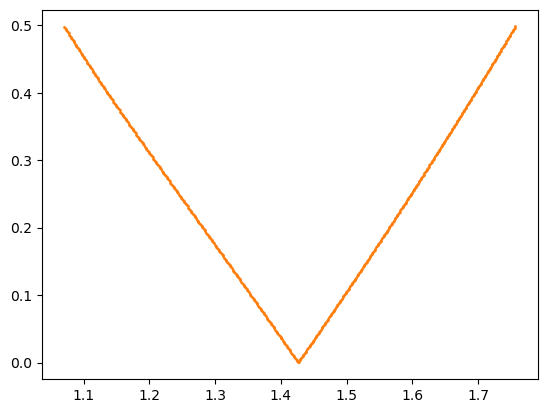

1.7827576080162544


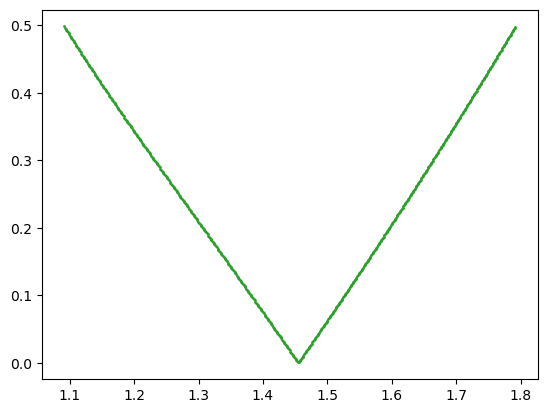

1.9260493399924599


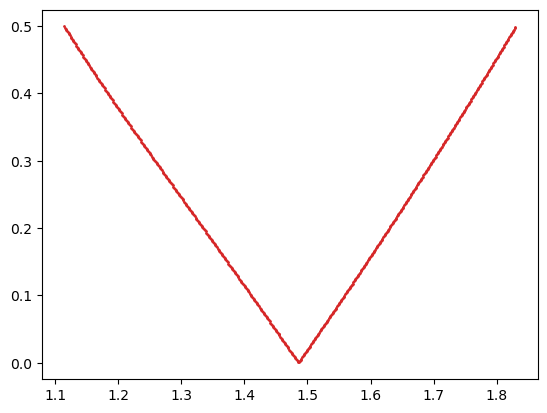

2.0619320920086466


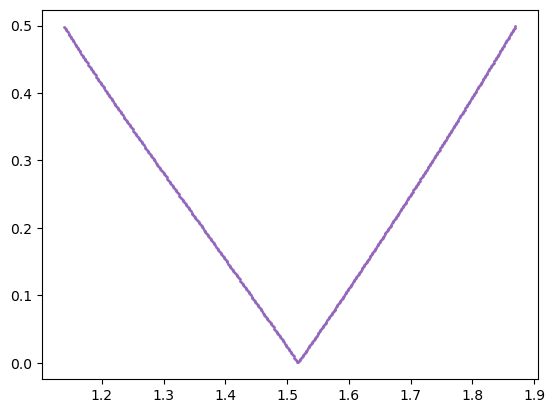

2.202145863993792


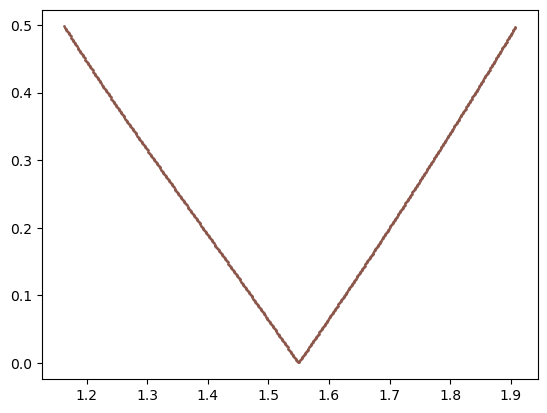

2.3414351120009087


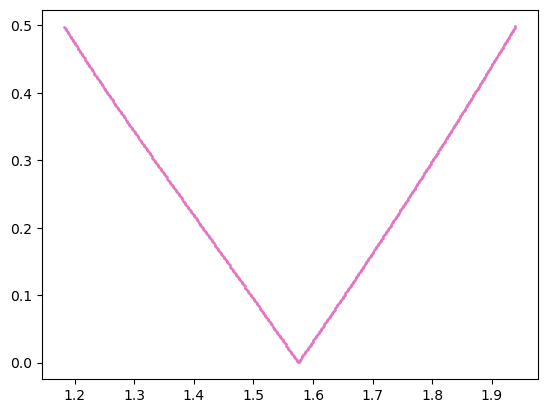

2.4773725290142465


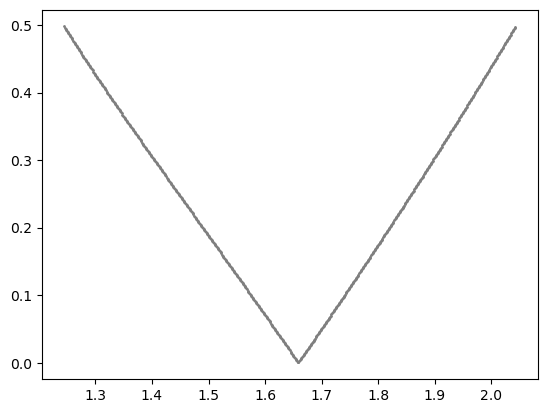

2.6905747650016565


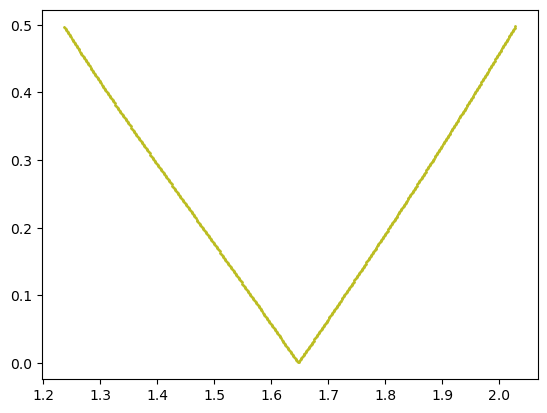

2.8238512050011195


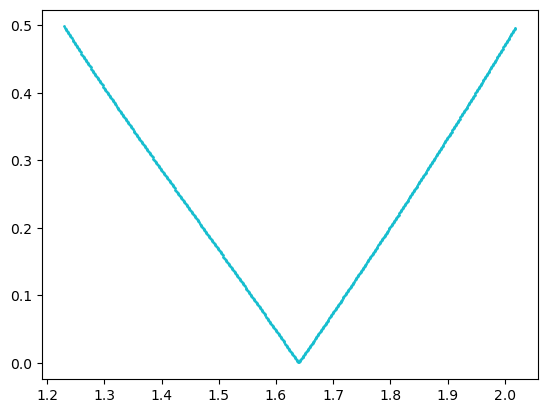

2.965706521004904


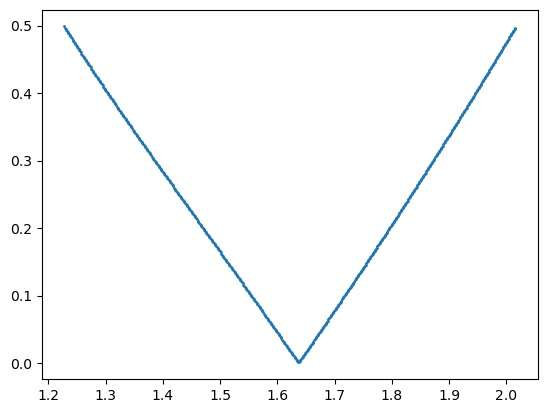

3.1081381060066633


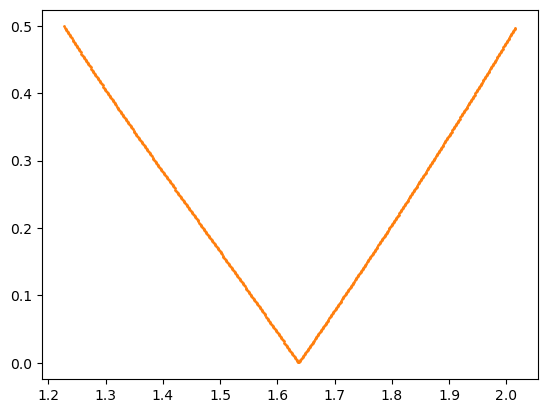

3.2425158900150564


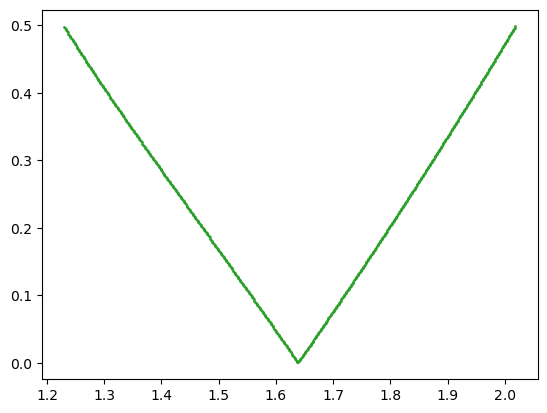

3.3781761339923833


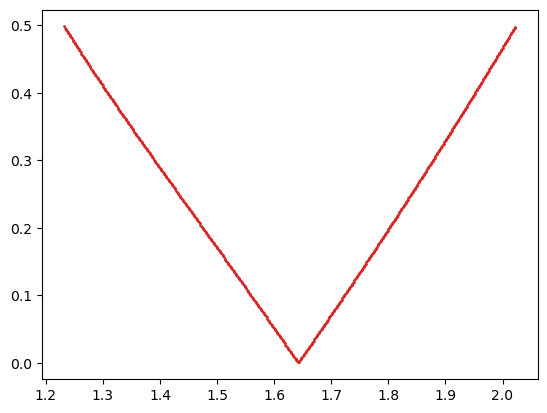

3.512797428003978


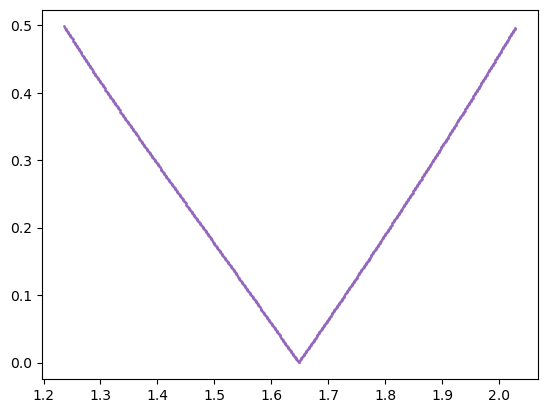

3.652980804006802


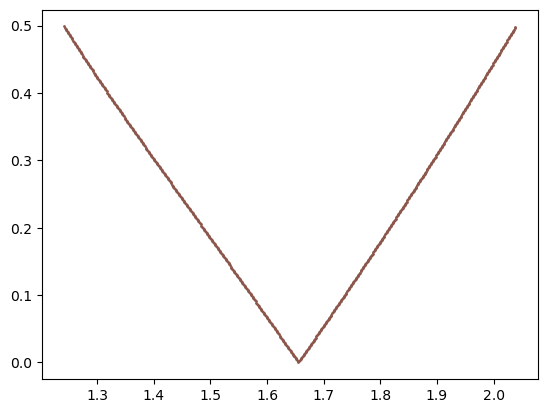

3.794903353002155


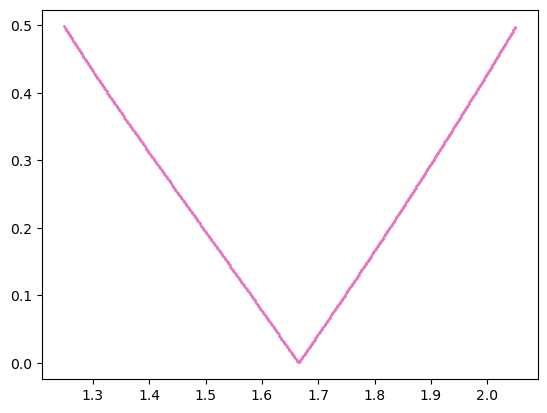

3.9293739850108977


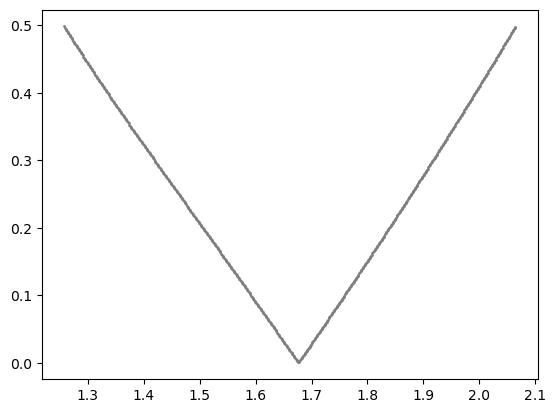

4.07007154499297


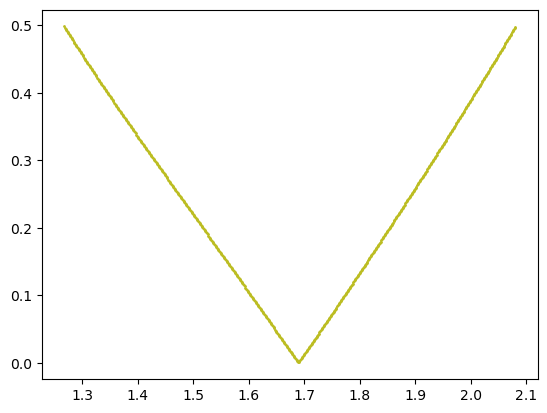

4.206101699004648


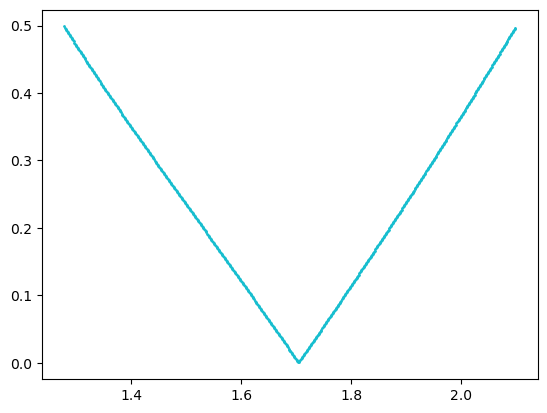

4.331379634997575


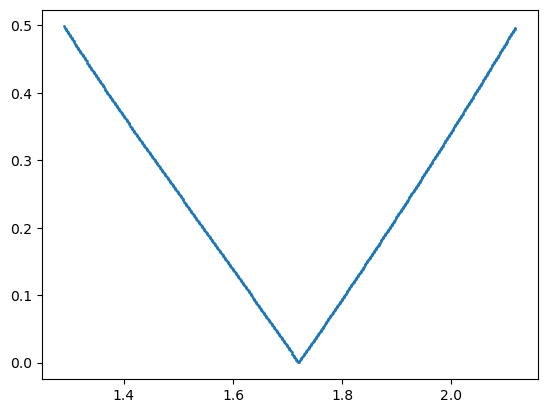

4.452904195000883


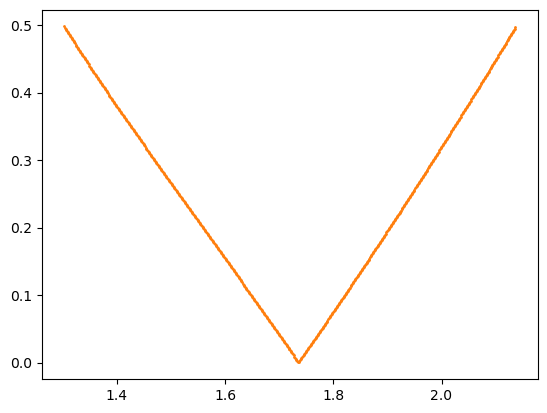

4.56821631101775


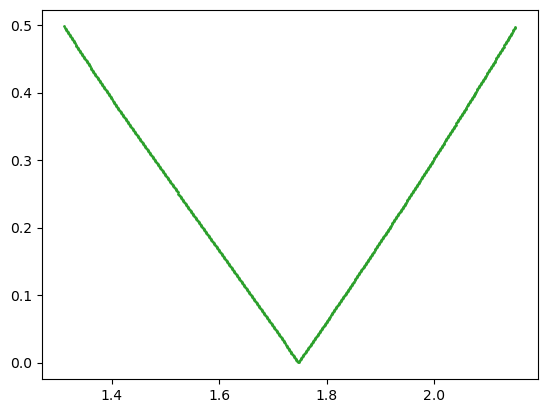

4.695130256994162


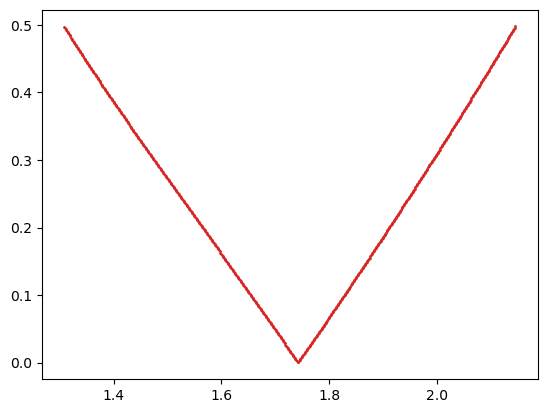

4.809982716018567


In [17]:
imp.reload(viscid)
start=timeit.default_timer()
iadssweep=[]
ifreqsweep=[]
ivssweep=[]
iwssweep=[]
idirsweep=[]
idssweep=[]
argsdict['verbose']=0
ds=2E-3
argsdict['lambdamax']=0.5
argsdict['dsmax']=ds
argsdict['ds']=ds
argsdict['dsmin']=1E-6
argsdict['epsl']=1E-6
argsdict['epsu']=1E-6
argsdict['epstp']=np.inf
argsdict['epdir']=1E-2
argsdict['Nsteps']=500
overwrite=False
load=True

ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])
# argsdict['verbose']=1
# ks=ks[:1]
print(ks)
print(len(ks))

l=0
for j in range(2):
    freq0=freq0s[j]
   
    argsdict['freq']=freq0
    argsdict['kx']=ks[0][0]
    argsdict['ky']=ks[0][1]
    
    ads,vs,ws=viscid.rayleigh_mat(ad0s[j], vn0s[j], wn0s[j], mat, argsdict, mat2)
    ad0=ads[-1]
    vs0=vs[-1]
    ws0=ws[-1]

    for i in range(len(ks)):
        if not os.path.exists('data/bandgap/%iads.npy'%(l)) or not load:

            kx=ks[i][0]
            ky=ks[i][1]
            print(i,freq0,kx,ky)
    
            argsdict['freq']=freq0
            if(argsdict['kx']!=kx):
                argsdict['par']='kx'
                argsdict['pari']=np.min([kx,argsdict['kx']])
                argsdict['parf']=np.max([kx,argsdict['kx']])
                argsdict['ds']=np.sign(kx-argsdict['kx'])*1E-3
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['kx']=kx
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]
            if(argsdict['ky']!=ky):
                argsdict['par']='ky'
                argsdict['pari']=np.min([ky,argsdict['ky']])
                argsdict['parf']=np.max([ky,argsdict['ky']])
                argsdict['ds']=np.sign(ky-argsdict['ky'])*1E-3
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['ky']=ky
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]
    
            argsdict['freq']=freq0
            argsdict['par']='freq'
            argsdict['pari']=freq0-0.3
            argsdict['parf']=freq0+0.3
            argsdict['ds']=ds
            ads2,vs2,ws2,pars2,dirs2,dss2=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2, mat3)
            argsdict['freq']=freq0
            argsdict['ds']=-ds
            ads3,vs3,ws3,pars3,dirs3,dss3=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2, mat3)
    
            ifreqsweep=ifreqsweep+[np.flip(pars3).tolist()+pars2]
            iadssweep=iadssweep+[np.flip(ads3).tolist()+ads2]
            ivssweep=ivssweep+[np.flip(vs3,axis=0).tolist()+vs2]
            iwssweep=iwssweep+[np.flip(ws3,axis=0).tolist()+ws2]
            idirsweep=idirsweep+[np.flip(dirs3,axis=0).tolist()+dirs2]
            idssweep=idssweep+[np.flip(dss3,axis=0).tolist()+dss2]
    
            ind=np.argmin(np.abs(iadssweep[-1]))
            ad0=iadssweep[-1][ind]
            vs0=np.array(ivssweep[-1][ind])
            ws0=np.array(iwssweep[-1][ind])
            freq0=ifreqsweep[-1][ind]
            print(ifreqsweep[-1][0],ifreqsweep[-1][-1],freq0,ad0)

            if overwrite:
                np.save('data/bandgap/i%iads.npy'%(l),iadssweep[l])
                np.save('data/bandgap/i%ivs.npy'%(l),ivssweep[l])
                np.save('data/bandgap/i%iws.npy'%(l),iwssweep[l])
                np.save('data/bandgap/i%ifreqs.npy'%(l),ifreqsweep[l])
                np.save('data/bandgap/i%idirs.npy'%(l),idirsweep[l])
                np.save('data/bandgap/i%idss.npy'%(l),idssweep[l])
        else:
            iadssweep=iadssweep+[np.load('data/bandgap/i%iads.npy'%(l))]
            ivssweep=ivssweep+[np.load('data/bandgap/i%ivs.npy'%(l))]
            iwssweep=iwssweep+[np.load('data/bandgap/i%iws.npy'%(l))]
            ifreqsweep=ifreqsweep+[np.load('data/bandgap/i%ifreqs.npy'%(l))]
            idirsweep=idirsweep+[np.load('data/bandgap/i%idirs.npy'%(l))]
            idssweep=idssweep+[np.load('data/bandgap/i%idss.npy'%(l))]
            
        plt.plot(ifreqsweep[l],np.abs(np.real(iadssweep[l])),c=colors[l%len(colors)],lw=0.5)
        plt.scatter(ifreqsweep[l],np.abs(np.real(iadssweep[l])),c=colors[l%len(colors)],s=1)
        plt.show()
        l=l+1

        stop=timeit.default_timer()
        print(stop-start)

### Viscid instability boundary

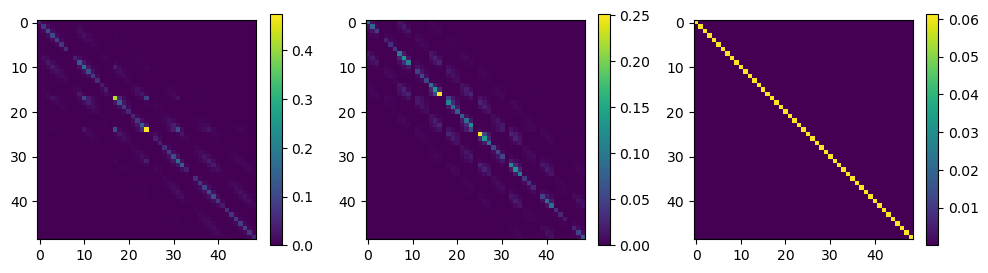

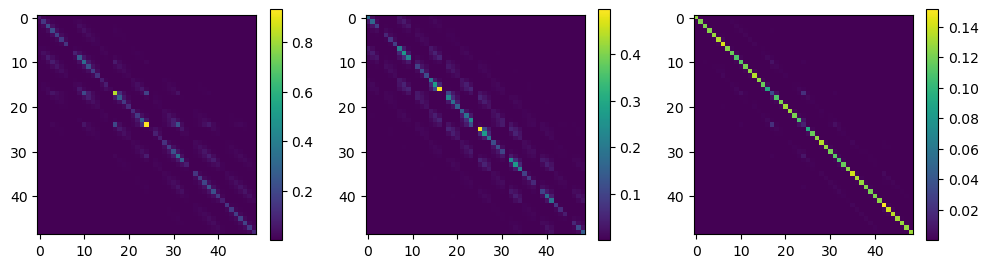

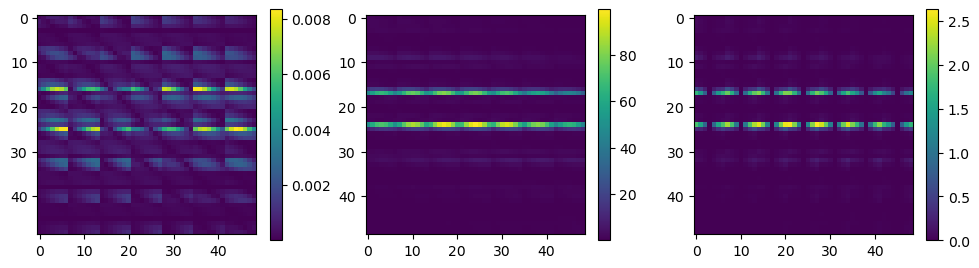

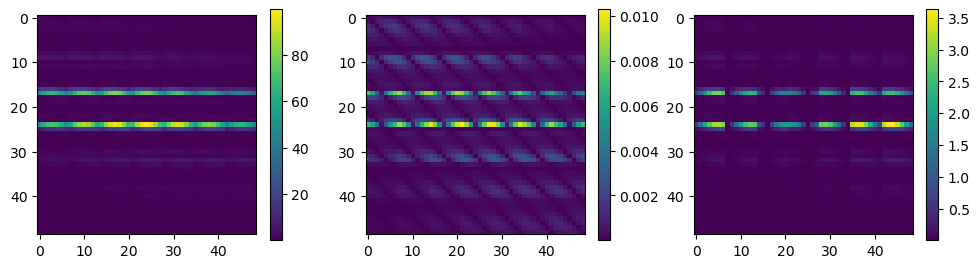

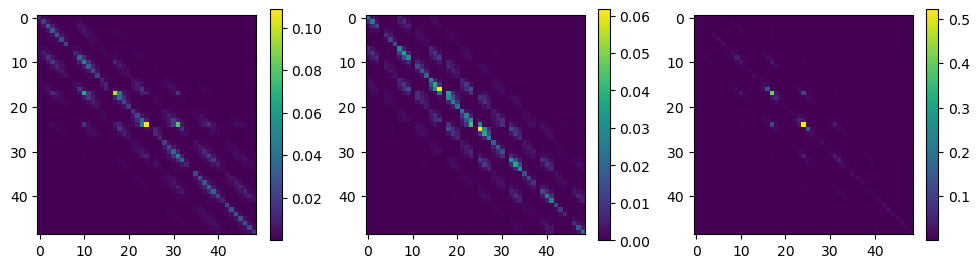

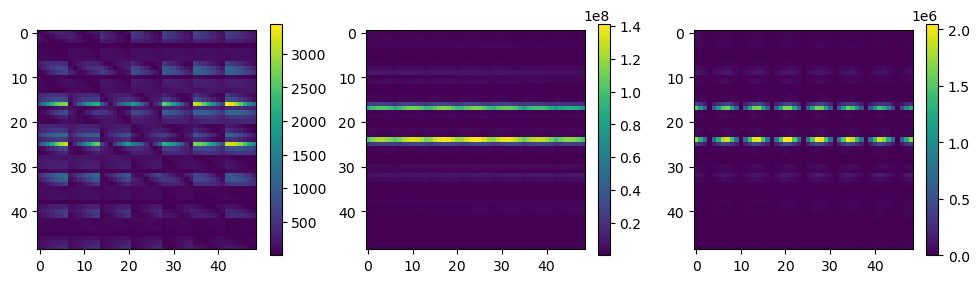

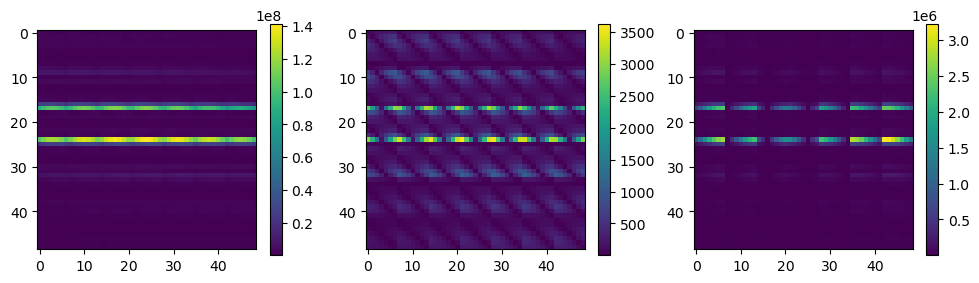

In [18]:
imp.reload(viscid)
argsdict=viscid.argsdict
k0=kxs1[-4]
argsdict['ad']=0
argsdict['h0']=1.0
argsdict['As']=0.8
argsdict['kx']=k0
argsdict['ky']=0
argsdict['Nx']=3
argsdict['Ny']=3
argsdict['Nt']=3
argsdict['dim']=2
argsdict['verbose']=1
argsdict['dsmin']=1E-4


def mat0(omega,argsdict):
        E,F=viscid.viscid_mat2d(omega,argsdict)
        shape=E.shape
        E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
        F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

        return (np.tensordot(E_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])-argsdict['ad']*np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T
def mat3(omega,argsdict):
        E,F=viscid.viscid_mat2d(omega,argsdict)
        shape=E.shape
        E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
        F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

        return (-np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T

def mat(ad,argsdict):
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)
    shape=E.shape
    E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

    return (np.tensordot(E_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])-ad*np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T
def mat2(ad,argsdict):
    E,F=viscid.viscid_mat2d(2*np.pi*argsdict['freq']/2,argsdict)
    shape=E.shape
    E_shaped=E.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    F_shaped=F.reshape((3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1,3,2*argsdict['Nt']+1,2*argsdict['Nx']+1,2*argsdict['Ny']+1))

    return (-np.tensordot(F_shaped,argsdict['preconditioner'],axes=argsdict['precondition_axes'])).transpose(argsdict['precondition_order']).reshape(shape).T

argsdict['kx']=k0
argsdict['ky']=0
ad=0.0

lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
kappa = (kappax**2+kappay**2)**0.5
kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
#right preconditioner
shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
# A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)*Ctilde[:,:,:,:,:,argsdict['Nt']:argsdict['Nt']+1])
A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

argsdict['precondition_axes']=((6,7),(0,1))
argsdict['precondition_order']=(0,1,2,3,4,5,6,7)

lp=argsdict['Nt']
test=mat2(ad,argsdict).reshape((3,7,7,7,3,7,7,7))
plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[2,lp,:,:,0,lp+1,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[2,lp,:,:,1,lp+1,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[2,lp,:,:,2,lp+1,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

lp=argsdict['Nt']
test=mat(ad,argsdict).reshape((3,7,7,7,3,7,7,7))

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[2,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[2,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[2,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[1,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[1,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[1,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[0,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[0,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[0,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()


lp=0
test=mat(ad,argsdict).reshape((3,7,7,7,3,7,7,7))

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[2,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[2,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[2,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[1,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[1,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[1,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(np.abs(test[0,lp,:,:,0,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(test[0,lp,:,:,1,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(test[0,lp,:,:,2,lp,:,:].reshape((49,49))))
plt.colorbar()
plt.show()


In [19]:
imp.reload(viscid)
freq0s=[1.3,1.65]

F,G=viscid.inviscid_mat_undriven(argsdict)
evals,revecs,levecs=eig(F.astype(complex),G.astype(complex),right=True,left=True)
order=np.argsort(evals)

argsdict['verbose']=1
argsdict['lambdamax']=np.inf
argsdict['ds']=1E-3
argsdict['dsmax']=1E-2
argsdict['dsmin']=1E-8
argsdict['epsl']=1E-4
argsdict['epsu']=1E-3

ads01=[]
ads02=[]
ads03=[]
vs01=[]
vs02=[]
vs03=[]
ws01=[]
ws02=[]
ws03=[]
omegas01=[]
omegas02=[]
omegas03=[]

start=timeit.default_timer()
for j in range(2):
    omega=evals[order[j]]**0.5+1j*0
    E,F=viscid.viscid_mat2d(omega,argsdict)
    
    v=np.zeros((3,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1)),np.complex128)
    w=np.zeros((3,(2*argsdict['Nt']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1)),np.complex128)
    v[2,argsdict['Nt']]=revecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    w[2,argsdict['Nt']]=levecs[:,order[j]].reshape((2*argsdict['Nx']+1,2*argsdict['Ny']+1))
    v=v.ravel()
    w=w.ravel()
    
    freq0=freq0s[j]
    omega=evals[order[j]]**0.5+1j*0
    argsdict['freq']=freq0
    argsdict['ad']=0
    
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
    kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
    kappa = (kappax**2+kappay**2)**0.5
    kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
    kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
    S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
    C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))

    #right preconditioner
    shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
    shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
    A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
    argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

    argsdict['precondition_axes']=((6,7),(0,1))
    argsdict['precondition_order']=(0,1,2,3,4,5,6,7)


    #starting frequency and driving
    omegas,vs,ws=viscid.rayleigh_mat(omega,v,np.conjugate(w),mat0,argsdict)
    omega0=omegas[-1]
    v0=vs[-1]
    w0=ws[-1]
    argsdict['par']='ad'
    argsdict['pari']=0
    argsdict['parf']=0.2
    omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omega0,v0,w0,mat0,argsdict,mat3=mat3)
    omegas01=omegas01+[omegas]
    vs01=vs01+[vs]
    ws01=ws01+[ws]
    ads01=ads01+[pars]
    
    ind=np.argmax(pars)
    fomega=interp1d(np.arange(len(omegas)),omegas,kind='cubic')
    fv=interp1d(np.arange(len(omegas)),np.array(vs).T,kind='cubic')
    fw=interp1d(np.arange(len(omegas)),np.array(ws).T,kind='cubic')
    fpar=interp1d(np.arange(len(omegas)),pars,kind='cubic')
    fdir=interp1d(np.arange(len(omegas)),np.array(dirs).T,kind='cubic')

    if pars[ind-2]<pars[ind] and pars[ind+2]<pars[ind]:
        find=minimize_scalar(lambda x: -fpar(x),bracket=(ind-1,ind+1)).x
    else:
        find=minimize_scalar(lambda x: fpar(x),bracket=(ind-1,ind+1)).x

    omega0=complex(fomega(find))
    v0=fv(find)
    w0=fw(find)
    dir0=fdir(find)
    s=3*(2*argsdict['Nt']+1)*(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1)
    newdir=np.zeros(dir0.shape)
    newdir[:s]=dir0[s:2*s]
    newdir[s:2*s]=-dir0[:s]
    newdir[2*s]=dir0[2*s+1]
    newdir[2*s+1]=-dir0[2*s]
    newdir[2*s+2]=2*dir0[2*s+2]
    dir0=newdir
    argsdict['ad']=fpar(find)
    print(ind,argsdict['ad'],omega0)
    omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omega0,v0,w0,mat0,argsdict,mat3=mat3,dir=dir0)
    omegas02=omegas02+[omegas]
    vs02=vs02+[vs]
    ws02=ws02+[ws]
    ads02=ads02+[pars]
    argsdict['ds']=-argsdict['ds']
    argsdict['ad']=fpar(find)
    omegas,vs,ws,pars,dirs,dss=viscid.pseudocont(omega0,v0,w0,mat0,argsdict,mat3=mat3,dir=dir0)
    argsdict['ds']=-argsdict['ds']
    omegas03=omegas03+[omegas]
    vs03=vs03+[vs]
    ws03=ws03+[ws]
    ads03=ads03+[pars]
    
stop=timeit.default_timer()
print(stop-start)

n=0 dv=4.525703e-03 dw=5.980442e-01 dl=9.133157e-05
n=1 dv=1.086476e-03 dw=4.651518e-03 dl=2.927251e-02
n=2 dv=1.899215e-04 dw=7.790359e-04 dl=9.359597e-04
n=3 dv=2.626652e-06 dw=6.687471e-06 dl=4.672271e-05
newdir=(0.000,0.000,0.989)
step=0 ds=1.000000e-03 ad=0.000000 lambda=3.979427+i0.110639 dir=(0.000, 0.000, 0.989)
pre dv=2.127e-03 dlambda=0.000e+00 dmu=9.882e-04 ad=0.000989 lr=3.979427 li=0.110639 mstp=-2.220e-16
n=0 dv=4.926e-06 dlambda=9.324e-07 dmu=4.896e-10 ad=0.000989 lr=3.979432 li=0.110639 mstp=1.084e-05
deltadir=-1.112e-05 stp=(0.005,0.000,0.989) newdir=(0.009, 0.000, 0.989)
ds=1.000e-03 ad=0.000989 lambda=3.979432+0.110639i stp=(0.005,0.000,0.989) mstp=1.084e-05
step=1 ds=1.000000e-03 ad=0.000989 lambda=3.979432+i0.110639 dir=(0.009, 0.000, 0.989)
pre dv=2.127e-03 dlambda=1.877e-06 dmu=9.872e-04 ad=0.001978 lr=3.979441 li=0.110639 mstp=-1.110e-16
n=0 dv=4.925e-06 dlambda=9.413e-07 dmu=4.477e-08 ad=0.001978 lr=3.979446 li=0.110639 mstp=1.105e-05
deltadir=-1.091e-05 stp=(0

n=0 dv=1.071e-03 dlambda=1.341e-04 dmu=6.068e-04 ad=0.082875 lr=4.020138 li=0.110648 mstp=4.444e-03
n=1 dv=5.845e-06 dlambda=2.335e-07 dmu=2.965e-07 ad=0.082875 lr=4.020139 li=0.110648 mstp=4.449e-03
deltadir=-1.103e-03 stp=(0.753,0.000,0.641) newdir=(0.782, 0.000, 0.604)
ds=1.000e-02 ad=0.082875 lambda=4.020139+0.110648i stp=(0.756,0.000,0.644) mstp=4.449e-03
step=17 ds=1.000000e-02 ad=0.082875 lambda=4.020139+i0.110648 dir=(0.753, 0.000, 0.641)
pre dv=2.097e-02 dlambda=1.497e-03 dmu=5.882e-03 ad=0.089283 lr=4.027669 li=0.110650 mstp=-2.220e-16
n=0 dv=1.075e-03 dlambda=1.208e-04 dmu=6.590e-04 ad=0.088565 lr=4.028276 li=0.110649 mstp=4.435e-03
n=1 dv=3.114e-06 dlambda=1.468e-07 dmu=2.858e-07 ad=0.088565 lr=4.028277 li=0.110649 mstp=4.437e-03
deltadir=-1.109e-03 stp=(0.810,0.000,0.567) newdir=(0.836, 0.000, 0.527)
ds=1.000e-02 ad=0.088565 lambda=4.028277+0.110649i stp=(0.814,0.000,0.569) mstp=4.437e-03
step=18 ds=1.000000e-02 ad=0.088565 lambda=4.028277+i0.110649 dir=(0.810, 0.000, 0.56

pre dv=2.019e-02 dlambda=1.555e-03 dmu=5.372e-03 ad=0.076165 lr=4.157207 li=0.110646 mstp=-1.110e-16
n=0 dv=9.689e-04 dlambda=1.068e-04 dmu=7.091e-04 ad=0.075403 lr=4.156656 li=0.110646 mstp=4.441e-03
n=1 dv=2.671e-06 dlambda=1.989e-07 dmu=7.109e-07 ad=0.075402 lr=4.156657 li=0.110646 mstp=4.440e-03
deltadir=-1.106e-03 stp=(0.744,-0.000,-0.652) newdir=(0.712, -0.000, -0.686)
ds=1.000e-02 ad=0.075402 lambda=4.156657+0.110646i stp=(0.747,-0.000,-0.654) mstp=4.440e-03
step=32 ds=1.000000e-02 ad=0.075402 lambda=4.156657+i0.110646 dir=(0.744, -0.000, -0.652)
pre dv=2.041e-02 dlambda=1.440e-03 dmu=6.095e-03 ad=0.068887 lr=4.164094 li=0.110645 mstp=-1.110e-16
n=0 dv=9.756e-04 dlambda=1.202e-04 dmu=6.624e-04 ad=0.068179 lr=4.163473 li=0.110645 mstp=4.448e-03
n=1 dv=9.205e-06 dlambda=1.533e-07 dmu=4.594e-07 ad=0.068179 lr=4.163474 li=0.110645 mstp=4.446e-03
deltadir=-1.101e-03 stp=(0.679,-0.000,-0.719) newdir=(0.644, -0.000, -0.750)
ds=1.000e-02 ad=0.068179 lambda=4.163474+0.110645i stp=(0.682,

pre dv=6.038e-03 dlambda=6.535e-04 dmu=2.689e-04 ad=0.105414 lr=4.084069 li=0.097939 mstp=-2.220e-16
n=0 dv=6.112e-05 dlambda=1.132e-06 dmu=4.640e-05 ad=0.105465 lr=4.084071 li=0.097944 mstp=1.180e-04
deltadir=-1.166e-04 stp=(-0.001,-0.983,0.103) newdir=(0.001, -0.982, 0.118)
ds=3.375e-03 ad=0.105465 lambda=4.084071+0.097944i stp=(-0.001,-0.983,0.103) mstp=1.180e-04
step=7 ds=3.375000e-03 ad=0.105465 lambda=4.084071+i0.097944 dir=(0.001, -0.982, 0.118)
pre dv=5.979e-03 dlambda=6.515e-04 dmu=3.612e-04 ad=0.105865 lr=4.084074 li=0.094631 mstp=2.220e-16
n=0 dv=6.044e-05 dlambda=1.160e-06 dmu=4.623e-05 ad=0.105916 lr=4.084072 li=0.094637 mstp=1.172e-04
deltadir=-1.107e-04 stp=(0.000,-0.980,0.133) newdir=(-0.001, -0.978, 0.148)
ds=5.063e-03 ad=0.105916 lambda=4.084072+0.094637i stp=(0.000,-0.980,0.133) mstp=1.172e-04
step=8 ds=5.062500e-03 ad=0.105916 lambda=4.084072+i0.094637 dir=(-0.001, -0.978, 0.148)
pre dv=8.859e-03 dlambda=9.736e-04 dmu=6.775e-04 ad=0.106666 lr=4.084068 li=0.089686 ms

deltadir=-1.701e-05 stp=(0.000,-0.784,0.618) newdir=(-0.000, -0.781, 0.623)
ds=1.000e-02 ad=0.172547 lambda=4.084070+-0.026295i stp=(0.000,-0.784,0.618) mstp=1.776e-05
step=23 ds=1.000000e-02 ad=0.172547 lambda=4.084070+i-0.026295 dir=(-0.000, -0.781, 0.623)
pre dv=5.460e-03 dlambda=1.536e-03 dmu=5.283e-03 ad=0.178774 lr=4.084069 li=-0.034105 mstp=0.000e+00
n=0 dv=2.053e-04 dlambda=5.925e-06 dmu=3.186e-05 ad=0.178812 lr=4.084071 li=-0.034075 mstp=1.309e-05
deltadir=-1.389e-05 stp=(0.000,-0.778,0.627) newdir=(-0.000, -0.775, 0.630)
ds=1.000e-02 ad=0.178812 lambda=4.084071+-0.034075i stp=(0.000,-0.778,0.626) mstp=1.309e-05
step=24 ds=1.000000e-02 ad=0.178812 lambda=4.084071+i-0.034075 dir=(-0.000, -0.775, 0.630)
pre dv=5.068e-03 dlambda=1.524e-03 dmu=5.320e-03 ad=0.185116 lr=4.084070 li=-0.041826 mstp=0.000e+00
n=0 dv=1.843e-04 dlambda=5.171e-06 dmu=2.685e-05 ad=0.185148 lr=4.084071 li=-0.041800 mstp=9.725e-06
deltadir=-9.889e-06 stp=(-0.000,-0.772,0.634) newdir=(-0.000, -0.770, 0.637)
d

pre dv=1.434e-02 dlambda=1.816e-03 dmu=3.252e-03 ad=0.117497 lr=4.084070 li=0.164615 mstp=0.000e+00
n=0 dv=6.501e-04 dlambda=1.919e-05 dmu=2.355e-04 ad=0.117760 lr=4.084070 li=0.164518 mstp=4.091e-04
n=1 dv=3.551e-06 dlambda=3.709e-07 dmu=1.771e-07 ad=0.117760 lr=4.084071 li=0.164519 mstp=4.078e-04
deltadir=-3.698e-04 stp=(-0.000,-0.914,-0.390) newdir=(-0.000, -0.903, -0.414)
ds=-1.000e-02 ad=0.117760 lambda=4.084071+0.164519i stp=(-0.000,-0.914,-0.390) mstp=4.078e-04
step=13 ds=-1.000000e-02 ad=0.117760 lambda=4.084071+i0.164519 dir=(-0.000, -0.903, -0.414)
pre dv=1.313e-02 dlambda=1.776e-03 dmu=3.691e-03 ad=0.121902 lr=4.084072 li=0.173554 mstp=0.000e+00
n=0 dv=6.198e-04 dlambda=1.829e-05 dmu=1.922e-04 ad=0.122117 lr=4.084071 li=0.173461 mstp=2.895e-04
n=1 dv=4.848e-06 dlambda=1.254e-07 dmu=1.133e-07 ad=0.122117 lr=4.084070 li=0.173461 mstp=2.887e-04
deltadir=-2.637e-04 stp=(0.000,-0.894,-0.436) newdir=(-0.001, -0.884, -0.456)
ds=-1.000e-02 ad=0.122117 lambda=4.084070+0.173461i stp=(

n=0 dv=2.955e-05 dlambda=2.244e-06 dmu=1.598e-08 ad=0.000933 lr=5.131138 li=0.085864 mstp=9.670e-05
deltadir=-9.651e-05 stp=(0.014,-0.000,0.933) newdir=(0.027, 0.000, 0.933)
ds=1.000e-03 ad=0.000933 lambda=5.131138+0.085864i stp=(0.014,-0.000,0.933) mstp=9.670e-05
step=1 ds=1.000000e-03 ad=0.000933 lambda=5.131138+i0.085864 dir=(0.027, 0.000, 0.933)
pre dv=5.205e-03 dlambda=4.484e-06 dmu=9.312e-04 ad=0.001866 lr=5.131165 li=0.085864 mstp=0.000e+00
n=0 dv=2.956e-05 dlambda=2.242e-06 dmu=4.012e-07 ad=0.001866 lr=5.131179 li=0.085864 mstp=9.667e-05
deltadir=-9.618e-05 stp=(0.041,0.000,0.932) newdir=(0.055, 0.000, 0.932)
ds=1.500e-03 ad=0.001866 lambda=5.131179+0.085864i stp=(0.041,0.000,0.933) mstp=9.667e-05
step=2 ds=1.500000e-03 ad=0.001866 lambda=5.131179+i0.085864 dir=(0.055, 0.000, 0.932)
pre dv=7.805e-03 dlambda=1.344e-05 dmu=1.393e-03 ad=0.003264 lr=5.131261 li=0.085864 mstp=0.000e+00
n=0 dv=6.637e-05 dlambda=5.019e-06 dmu=1.775e-06 ad=0.003262 lr=5.131292 li=0.085864 mstp=2.159e-0

deltadir=-2.699e-03 stp=(0.935,0.001,-0.200) newdir=(0.916, 0.000, -0.270)
ds=1.000e-02 ad=0.038133 lambda=5.202246+0.085865i stp=(0.944,0.001,-0.202) mstp=1.023e-02
step=17 ds=1.000000e-02 ad=0.038133 lambda=5.202246+i0.085865 dir=(0.935, 0.001, -0.200)
pre dv=3.594e-02 dlambda=1.504e-03 dmu=1.932e-03 ad=0.036131 lr=5.211591 li=0.085873 mstp=0.000e+00
n=0 dv=3.687e-03 dlambda=5.674e-05 dmu=1.395e-03 ad=0.034688 lr=5.211239 li=0.085865 mstp=1.143e-02
n=1 dv=6.856e-05 dlambda=2.301e-06 dmu=6.685e-06 ad=0.034681 lr=5.211253 li=0.085865 mstp=1.147e-02
deltadir=-3.173e-03 stp=(0.891,-0.000,-0.341) newdir=(0.858, -0.000, -0.413)
ds=1.000e-02 ad=0.034681 lambda=5.211253+0.085865i stp=(0.901,-0.000,-0.345) mstp=1.147e-02
step=18 ds=1.000000e-02 ad=0.034681 lambda=5.211253+i0.085865 dir=(0.891, -0.000, -0.341)
pre dv=3.841e-02 dlambda=1.432e-03 dmu=3.309e-03 ad=0.031269 lr=5.220159 li=0.085864 mstp=0.000e+00
n=0 dv=4.008e-03 dlambda=1.026e-04 dmu=1.460e-03 ad=0.029765 lr=5.219520 li=0.085864 m

deltadir=-3.263e-04 stp=(-0.000,-0.929,0.285) newdir=(-0.000, -0.923, 0.308)
ds=1.000e-02 ad=0.045146 lambda=5.183628+0.060943i stp=(-0.000,-0.929,0.285) mstp=3.524e-04
step=10 ds=1.000000e-02 ad=0.045146 lambda=5.183628+i0.060943 dir=(-0.000, -0.923, 0.308)
pre dv=2.711e-02 dlambda=1.493e-03 dmu=2.935e-03 ad=0.048222 lr=5.183628 li=0.051708 mstp=2.220e-16
n=0 dv=2.272e-03 dlambda=1.449e-05 dmu=3.775e-04 ad=0.048618 lr=5.183628 li=0.051798 mstp=1.007e-03
n=1 dv=4.464e-06 dlambda=2.824e-07 dmu=6.654e-07 ad=0.048619 lr=5.183628 li=0.051796 mstp=1.008e-03
deltadir=-8.504e-04 stp=(0.000,-0.914,0.347) newdir=(0.000, -0.904, 0.382)
ds=1.000e-02 ad=0.048619 lambda=5.183628+0.051796i stp=(0.000,-0.915,0.347) mstp=1.008e-03
step=11 ds=1.000000e-02 ad=0.048619 lambda=5.183628+i0.051796 dir=(0.000, -0.904, 0.382)
pre dv=2.291e-02 dlambda=1.461e-03 dmu=3.631e-03 ad=0.052440 lr=5.183628 li=0.042760 mstp=-2.220e-16
n=0 dv=2.029e-03 dlambda=1.411e-05 dmu=2.721e-04 ad=0.052727 lr=5.183628 li=0.042847 

n=0 dv=1.277e-04 dlambda=1.072e-06 dmu=8.226e-06 ad=0.136099 lr=5.183628 li=-0.081190 mstp=1.229e-06
deltadir=-1.101e-06 stp=(-0.000,-0.803,0.595) newdir=(-0.000, -0.803, 0.596)
ds=1.000e-02 ad=0.136099 lambda=5.183628+-0.081190i stp=(-0.000,-0.803,0.595) mstp=1.229e-06
step=27 ds=1.000000e-02 ad=0.136099 lambda=5.183628+i-0.081190 dir=(-0.000, -0.803, 0.596)
pre dv=2.795e-03 dlambda=1.298e-03 dmu=5.217e-03 ad=0.142057 lr=5.183628 li=-0.089217 mstp=1.110e-16
n=0 dv=1.108e-04 dlambda=1.034e-06 dmu=7.846e-06 ad=0.142066 lr=5.183628 li=-0.089211 mstp=1.078e-06
deltadir=-8.947e-07 stp=(0.000,-0.802,0.597) newdir=(0.000, -0.802, 0.598)
ds=1.000e-02 ad=0.142066 lambda=5.183628+-0.089211i stp=(0.000,-0.802,0.597) mstp=1.078e-06
step=28 ds=1.000000e-02 ad=0.142066 lambda=5.183628+i-0.089211 dir=(0.000, -0.802, 0.598)
pre dv=2.581e-03 dlambda=1.296e-03 dmu=5.205e-03 ad=0.148042 lr=5.183628 li=-0.097226 mstp=-2.220e-16
n=0 dv=9.857e-05 dlambda=8.549e-07 dmu=6.281e-06 ad=0.148049 lr=5.183628 li=-

pre dv=1.121e-02 dlambda=5.193e-04 dmu=4.080e-04 ad=0.041814 lr=5.183628 li=0.098155 mstp=0.000e+00
n=0 dv=2.208e-04 dlambda=9.945e-07 dmu=6.825e-05 ad=0.041885 lr=5.183628 li=0.098149 mstp=2.388e-04
deltadir=-2.320e-04 stp=(-0.000,-0.950,-0.147) newdir=(0.000, -0.947, -0.168)
ds=-3.375e-03 ad=0.041885 lambda=5.183628+0.098149i stp=(-0.000,-0.950,-0.147) mstp=2.388e-04
step=7 ds=-3.375000e-03 ad=0.041885 lambda=5.183628+i0.098149 dir=(0.000, -0.947, -0.168)
pre dv=1.090e-02 dlambda=5.170e-04 dmu=5.428e-04 ad=0.042451 lr=5.183628 li=0.101346 mstp=-2.220e-16
n=0 dv=2.387e-04 dlambda=1.231e-06 dmu=6.443e-05 ad=0.042518 lr=5.183628 li=0.101339 mstp=2.183e-04
deltadir=-2.110e-04 stp=(0.000,-0.945,-0.188) newdir=(-0.000, -0.942, -0.207)
ds=-5.063e-03 ad=0.042518 lambda=5.183628+0.101339i stp=(0.000,-0.945,-0.188) mstp=2.183e-04
step=8 ds=-5.062500e-03 ad=0.042518 lambda=5.183628+i0.101339 dir=(-0.000, -0.942, -0.207)
pre dv=1.578e-02 dlambda=7.713e-04 dmu=1.004e-03 ad=0.043566 lr=5.183628 li

n=0 dv=2.291e-04 dlambda=1.930e-06 dmu=1.589e-05 ad=0.112427 lr=5.183628 li=0.220702 mstp=4.141e-06
deltadir=-3.798e-06 stp=(-0.000,-0.810,-0.585) newdir=(-0.000, -0.809, -0.586)
ds=-1.000e-02 ad=0.112427 lambda=5.183628+0.220702i stp=(-0.000,-0.810,-0.585) mstp=4.141e-06
step=23 ds=-1.000000e-02 ad=0.112427 lambda=5.183628+i0.220702 dir=(-0.000, -0.809, -0.586)
pre dv=4.033e-03 dlambda=1.308e-03 dmu=5.244e-03 ad=0.118291 lr=5.183628 li=0.228795 mstp=1.110e-16
n=0 dv=1.966e-04 dlambda=1.586e-06 dmu=1.293e-05 ad=0.118305 lr=5.183628 li=0.228785 mstp=2.891e-06
deltadir=-2.679e-06 stp=(0.000,-0.808,-0.588) newdir=(0.000, -0.807, -0.589)
ds=-1.000e-02 ad=0.118305 lambda=5.183628+0.228785i stp=(0.000,-0.808,-0.588) mstp=2.891e-06
step=24 ds=-1.000000e-02 ad=0.118305 lambda=5.183628+i0.228785 dir=(0.000, -0.807, -0.589)
pre dv=3.653e-03 dlambda=1.305e-03 dmu=5.241e-03 ad=0.124197 lr=5.183628 li=0.236859 mstp=-1.110e-16
n=0 dv=1.662e-04 dlambda=1.455e-06 dmu=1.142e-05 ad=0.124210 lr=5.183628 

n=0 dv=4.135836e-05 dw=2.553332e-03 dl=1.620870e-03
n=1 dv=1.092440e-06 dw=1.585308e-04 dl=8.049716e-06
n=0 dv=2.236315e-06 dw=9.008661e-04 dl=8.908806e-05


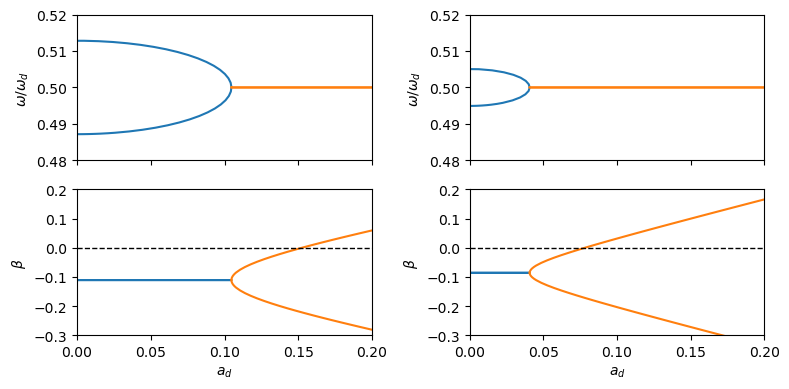

In [20]:
ad0s=[]
vn0s=[]
wn0s=[]
argsdict['epsu']=1E-3

for j in range(2):
    ind=np.argmin(np.abs(np.imag(omegas02[j])))
    argsdict['freq']=freq0s[j]
    ads,vs,ws=viscid.rayleigh_mat(ads02[j][ind],vs02[j][ind],ws02[j][ind],mat,argsdict,mat2)
    ad0s=ad0s+[ads[-1]]
    vn0s=vn0s+[vs[-1]]
    wn0s=wn0s+[ws[-1]]
    
plt.subplots(2,2,figsize=(8,4))

for j in range(2):
    plt.subplot(2,2,j+1)
    plt.plot(ads01[j],np.real(omegas01[j])/(2*np.pi*freq0s[j]),c=colors[0])
    plt.plot(ads02[j],np.real(omegas02[j])/(2*np.pi*freq0s[j]),c=colors[1])
    plt.plot(ads03[j],np.real(omegas03[j])/(2*np.pi*freq0s[j]),c=colors[1])
    plt.xlim(0,0.2)
    plt.ylim(0.48,0.52)

    plt.gca().set_xticks(plt.gca().get_xticks(),['']*len(plt.gca().get_xticks()))
    plt.ylabel(r'$\omega/\omega_d$')

    plt.subplot(2,2,j+3)
    plt.plot(ads01[j],-np.imag(omegas01[j]),c=colors[0])
    plt.plot(ads02[j],-np.imag(omegas02[j]),c=colors[1])
    plt.plot(ads03[j],-np.imag(omegas03[j]),c=colors[1])
    plt.plot([0,0.2],[0,0],ls='--',color='black',lw=1)
    plt.ylabel(r'$\beta$')
    plt.xlim(0,0.2)
    plt.ylim(-0.3,0.2)
    plt.xlabel('$a_d$')


plt.tight_layout()
plt.savefig('viscidresonance.pdf')
plt.show()


[(0.1524364313483676+7.906075844956524e-09j), (0.07819137647326445-2.6067127399959738e-08j)]


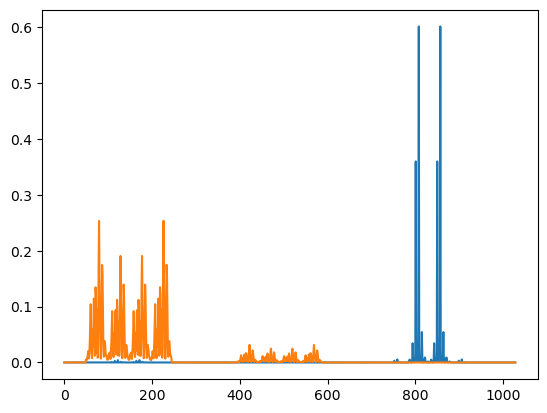

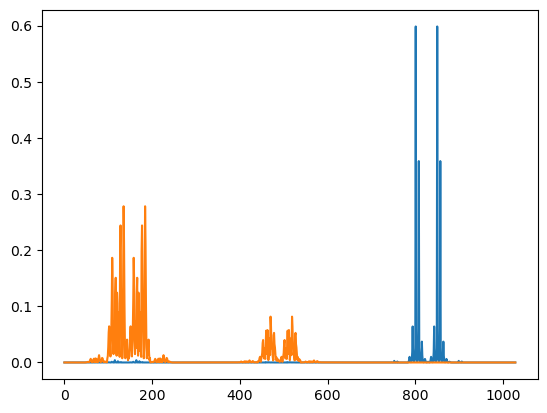

In [21]:
print(ad0s)
for j in range(2):
    plt.plot(np.abs(vn0s[j]))
    plt.plot(np.abs(wn0s[j]))
    plt.show()

[[0.14765485 0.        ]
 [0.15079645 0.        ]
 [0.15393804 0.        ]
 [0.15707963 0.        ]
 [0.15707963 0.0018138 ]
 [0.15707963 0.009069  ]
 [0.15707963 0.01632419]
 [0.15707963 0.02357939]
 [0.15707963 0.03083459]
 [0.15707963 0.03808979]
 [0.15707963 0.04534498]
 [0.15707963 0.05260018]
 [0.15707963 0.05985538]
 [0.15707963 0.06711058]
 [0.15707963 0.07436577]
 [0.15707963 0.08162097]
 [0.15707963 0.08887617]]
17
1.0997058823580064 1.5000573400744222 1.2661966296338159 (0.11003493803876661+4.303082657261413e-08j)


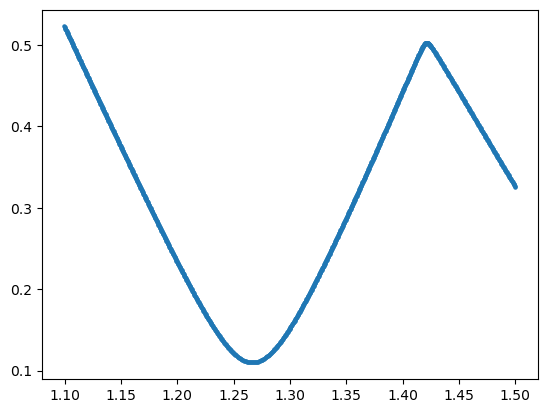

0.19574059601291083
1.1001427753988757 1.4663729452895098 1.2776277039936703 (0.1107376964775268+6.223393534312589e-08j)


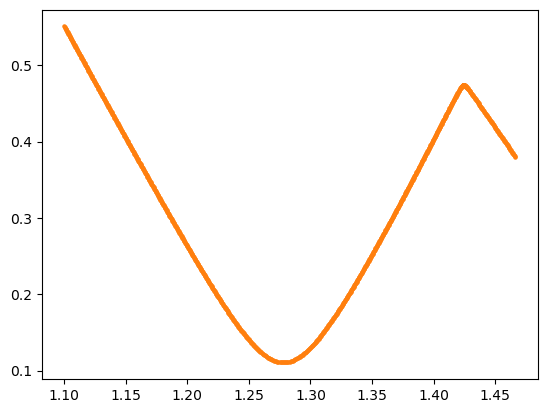

0.3835686619859189
1.10658838045175 1.4779197918199747 1.2854804312922976 (0.11124635788284405-2.4174346040173406e-08j)


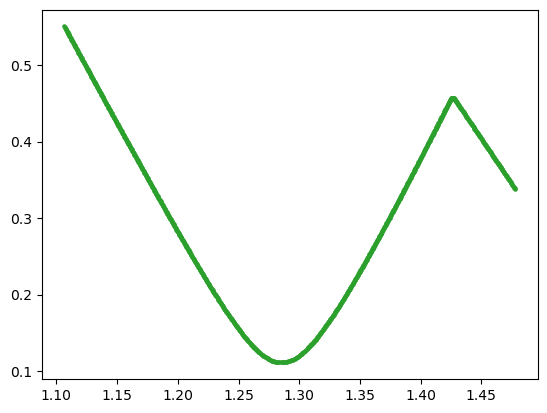

0.572316411009524
1.1088558679638982 1.4857482687584278 1.2882212754775708 (0.11141689754428212-7.889090767884788e-08j)


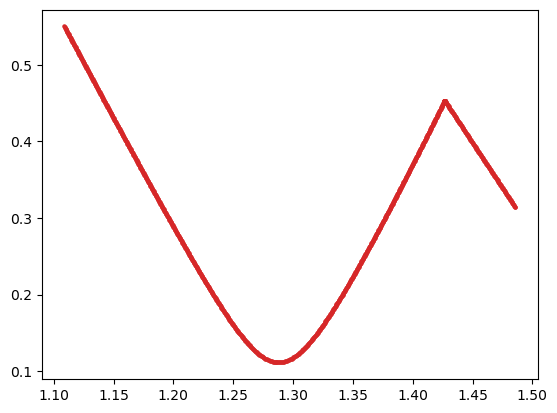

0.7671049690106884
1.1089253975632662 1.4884973127267136 1.2882212754775708 (0.11139857506551826-6.352473641928045e-08j)


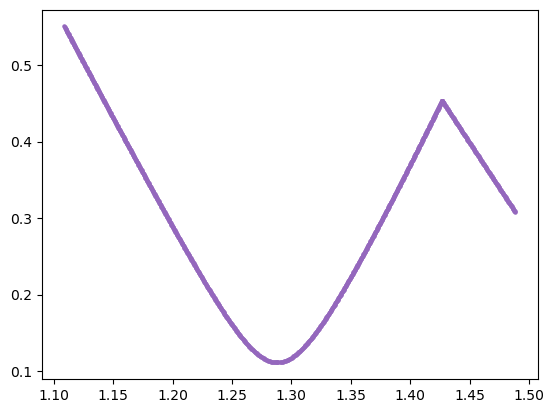

0.9601239569892641
1.1116593630582343 1.4882389960252673 1.2909523207877187 (0.11108037341056111-1.552319248458949e-09j)


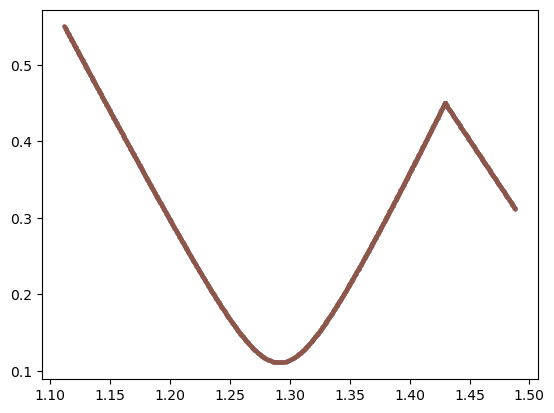

1.1516134979901835
1.1177786419248124 1.491087067223106 1.2979276825685722 (0.11036762185955173+6.630198269950807e-09j)


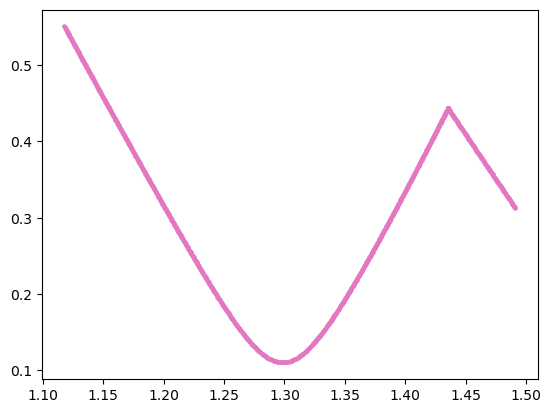

1.3451322590117343
1.127471956994937 1.4983188819094622 1.3094389796316654 (0.10926856902006873+6.792001688934819e-08j)


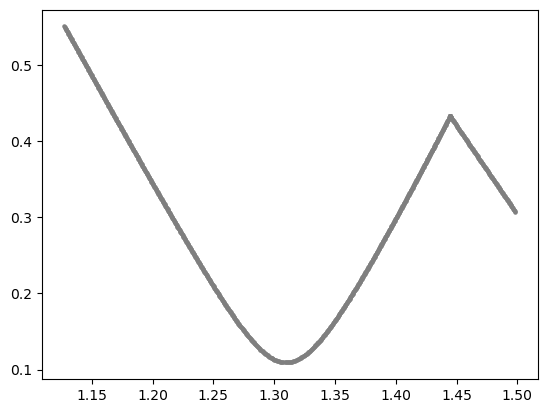

1.5343927690119017
1.1407426054624883 1.5094721661134116 1.325027232768649 (0.1078416091142049+1.7902076141390731e-07j)


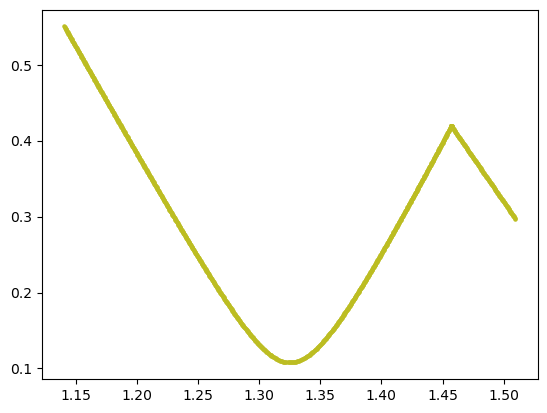

1.7228426229848992
1.1570348199224152 1.525308485888133 1.3443711951748016 (0.10615337926986511-6.066685742112274e-08j)


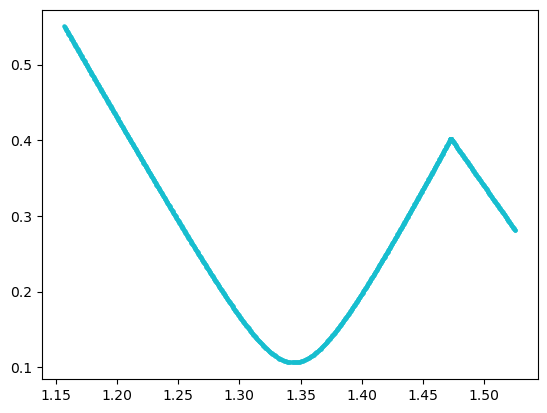

1.9112693489878438
1.176557833714102 1.5447386937594532 1.3663694691996198 (0.1042693060982406+3.129516524955443e-08j)


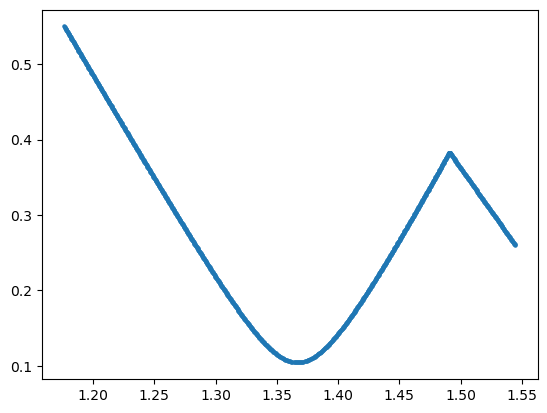

2.0999113569851033
1.1984495211101729 1.5665663401497856 1.392200878258679 (0.10225844992148458+4.265603688209502e-08j)


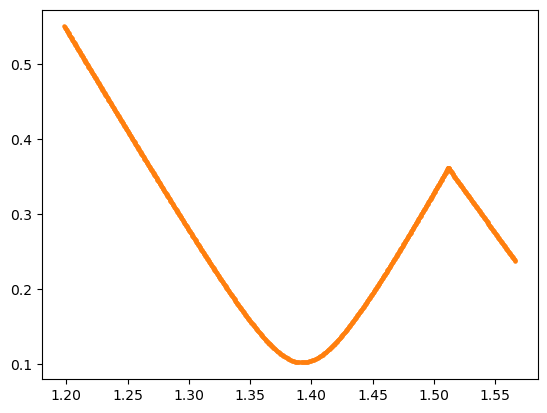

2.286244674003683
1.2230497821012252 1.5923302644789479 1.421597436195026 (0.1002185434157339-2.4510831721811235e-09j)


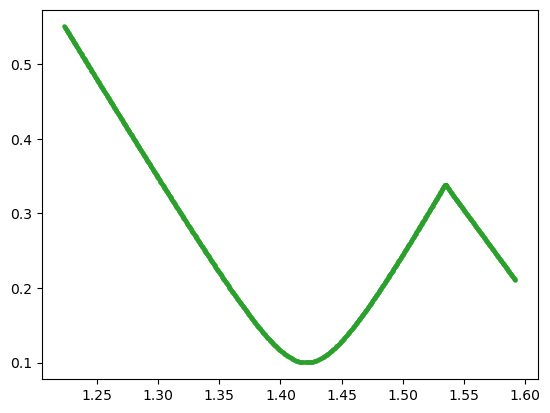

2.4709173169976566
1.2495878313071362 1.6217298495638555 1.452036465601911 (0.09824093703385472-2.054130593544911e-08j)


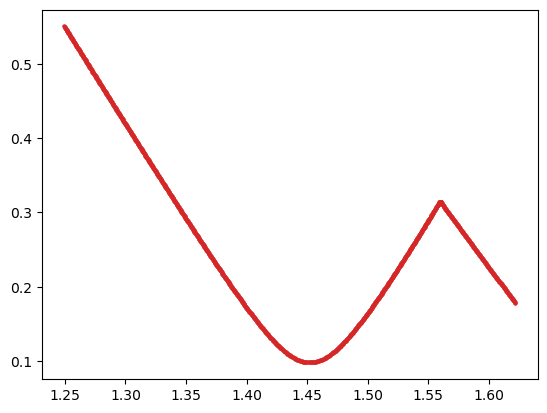

2.6548852649866603
1.2770294501466375 1.6521782253200084 1.4843024054175873 (0.09648679076661038+7.429512681767756e-08j)


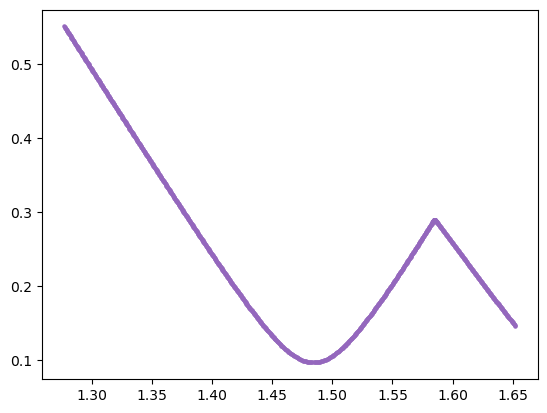

2.8365586120053194
1.3041077504361294 1.6846986299776585 1.5151292394271205 (0.09513684902925701-9.208116141236689e-08j)


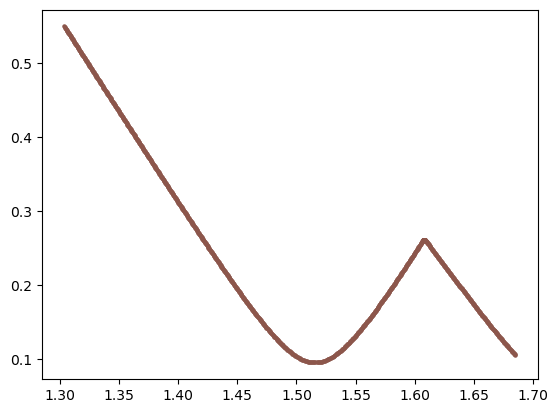

3.0216323159984313
1.3255889743514906 1.7152508399411845 1.7134798919712146 (0.0704063829662836-2.2965731425413384e-07j)


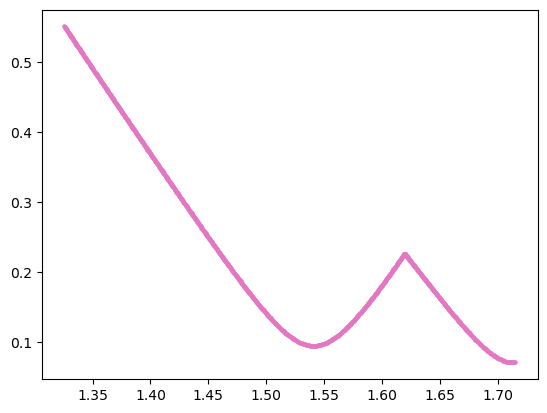

3.2007475499995053
1.4499828487102928 1.849500909134536 1.633150360943432 (0.06654038002317397-6.776628251286179e-09j)


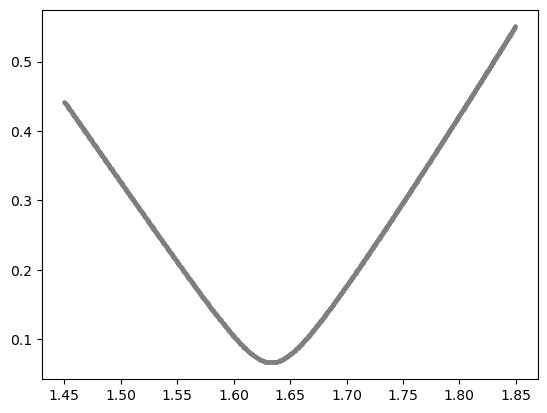

3.3947415110014845
1.4331026289180648 1.6299563725762485 1.6221871234940672 (0.06570284054699864+3.1573031814014933e-09j)


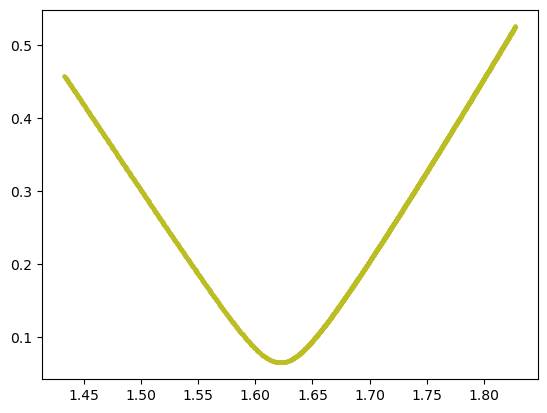

3.6052524510014337
1.4219422572616895 1.8222038403079917 1.6148120716630683 (0.06511812145225482-2.7335220638907453e-08j)


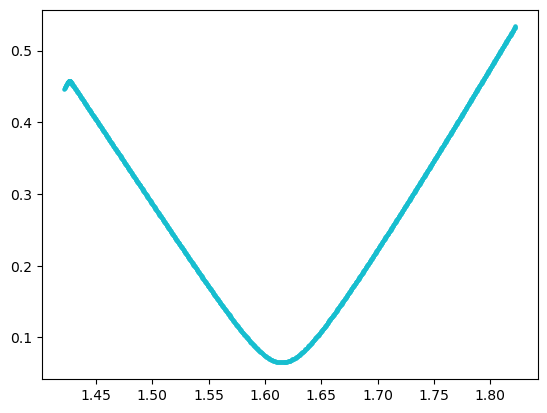

3.7898369639879093
1.4146538283412091 1.8150811578755432 1.6122532221337262 (0.0649471018797907+3.160986933835205e-08j)


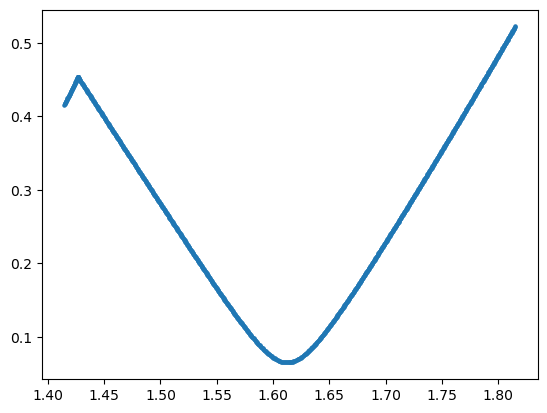

3.97665383698768
1.41217424911275 1.8122922672413215 1.6122532221337262 (0.06495069285994967+5.6615651935065585e-08j)


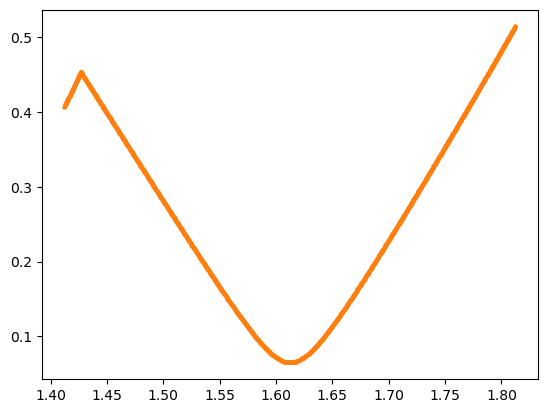

4.172477638989221
1.4120780784256888 1.812272035625024 1.6139666203195329 (0.06502142558703992-9.195545778817522e-09j)


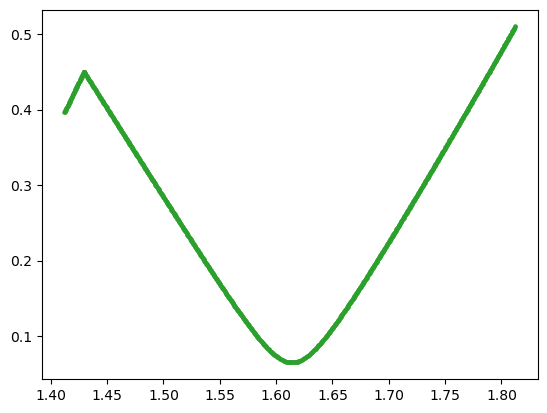

4.3650727559870575
1.413959812964584 1.8140464588070184 1.6173703012415892 (0.06518078169159738-1.4510562962748933e-08j)


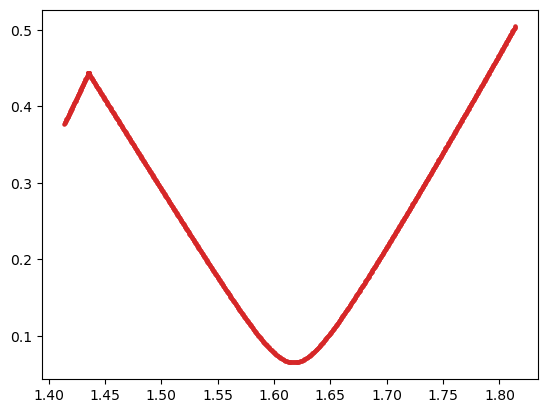

4.555009406991303
1.4173593407526432 1.8173817530550433 1.6223991824406068 (0.0654337227299168+1.8526535615345436e-08j)


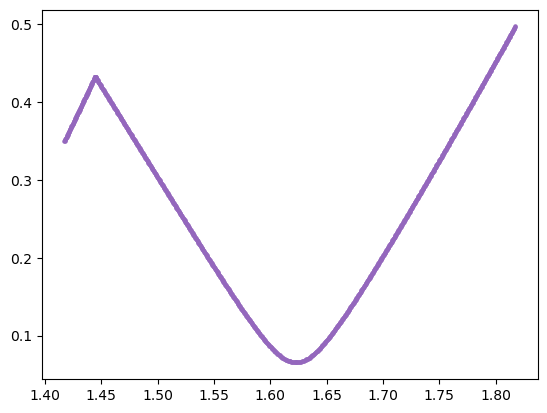

4.747539661009796
1.4223024632935748 1.8224254109928655 1.6297864751274387 (0.06576173997637749-1.0595827566088016e-08j)


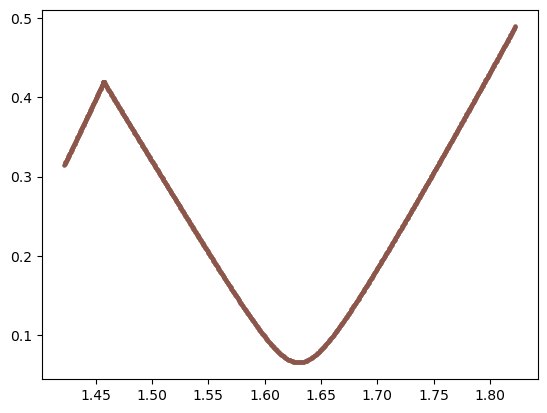

4.934135977993719
1.4297390132410948 1.8300497952584778 1.639494398429715 (0.06616035512689311-5.794885450139868e-09j)


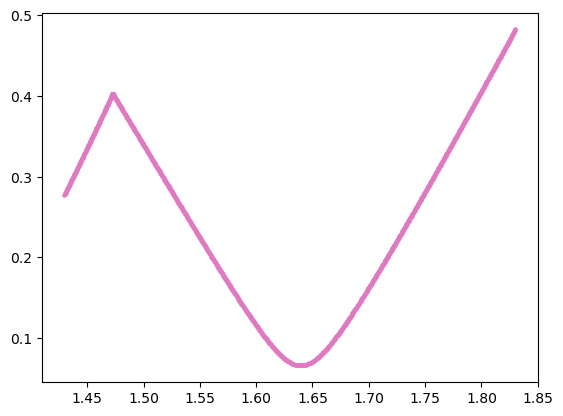

5.128243515995564
1.4394549839779827 1.8395292623416932 1.6507091416833843 (0.06663672117562736-1.1109603971249001e-07j)


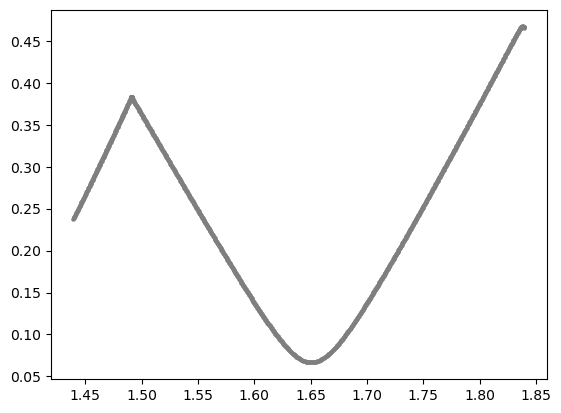

5.332783535006456
1.450464508872332 1.8510466728768937 1.6633606962239178 (0.06717174060050383-5.028752885740405e-08j)


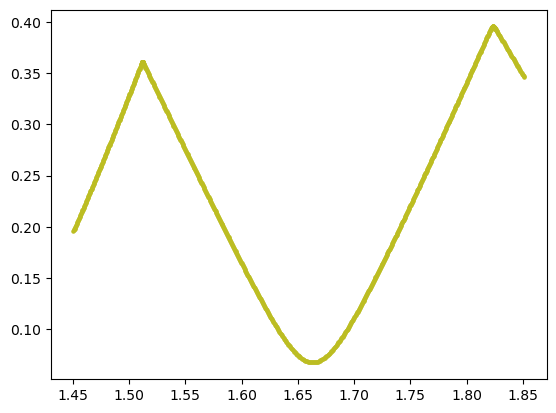

5.624689743999625
1.4633228933355449 1.8636904185697378 1.6774082664689258 (0.06776363889966167-7.064795396076282e-08j)


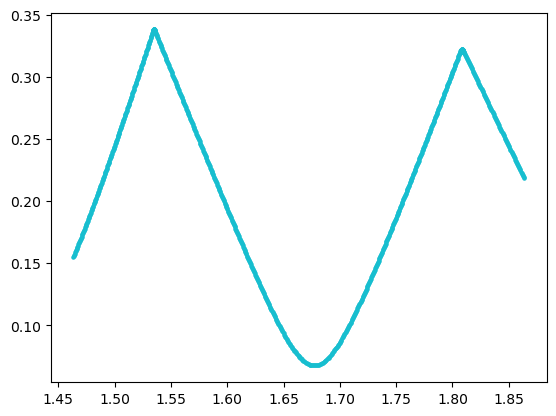

5.8107027749938425
1.477232393736791 1.877774790906275 1.6929423889200352 (0.06841476873080399-4.656516800361478e-08j)


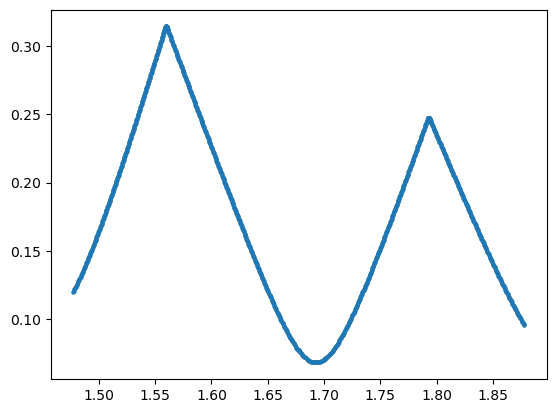

5.991421937011182
1.4929330322150969 1.893241942410192 1.707845270583199 (0.0691237043959104-8.234596209050588e-09j)


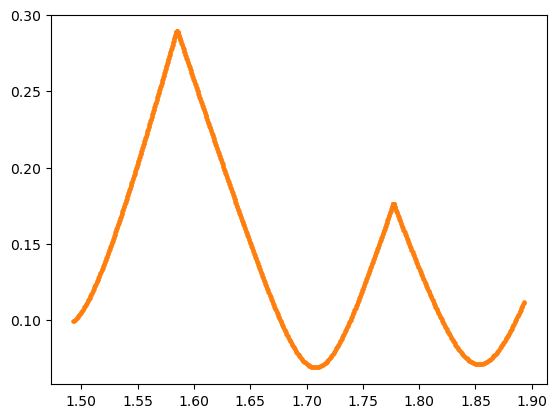

6.1719904220080934
1.5075133021683793 1.9081286020859536 1.7194290965382963 (0.06992583872892916-4.652739753678737e-08j)


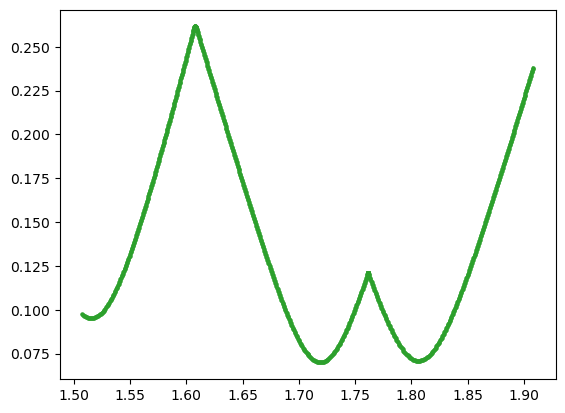

6.368666121998103
1.5191748454267215 1.9195148354460114 1.7133585933864037 (0.07040617543130893-1.2384484713841033e-07j)


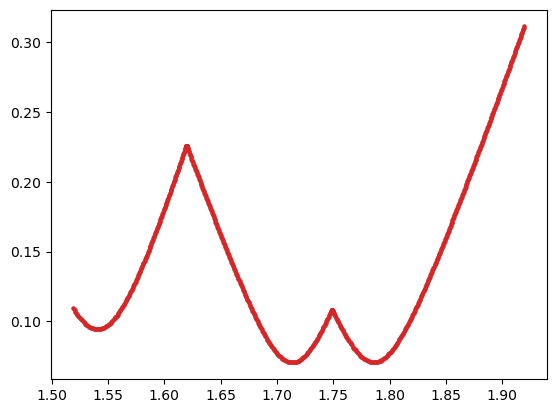

6.551218631007941


In [22]:
import os 
imp.reload(viscid)
start=timeit.default_timer()
adssweep=[]
freqsweep=[]
vssweep=[]
wssweep=[]
dirsweep=[]
dssweep=[]
argsdict['verbose']=0
argsdict['lambdamax']=0.55

# ds=1E-2
ds=1E-3
argsdict['dsmax']=ds
argsdict['ds']=ds/10
argsdict['dsmin']=1E-6

argsdict['epsu']=1E-2
argsdict['epsl']=1E-4
argsdict['dmu_fd']=1E-2
# argsdict['epstp']=1E0
# argsdict['epdir']=1E-1
argsdict['epstp']=np.inf
argsdict['epdir']=np.inf
argsdict['thu']=1E-3

argsdict['itmax']=20

ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])
# argsdict['verbose']=1
# ks=ks[:2]

print(ks)
print(len(ks))
overwrite=False
load=True

l=0
for j in range(2):
    ad0=ad0s[j]
    vs0=vn0s[j]
    ws0=wn0s[j]
    freq0=freq0s[j]
    
    argsdict['freq']=freq0
    argsdict['kx']=ks[0][0]
    argsdict['ky']=ks[0][1]
    
    lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
    kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
    kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
    kappa = (kappax**2+kappay**2)**0.5
    kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
    kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
    S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
    C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))

    #right preconditioner
    shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
    shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
    A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
    argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

    argsdict['precondition_axes']=((6,7),(0,1))
    argsdict['precondition_order']=(0,1,2,3,4,5,6,7)

    for i in range(len(ks)):
        if not os.path.exists('data/bandgap/%iads.npy'%(l)) or not load:
            kx=ks[i][0]
            ky=ks[i][1]

            print(i,freq0,kx,ky)
            argsdict['freq']=freq0
            if(argsdict['kx']!=kx):
                argsdict['par']='kx'
                argsdict['pari']=np.min([kx,argsdict['kx']])
                argsdict['parf']=np.max([kx,argsdict['kx']])

                argsdict['ds']=np.sign(kx-argsdict['kx'])*1E-4
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['kx']=kx
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]
            if(argsdict['ky']!=ky):
                argsdict['par']='ky'
                argsdict['pari']=np.min([ky,argsdict['ky']])
                argsdict['parf']=np.max([ky,argsdict['ky']])

                argsdict['ds']=np.sign(ky-argsdict['ky'])*1E-4
                ads1,vs1,ws1,pars1,dirs1,dss1=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
                argsdict['ky']=ky
                ads1,vs1,ws1=viscid.rayleigh_mat(ads1[-1], vs1[-1], ws1[-1], mat, argsdict, mat2)
                ad0=ads1[-1]
                vs0=vs1[-1]
                ws0=ws1[-1]

            lps,ls,mps,ms,nps,ns=viscid.makeindices(argsdict)
            kappax = (argsdict['kx'] + argsdict['k1x']*ms + argsdict['k2x']*ns)
            kappay = (argsdict['ky'] + argsdict['k1y']*ms + argsdict['k2y']*ns)
            kappa = (kappax**2+kappay**2)**0.5
            kappapx = (argsdict['kx'] + argsdict['k1x']*mps + argsdict['k2x']*nps)
            kappapy = (argsdict['ky'] + argsdict['k1y']*mps + argsdict['k2y']*nps)
            S = (- np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))
            C = (np.exp(-kappa*argsdict['h0']) * iv(ms-mps, kappa*argsdict['As']*0.5) * iv(ns-nps, kappa*argsdict['As']*0.5) + np.exp(kappa*argsdict['h0']) * iv(ms-mps, -kappa*argsdict['As']*0.5) * iv(ns-nps, -kappa*argsdict['As']*0.5))

            #right preconditioner
            shape_flat=((2*argsdict['Nx']+1)*(2*argsdict['Ny']+1),(2*argsdict['Nx']+1)*(2*argsdict['Ny']+1))
            shape2=((2*argsdict['Nx']+1),(2*argsdict['Ny']+1),(2*argsdict['Nx']+1),(2*argsdict['Ny']+1))
            A2=argsdict['g']*(argsdict['rho']**2*(kappax*kappapx+kappay*kappapy)/kappa*S)
            argsdict['preconditioner']=np.linalg.pinv(A2.reshape(shape_flat)).reshape(shape2)

            argsdict['precondition_axes']=((6,7),(0,1))
            argsdict['precondition_order']=(0,1,2,3,4,5,6,7)

            argsdict['freq']=freq0
            argsdict['par']='freq'
            argsdict['pari']=freq0-0.2
            argsdict['parf']=freq0+0.2

            argsdict['ds']=ds
            np.random.seed(l)
            ads2,vs2,ws2,pars2,dirs2,dss2=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2)
            argsdict['freq']=freq0        
            argsdict['ds']=-ds
            np.random.seed(l)
            ads3,vs3,ws3,pars3,dirs3,dss3=viscid.pseudocont(ad0, vs0, ws0, mat, argsdict, mat2) 
            

            freqsweep=freqsweep+[np.flip(pars3).tolist()+pars2]
            adssweep=adssweep+[np.flip(ads3).tolist()+ads2]
            vssweep=vssweep+[np.flip(vs3,axis=0).tolist()+vs2]
            wssweep=wssweep+[np.flip(ws3,axis=0).tolist()+ws2]
            dirsweep=dirsweep+[np.flip(dirs3,axis=0).tolist()+dirs2]
            dssweep=dssweep+[np.flip(dss3,axis=0).tolist()+dss2]
            if overwrite:
                np.save('data/bandgap/%iads.npy'%(l),adssweep[l])
                np.save('data/bandgap/%ivs.npy'%(l),vssweep[l])
                np.save('data/bandgap/%iws.npy'%(l),wssweep[l])
                np.save('data/bandgap/%ifreqs.npy'%(l),freqsweep[l])
                np.save('data/bandgap/%idirs.npy'%(l),dirsweep[l])
                np.save('data/bandgap/%idss.npy'%(l),dssweep[l])

        else:
            adssweep=adssweep+[np.load('data/bandgap/%iads.npy'%(l))]
            vssweep=vssweep+[np.load('data/bandgap/%ivs.npy'%(l))]
            wssweep=wssweep+[np.load('data/bandgap/%iws.npy'%(l))]
            freqsweep=freqsweep+[np.load('data/bandgap/%ifreqs.npy'%(l))]
            dirsweep=dirsweep+[np.load('data/bandgap/%idirs.npy'%(l))]
            dssweep=dssweep+[np.load('data/bandgap/%idss.npy'%(l))]
            
        ind=np.argmin(np.abs(adssweep[-1]))
        ad0=adssweep[-1][ind]
        vs0=np.array(vssweep[-1][ind])
        ws0=np.array(wssweep[-1][ind])
        freq0=freqsweep[-1][ind]
        print(freqsweep[-1][0],freqsweep[-1][-1],freq0,ad0)
        
        
        plt.plot(freqsweep[l],np.abs(np.real(adssweep[l])),c=colors[l%len(colors)])
        plt.scatter(freqsweep[l],np.abs(np.real(adssweep[l])),c=colors[l%len(colors)],s=5)
        plt.show() 
        
        l=l+1

        stop=timeit.default_timer()
        print(stop-start)


In [23]:
# ks=np.concatenate([np.transpose([kxs1[-4:],kys1[-4:]]),np.transpose([kxs2[::4],kys2[::4]])])

iadssweep=[np.load('data/bandgap/i%iads.npy'%(i)) for i in range(2*len(ks))]
ivssweep=[np.load('data/bandgap/i%ivs.npy'%(i)) for i in range(2*len(ks))]
iwssweep=[np.load('data/bandgap/i%iws.npy'%(i)) for i in range(2*len(ks))]
ifreqsweep=[np.load('data/bandgap/i%ifreqs.npy'%(i)) for i in range(2*len(ks))]

adssweep=[np.load('data/bandgap/%iads.npy'%(i)) for i in range(2*len(ks))]
vssweep=[np.load('data/bandgap/%ivs.npy'%(i)) for i in range(2*len(ks))]
wssweep=[np.load('data/bandgap/%iws.npy'%(i)) for i in range(2*len(ks))]
freqsweep=[np.load('data/bandgap/%ifreqs.npy'%(i)) for i in range(2*len(ks))]
dirsweep=[np.load('data/bandgap/%idirs.npy'%(i)) for i in range(2*len(ks))]

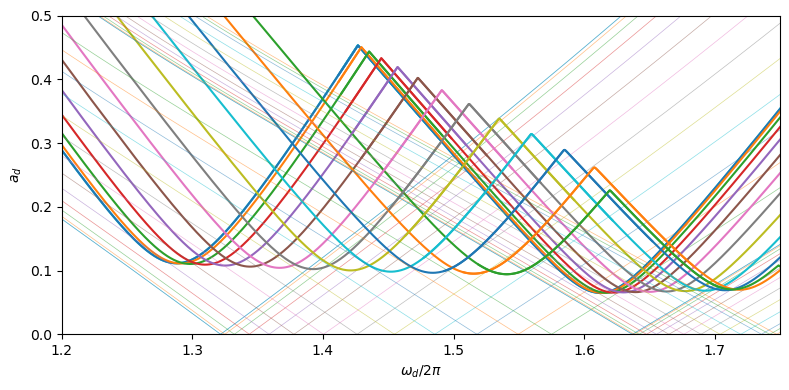

In [24]:
plt.figure(figsize=(8,4))
for i in range(3,len(ks)):
    plt.plot(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[(i-4)%len(colors)])
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[(i-4)%len(colors)],lw=0.5,alpha=0.5)
for i in range(3,len(ks)):
    plt.plot(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[(i-4)%len(colors)],label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[(i-4)%len(colors)],lw=0.5,alpha=0.5)

plt.xlabel(r'$\omega_d/2\pi$')
plt.ylabel(r'$a_d$')
plt.ylim(0,0.5)
plt.xlim(1.2,1.75)
# plt.legend(bbox_to_anchor=(1.1,1.1),loc='upper left')
plt.tight_layout()
plt.savefig('boundaries.pdf')

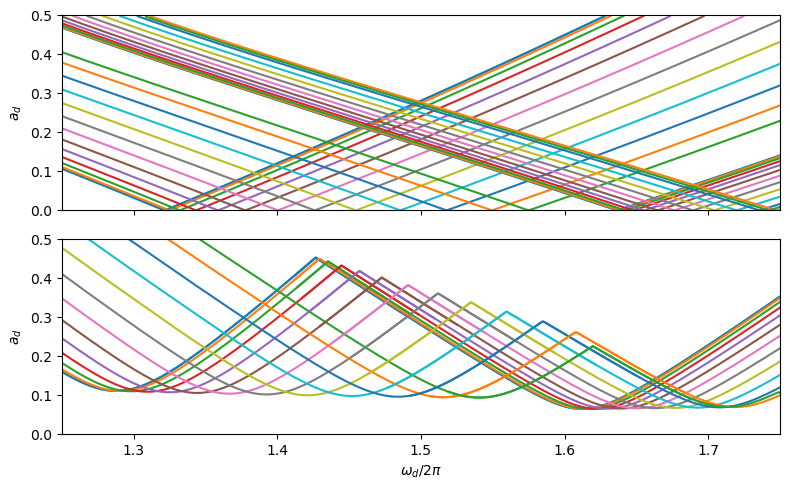

In [25]:
plt.subplots(2,1,figsize=(8,5))
for i in range(3,len(ks)):
    plt.subplot(2,1,2)
    plt.plot(freqsweep[i],np.abs(np.real(adssweep[i])),c=colors[(i-4)%len(colors)])
    plt.subplot(2,1,1)
    plt.plot(ifreqsweep[i],np.abs(np.real(iadssweep[i])),c=colors[(i-4)%len(colors)])
for i in range(3,len(ks)):
    plt.subplot(2,1,2)
    plt.plot(freqsweep[i+len(ks)],np.abs(np.real(adssweep[i+len(ks)])),c=colors[(i-4)%len(colors)],label='$k_x=%.3f, ky=%.3f$'%(ks[i][0],ks[i][1]))
    plt.subplot(2,1,1)
    plt.plot(ifreqsweep[i+len(ks)],np.abs(np.real(iadssweep[i+len(ks)])),c=colors[(i-4)%len(colors)])

plt.subplot(2,1,2)
plt.xlabel(r'$\omega_d/2\pi$')
plt.ylabel(r'$a_d$')
plt.ylim(0,0.5)
plt.xlim(1.25,1.75)
plt.subplot(2,1,1)
plt.ylim(0,0.5)
plt.xlim(1.25,1.75)
plt.ylabel(r'$a_d$')
plt.gca().set_xticks(plt.gca().get_xticks(),['']*len(plt.gca().get_xticks()))
plt.xlim(1.25,1.75)
# plt.legend(bbox_to_anchor=(1.1,1.1),loc='upper left')
plt.tight_layout()
plt.savefig('boundaries.pdf')